In [2]:
import pandas as pd
import json
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
file_path = "C:\\Users\\HP USER\\Documents\\Guvi\\Project\\03_Airbnb\\sample_airbnb.json"
with open(file_path, 'r')as file:
    data=json.load(file)

In [4]:
dfs=[]
for i in range(0,5555):
    df=pd.json_normalize(data[i])
    dfs.append(df)

final_df = pd.concat(dfs, ignore_index=True)

In [5]:
len(final_df)

5555

In [6]:
final_df.columns

Index(['_id', 'listing_url', 'name', 'summary', 'space', 'description',
       'neighborhood_overview', 'notes', 'transit', 'access', 'interaction',
       'house_rules', 'property_type', 'room_type', 'bed_type',
       'minimum_nights', 'maximum_nights', 'cancellation_policy',
       'last_scraped', 'calendar_last_scraped', 'first_review', 'last_review',
       'accommodates', 'bedrooms', 'beds', 'number_of_reviews', 'bathrooms',
       'amenities', 'price', 'security_deposit', 'cleaning_fee',
       'extra_people', 'guests_included', 'reviews', 'images.thumbnail_url',
       'images.medium_url', 'images.picture_url', 'images.xl_picture_url',
       'host.host_id', 'host.host_url', 'host.host_name', 'host.host_location',
       'host.host_about', 'host.host_response_time', 'host.host_thumbnail_url',
       'host.host_picture_url', 'host.host_neighbourhood',
       'host.host_response_rate', 'host.host_is_superhost',
       'host.host_has_profile_pic', 'host.host_identity_verified',
  

In [7]:
dataframe=final_df[['_id','name','description','property_type','room_type','accommodates','minimum_nights','maximum_nights','bedrooms', 'beds','number_of_reviews', 'bathrooms','amenities','price','cleaning_fee','security_deposit','guests_included', 'reviews', 'host.host_id','host.host_name','host.host_neighbourhood','address.market', 'address.country','address.country_code', 'address.location.type','address.location.coordinates',
       'availability.availability_30', 'availability.availability_60','availability.availability_90', 'availability.availability_365','review_scores.review_scores_rating']]

In [8]:
dataframe.shape

(5555, 31)

In [9]:
dataframe

,_id,name,description,property_type,room_type,accommodates,minimum_nights,maximum_nights,bedrooms,beds,...,address.market,address.country,address.country_code,address.location.type,address.location.coordinates,availability.availability_30,availability.availability_60,availability.availability_90,availability.availability_365,review_scores.review_scores_rating
0,1003530,New York City - Upper West Side Apt,"Murphy bed, optional second bedroom available....",Apartment,Private room,2,12,360,1.0,1.0,...,New York,United States,US,Point,"[-73.96523, 40.79962]",0,0,0,93,94.0
1,10133554,Double and triple rooms Blue mosque,We are on the central city Blue mosque 5 minu...,Bed and breakfast,Private room,3,1,1125,1.0,2.0,...,Istanbul,Turkey,TR,Point,"[28.98009, 41.0062]",30,60,90,365,92.0
2,10059872,"Soho Cozy, Spacious and Convenient","Clean, fully furnish, Spacious 1 bedroom flat ...",Apartment,Entire home/apt,3,4,20,1.0,2.0,...,Hong Kong,Hong Kong,HK,Point,"[114.15027, 22.28158]",0,0,0,0,100.0
3,10084023,City center private room with bed,House is located 5mins walk from Sham Shui Po ...,Guesthouse,Private room,1,1,500,1.0,1.0,...,Hong Kong,Hong Kong,HK,Point,"[114.1669, 22.3314]",14,24,40,220,92.0
4,10091713,Surry Hills Studio - Your Perfect Base in Sydney,"This spacious, light filled studio has everyth...",Apartment,Entire home/apt,2,10,21,0.0,1.0,...,Sydney,Australia,AU,Point,"[151.21554, -33.88029]",0,0,0,0,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5550,9985696,Kadıköy-Altıyol,Kadıköy merkezde 2+1 dairem vardır.Çok kalabal...,House,Entire home/apt,2,1,1125,2.0,3.0,...,Istanbul,Turkey,TR,Point,"[29.03079, 40.98563]",30,60,90,365,NaN
5551,9993190,Just Steps from the Ocean at Premier Platinum ...,Relax Hawaiian Style in Gated Community on Oce...,Townhouse,Entire home/apt,6,3,365,2.0,4.0,...,Maui,United States,US,Point,"[-156.66752, 20.85894]",0,8,31,258,92.0
5552,9887054,Quarry Bay fully furnished studio C,Newly renovated studio flat with full furniture.,Apartment,Private room,1,3,1125,1.0,1.0,...,Hong Kong,Hong Kong,HK,Point,"[114.20722, 22.29157]",18,48,78,353,85.0
5553,9907907,Large double room in Bondi,A bright large double room is available in a b...,Apartment,Private room,2,3,1125,1.0,1.0,...,Sydney,Australia,AU,Point,"[151.26542, -33.89298]",0,0,0,0,NaN


In [10]:
df_des=dataframe.describe()
pd.set_option('display.max_columns', None)
df_des

,accommodates,bedrooms,beds,number_of_reviews,bathrooms,price,cleaning_fee,security_deposit,guests_included,availability.availability_30,availability.availability_60,availability.availability_90,availability.availability_365,review_scores.review_scores_rating
count,5555.000000,5550.000000,5542.000000,5555.000000,5545.000000,5555.000000,4024.000000,3471.000000,5555.000000,5555.000000,5555.000000,5555.000000,5555.000000,4081.000000
mean,3.505851,1.411712,2.071454,27.606481,1.291163,278.766157,94.074801,509.430424,1.747435,11.816202,26.451305,42.758056,173.105671,93.099240
std,2.297019,1.041942,1.619660,49.798376,0.702265,842.215531,110.203782,1594.805320,1.487352,11.686113,23.476011,35.226897,139.841893,9.023483
min,1.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,70.000000,23.000000,0.000000,1.000000,0.000000,0.000000,0.000000,17.000000,90.000000
50%,3.000000,1.000000,2.000000,5.000000,1.000000,129.000000,60.000000,200.000000,1.000000,8.000000,23.000000,43.000000,171.000000,95.000000
75%,4.000000,2.000000,3.000000,32.000000,1.000000,280.000000,129.000000,500.000000,2.000000,24.000000,52.000000,80.000000,317.000000,99.000000
max,16.000000,20.000000,25.000000,533.000000,16.000000,48842.000000,2000.000000,39228.000000,16.000000,30.000000,60.000000,90.000000,365.000000,100.000000


In [11]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5555 entries, 0 to 5554
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   _id                                 5555 non-null   object 
 1   name                                5555 non-null   object 
 2   description                         5555 non-null   object 
 3   property_type                       5555 non-null   object 
 4   room_type                           5555 non-null   object 
 5   accommodates                        5555 non-null   int64  
 6   minimum_nights                      5555 non-null   object 
 7   maximum_nights                      5555 non-null   object 
 8   bedrooms                            5550 non-null   float64
 9   beds                                5542 non-null   float64
 10  number_of_reviews                   5555 non-null   int64  
 11  bathrooms                           5545 no

In [12]:
dataframe.isnull().sum()

_id                                      0
name                                     0
description                              0
property_type                            0
room_type                                0
accommodates                             0
minimum_nights                           0
maximum_nights                           0
bedrooms                                 5
beds                                    13
number_of_reviews                        0
bathrooms                               10
amenities                                0
price                                    0
cleaning_fee                          1531
security_deposit                      2084
guests_included                          0
reviews                                  0
host.host_id                             0
host.host_name                           0
host.host_neighbourhood                  0
address.market                           0
address.country                          0
address.cou

In [13]:
# from the above description and correlation, we came to understand that minimum price is 9, minimum availability 365 is 0 and maximum availability is 365, bedrooms have minimum 0which are illogical

In [14]:
dataframe['bedrooms'].unique()
dataframe['bedrooms'] = dataframe['bedrooms'].replace(0., np.nan)
dataframe['bathrooms'].unique()
dataframe['bathrooms'] = dataframe['bathrooms'].replace(0., np.nan)
dataframe['beds'].unique()
dataframe['beds'] = dataframe['beds'].replace(0., np.nan)

C:\Users\HP USER\AppData\Local\Temp\ipykernel_6896\4034133775.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['bedrooms'] = dataframe['bedrooms'].replace(0., np.nan)
C:\Users\HP USER\AppData\Local\Temp\ipykernel_6896\4034133775.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['bathrooms'] = dataframe['bathrooms'].replace(0., np.nan)
C:\Users\HP USER\AppData\Local\Temp\ipykernel_6896\4034133775.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [15]:
dataframe.shape

(5555, 31)

In [16]:
# we can drop null values of beds, bathrooms and bedrooms it is less than 2% of total values, which might not affect out data insights

In [17]:
dataframe.isnull().sum()

_id                                      0
name                                     0
description                              0
property_type                            0
room_type                                0
accommodates                             0
minimum_nights                           0
maximum_nights                           0
bedrooms                               501
beds                                    42
number_of_reviews                        0
bathrooms                               24
amenities                                0
price                                    0
cleaning_fee                          1531
security_deposit                      2084
guests_included                          0
reviews                                  0
host.host_id                             0
host.host_name                           0
host.host_neighbourhood                  0
address.market                           0
address.country                          0
address.cou

In [18]:
dataframe= dataframe.dropna(subset=['bedrooms','beds','bathrooms'])
dataframe= dataframe.drop(columns = ['security_deposit'])

In [19]:
dataframe.shape

(5004, 30)

In [20]:
dataframe['cleaning_fee'] = dataframe['cleaning_fee'].fillna(0)
dataframe['review_scores.review_scores_rating'] = dataframe['review_scores.review_scores_rating'].fillna(0)

In [21]:
dataframe.shape

(5004, 30)

In [22]:
dataframe.isnull().sum()

_id                                   0
name                                  0
description                           0
property_type                         0
room_type                             0
accommodates                          0
minimum_nights                        0
maximum_nights                        0
bedrooms                              0
beds                                  0
number_of_reviews                     0
bathrooms                             0
amenities                             0
price                                 0
cleaning_fee                          0
guests_included                       0
reviews                               0
host.host_id                          0
host.host_name                        0
host.host_neighbourhood               0
address.market                        0
address.country                       0
address.country_code                  0
address.location.type                 0
address.location.coordinates          0


# Outlier treatment for price

In [23]:
df_country=dataframe['address.country'].unique()
df_country

array(['United States', 'Turkey', 'Hong Kong', 'Portugal', 'Brazil',
       'Canada', 'Australia', 'Spain', 'China'], dtype=object)

In [24]:
df_property=dataframe['property_type'].unique()
df_property

array(['Apartment', 'Bed and breakfast', 'Guesthouse', 'Hostel',
       'Serviced apartment', 'Loft', 'House', 'Condominium', 'Treehouse',
       'Guest suite', 'Townhouse', 'Villa', 'Cabin', 'Farm stay',
       'Chalet', 'Boutique hotel', 'Bungalow', 'Cottage', 'Boat',
       'Earth house', 'Other', 'Aparthotel', 'Tiny house', 'Resort',
       'Nature lodge', 'Hotel', 'Barn', 'Hut', 'Heritage hotel (India)',
       'Casa particular (Cuba)', 'Campsite', 'Castle', 'Houseboat',
       'Train'], dtype=object)

In [25]:
df_US=dataframe[(dataframe['address.country']== 'United States')]
df_US['property_type'].value_counts()

property_type
Apartment             513
Condominium           198
House                 186
Townhouse              37
Guest suite            24
Guesthouse             20
Loft                   17
Cottage                12
Villa                  10
Resort                  9
Serviced apartment      6
Cabin                   6
Boutique hotel          5
Bed and breakfast       5
Farm stay               5
Bungalow                4
Other                   2
Aparthotel              2
Tiny house              1
Treehouse               1
Hostel                  1
Barn                    1
Hut                     1
Campsite                1
Hotel                   1
Nature lodge            1
Name: count, dtype: int64

In [26]:
df_US.describe()

,accommodates,bedrooms,beds,number_of_reviews,bathrooms,price,cleaning_fee,guests_included,availability.availability_30,availability.availability_60,availability.availability_90,availability.availability_365,review_scores.review_scores_rating
count,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000
mean,3.759588,1.492984,2.028999,46.431244,1.349392,192.272217,105.281572,2.002806,8.234799,19.189897,32.959775,165.116932,81.724041
std,2.360572,0.830819,1.428083,59.928439,0.634342,205.785009,114.377718,1.647547,9.601131,19.347368,29.622773,127.345428,32.887727
min,1.000000,1.000000,1.000000,0.000000,1.000000,16.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,3.000000,1.000000,88.000000,25.000000,1.000000,0.000000,0.000000,3.000000,25.000000,89.000000
50%,3.000000,1.000000,2.000000,23.000000,1.000000,139.000000,75.000000,1.000000,4.000000,14.000000,27.000000,172.000000,95.000000
75%,5.000000,2.000000,3.000000,66.000000,2.000000,229.000000,150.000000,2.000000,13.000000,32.000000,56.000000,280.000000,98.000000
max,16.000000,6.000000,11.000000,420.000000,5.500000,3250.000000,910.000000,12.000000,30.000000,60.000000,90.000000,365.000000,100.000000


In [27]:
df_1 = dataframe[(dataframe['address.country']== 'United States')& ( dataframe['property_type']=='Apartment') &(dataframe['price'])]


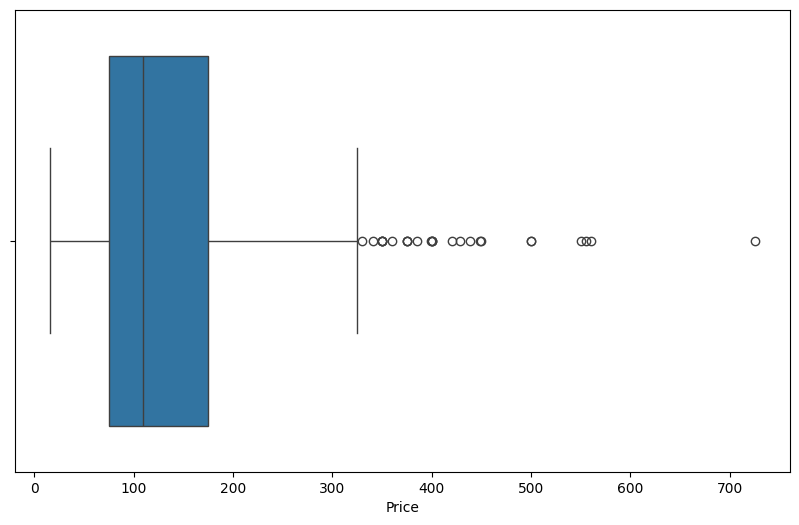

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_1['price'])
plt.xlabel('Price')
plt.show()

In [29]:
#outliers are more than 325,so drop rows more than 325
df_1_Outlier=df_1[(df_1['price']>400)]
df_1_Outlier.shape


(11, 30)

In [30]:
dataframe.drop(df_1_Outlier.index, inplace=True)

In [31]:
dataframe.shape

(4993, 30)

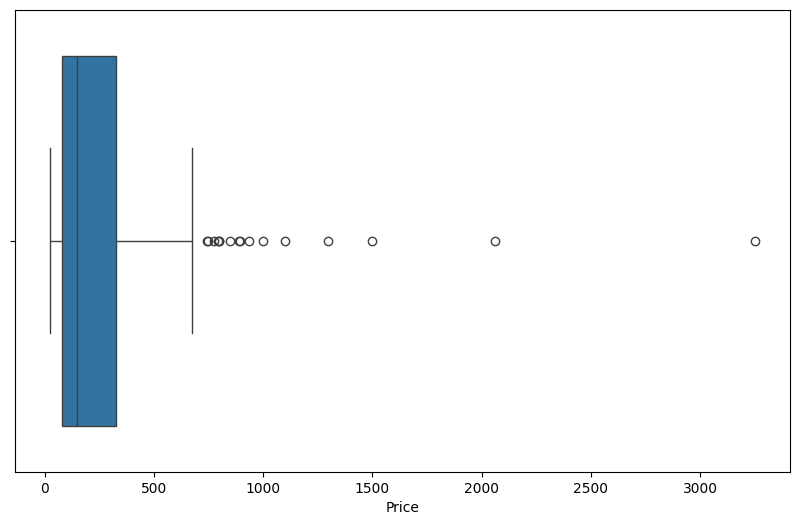

In [32]:
df_2_US = dataframe[(dataframe['address.country']== 'United States')& ( dataframe['property_type'] == 'House') &(dataframe['price'])]
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_2_US['price'])
plt.xlabel('Price')
plt.show()


In [33]:
#outliers are more than 325,so drop rows more than 325
df_2_Outlier=df_2_US[(df_2_US['price']>800)]
df_2_Outlier.shape

(10, 30)

In [34]:
dataframe.drop(df_2_Outlier.index, inplace=True)

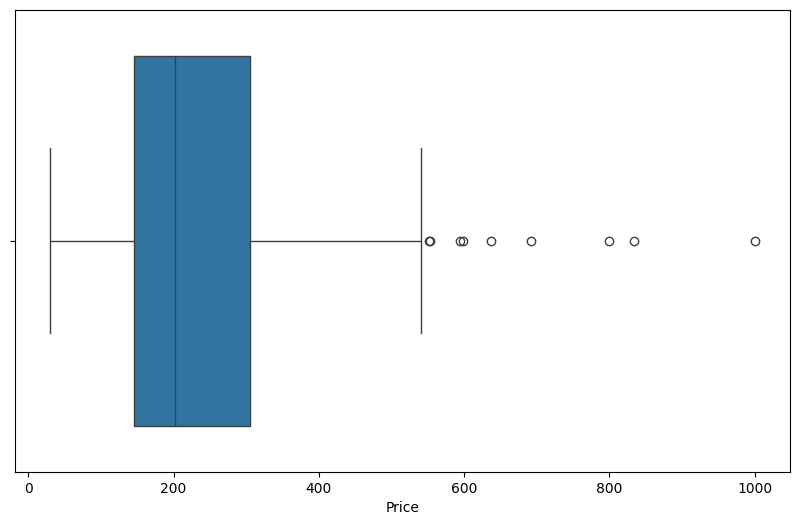

In [35]:
df_3 = dataframe[(dataframe['address.country']== 'United States')& ( dataframe['property_type'] == 'Condominium') &(dataframe['price'])]
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_3['price'])
plt.xlabel('Price')
plt.show()

In [36]:
df_3_Outlier=df_3[(df_3['price']>600)]
df_3_Outlier.shape


(5, 30)

In [37]:
dataframe.drop(df_3_Outlier.index, inplace=True)

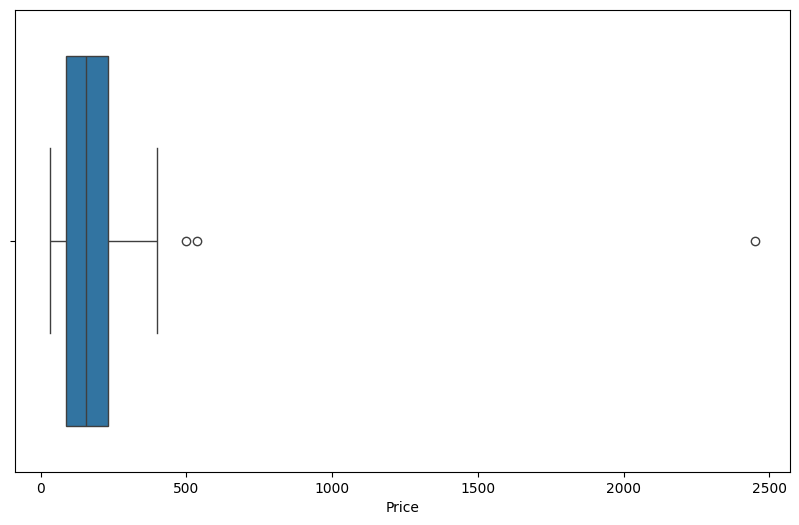

In [38]:
df_4 = dataframe[(dataframe['address.country']== 'United States')& ( dataframe['property_type'] == 'Townhouse') &(dataframe['price'])]
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_4['price'])
plt.xlabel('Price')
plt.show()

In [39]:
df_4_Outlier=df_4[(df_4['price']>500)]
df_4_Outlier.shape


(2, 30)

In [40]:
dataframe.drop(df_4_Outlier.index, inplace=True)

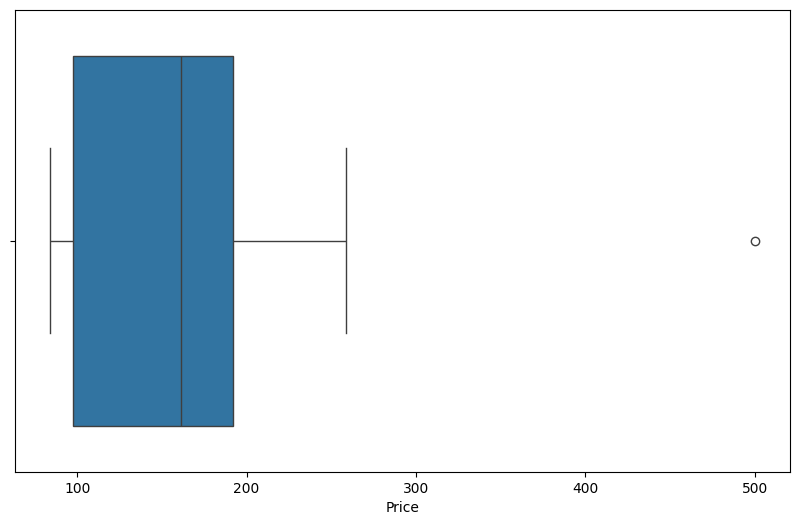

In [41]:
df_5 = dataframe[(dataframe['address.country']== 'United States')& ( dataframe['property_type'] == 'Cottage') &(dataframe['price'])]
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_5['price'])
plt.xlabel('Price')
plt.show()

In [42]:
df_5_Outlier=df_5[(df_5['price']>400)]
df_5_Outlier.shape


(1, 30)

In [43]:
dataframe.drop(df_5_Outlier.index, inplace=True)

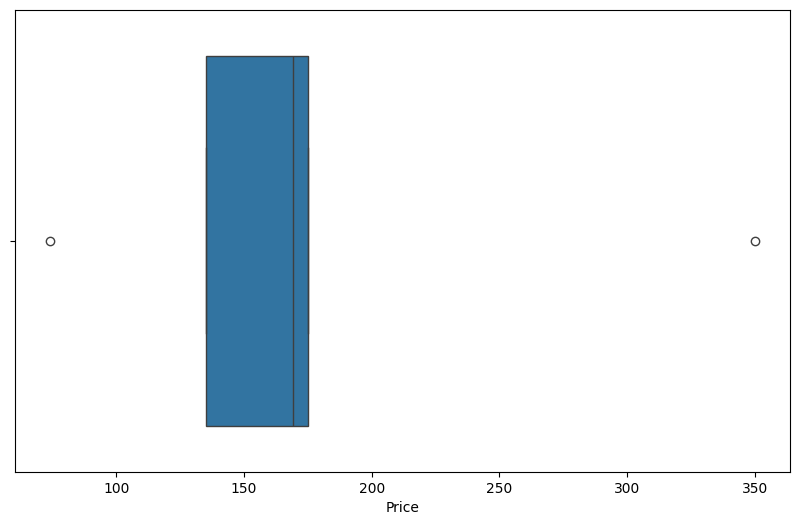

In [44]:
df_6= dataframe[(dataframe['address.country']== 'United States')& ( dataframe['property_type'] == 'Farm stay') &(dataframe['price'])]
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_6['price'])
plt.xlabel('Price')
plt.show()

In [45]:
df_6_Outlier=df_6[(df_6['price']<100) ]
df_6_Outlier.shape

(1, 30)

In [46]:
dataframe.drop(df_6_Outlier.index, inplace=True)

In [47]:
df_7= dataframe[(dataframe['address.country']== 'United States') &(dataframe['price'] == 16)]
df_7

,_id,name,description,property_type,room_type,accommodates,minimum_nights,maximum_nights,bedrooms,beds,number_of_reviews,bathrooms,amenities,price,cleaning_fee,guests_included,reviews,host.host_id,host.host_name,host.host_neighbourhood,address.market,address.country,address.country_code,address.location.type,address.location.coordinates,availability.availability_30,availability.availability_60,availability.availability_90,availability.availability_365,review_scores.review_scores_rating
4235,4031809,Prewar classic NYC apartment.,"Cozy, classic american. Neighborhood is very c...",Apartment,Private room,4,14,180,2.0,2.0,0,1.0,"[Cable TV, Wifi, Air conditioning, Kitchen, El...",16.0,0.0,1.0,[],20902552,Miquel,Washington Heights,New York,United States,US,Point,"[-73.94344, 40.83456]",0,0,0,0,0.0


In [48]:
dataframe.shape

(4974, 30)

In [49]:
df_TUR =dataframe[(dataframe['address.country']== 'Turkey')]
df_TUR_Prop=df_TUR['property_type'].unique()
df_TUR_Prop

array(['Bed and breakfast', 'Serviced apartment', 'House', 'Apartment',
       'Loft', 'Boutique hotel', 'Hostel', 'Other', 'Townhouse',
       'Guesthouse', 'Nature lodge', 'Hotel', 'Condominium', 'Villa',
       'Aparthotel', 'Guest suite', 'Casa particular (Cuba)', 'Chalet'],
      dtype=object)

In [50]:
df_TUR.describe()

,accommodates,bedrooms,beds,number_of_reviews,bathrooms,price,cleaning_fee,guests_included,availability.availability_30,availability.availability_60,availability.availability_90,availability.availability_365,review_scores.review_scores_rating
count,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000
mean,3.031301,1.436573,2.019769,8.795717,1.183690,369.387150,35.993410,1.317957,21.739703,45.052718,69.514003,253.270181,43.919275
std,2.323792,1.269929,1.821110,25.995451,0.886987,2028.185923,75.227378,1.004638,11.333882,21.800790,31.558308,133.972694,46.589972
min,1.000000,1.000000,1.000000,0.000000,0.500000,26.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,0.000000,1.000000,100.000000,0.000000,1.000000,14.000000,36.000000,60.000000,137.500000,0.000000
50%,2.000000,1.000000,1.000000,1.000000,1.000000,179.000000,0.000000,1.000000,29.000000,58.000000,88.000000,336.000000,0.000000
75%,4.000000,2.000000,2.000000,4.000000,1.000000,301.000000,42.000000,1.000000,30.000000,60.000000,90.000000,365.000000,95.000000
max,16.000000,20.000000,25.000000,248.000000,16.000000,48842.000000,596.000000,15.000000,30.000000,60.000000,90.000000,365.000000,100.000000


In [51]:
df_TUR_out = {}

for i in range(len(df_TUR_Prop)):
    key = f'df_TUR_{i}'
    df_TUR_out[key] = dataframe[(dataframe['address.country'] == 'Turkey') & 
                                (dataframe['property_type'] == df_TUR_Prop[i]) & 
                                (dataframe['price'])]


In [52]:
df_TUR_out

{'df_TUR_0':            _id                                               name  \
 1     10133554                Double and triple rooms Blue mosque   
 259   11130156                                        Double Room   
 717   13945645        Cozy apartment great Area &location( 9 pax)   
 1153  16214034                                Comfort Double Room   
 1283  17113453  A Boutique Hotel with Style in Istanbul’s Hist...   
 2689  23532756       Room Free Breakfast close to Hagia Sophia401   
 2805  24284013                                      Ataköy Marina   
 3637   2946022                          Lovely terrace in kadikoy   
 3950  30710358                                Heart of Asian side   
 4041  30973353  伊斯坦布尔伊人之家female only(提供女游客全境保护作家客厅文化沙龙导游土耳其旅游注...   
 4282   3254016                    sultanahmet cami 3 dk.manzarali   
 4285   3335550                            Bright Suite Apartments   
 4479  31490186                                 NY WORLD KONAKLAMA   
 4548   

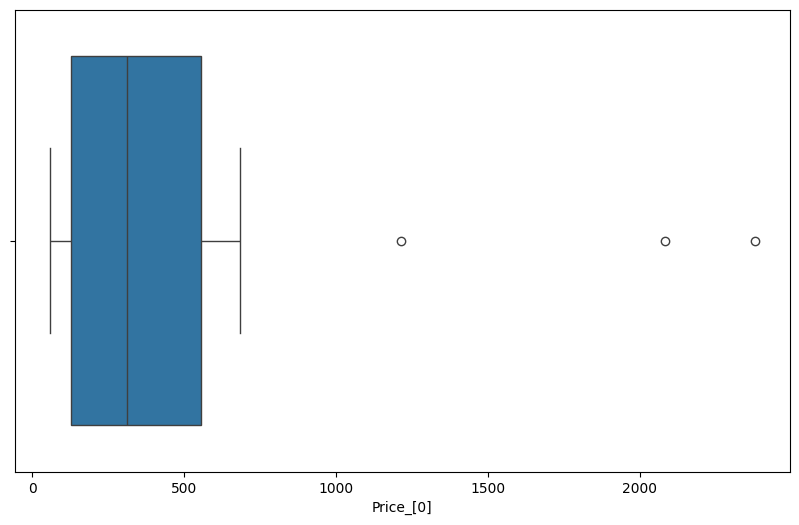

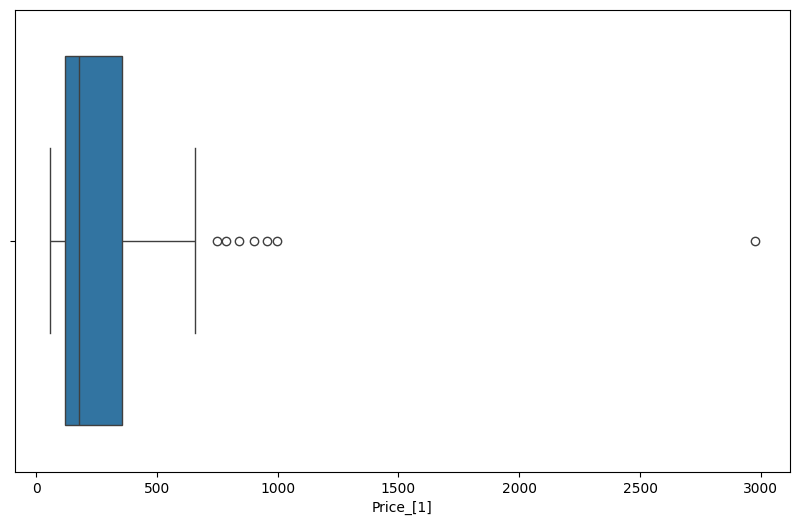

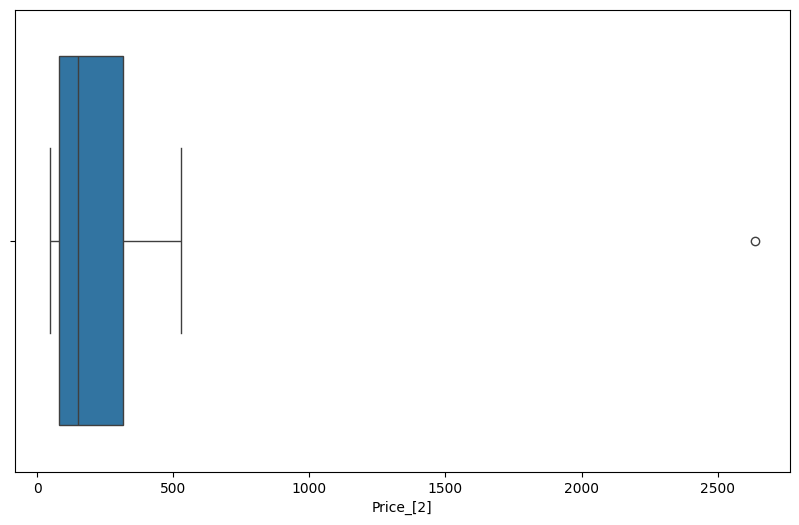

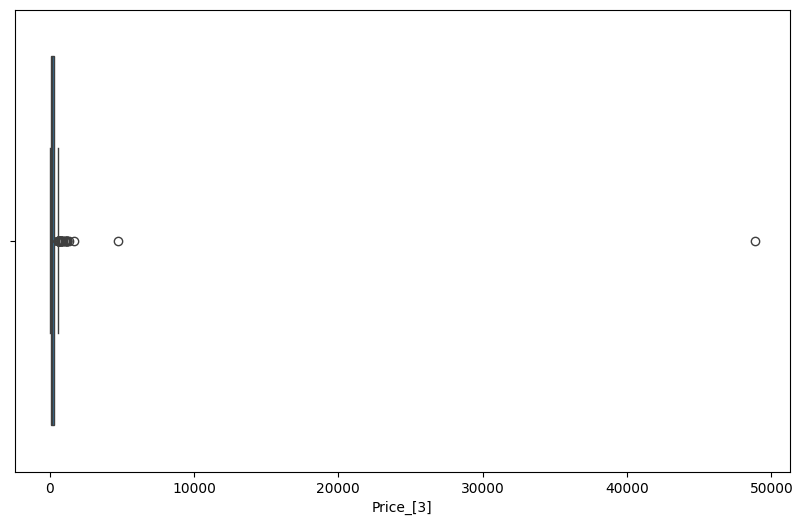

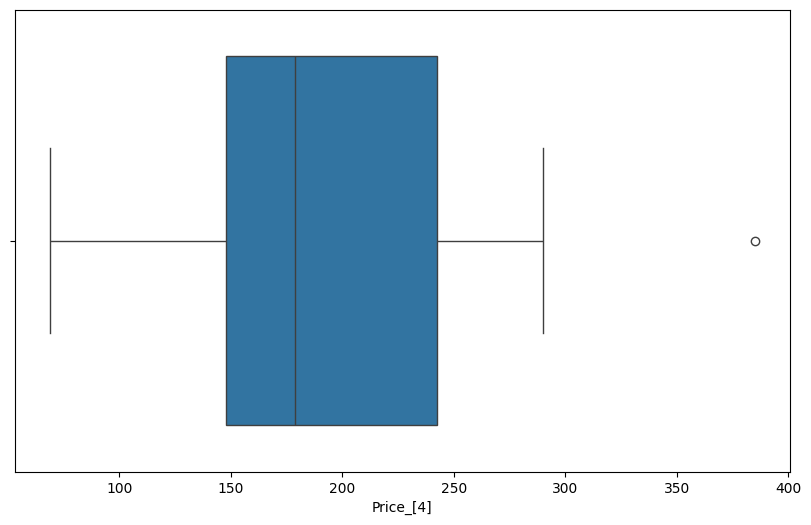

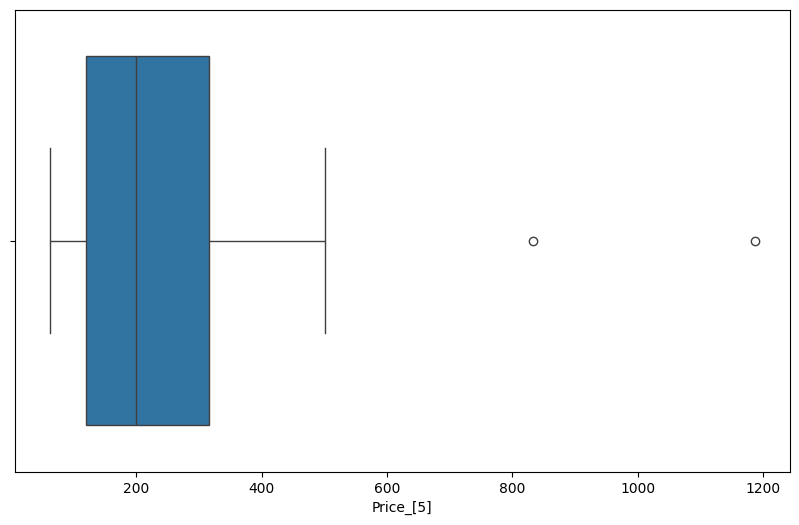

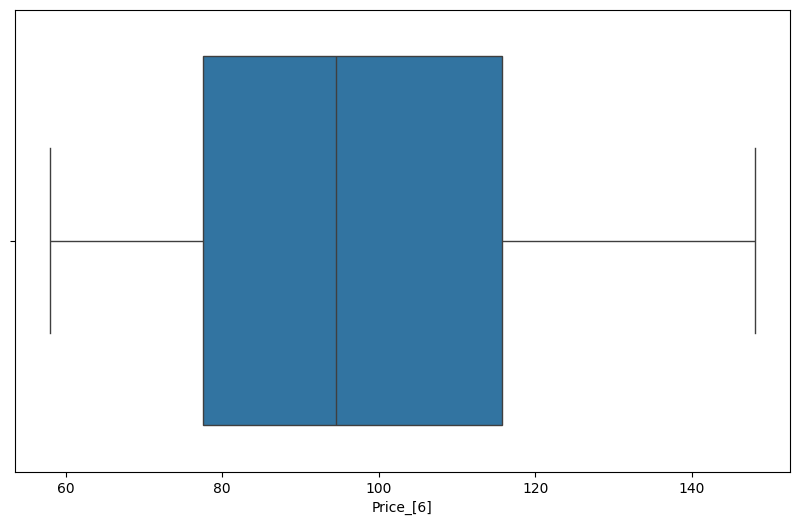

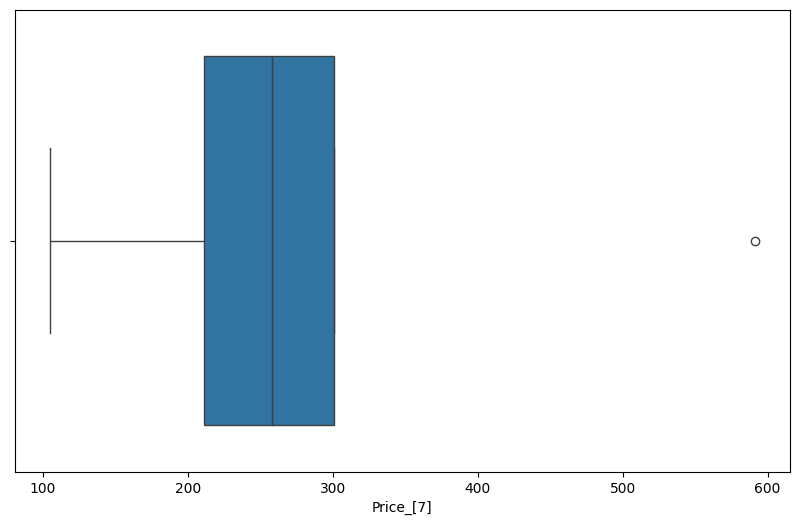

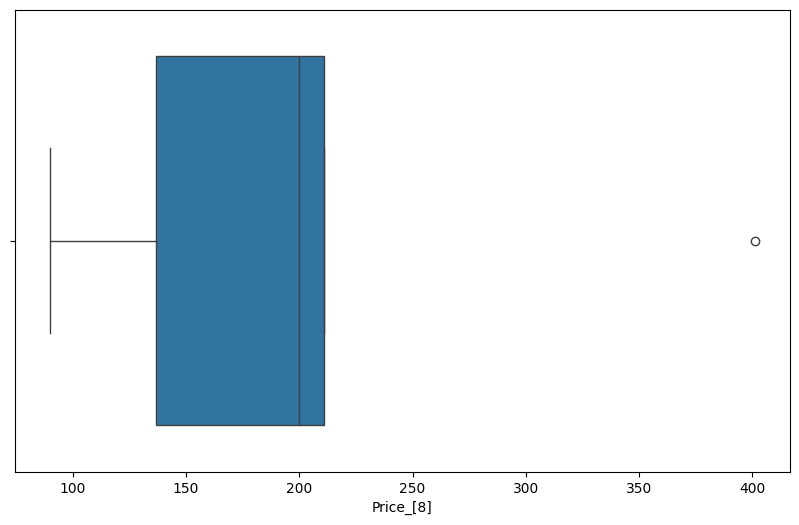

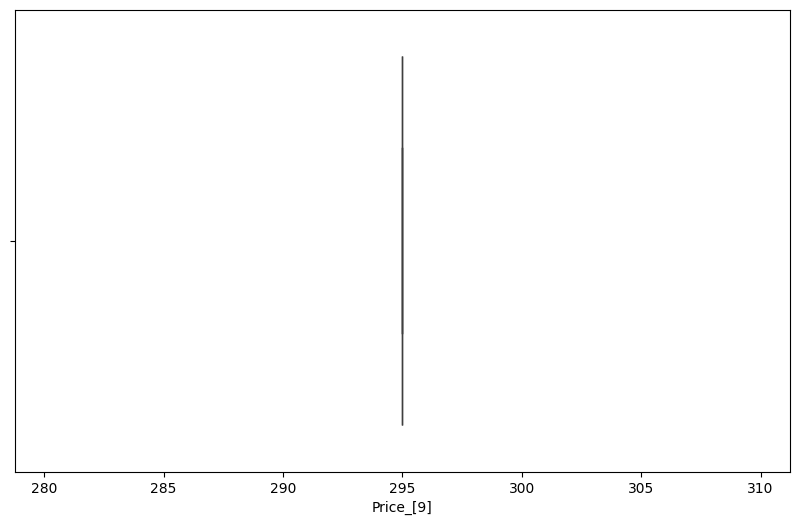

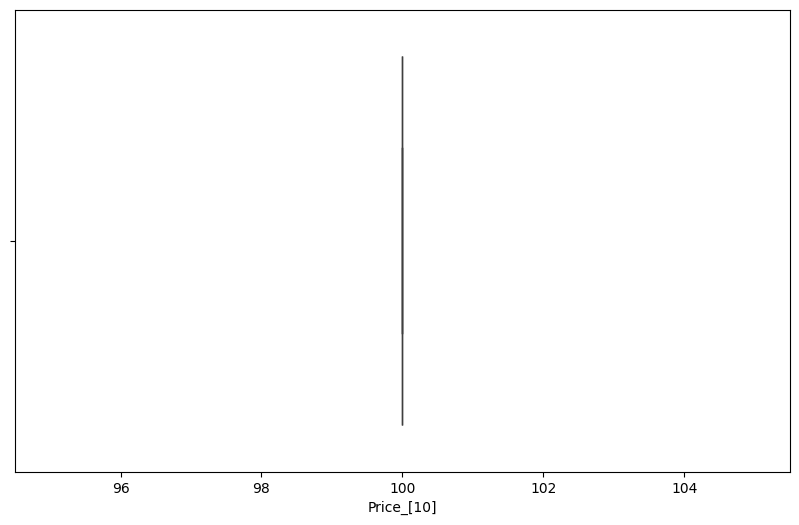

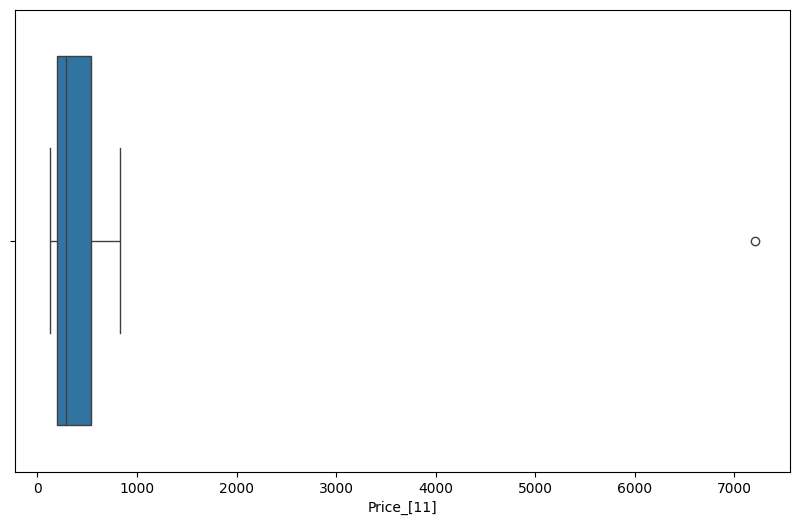

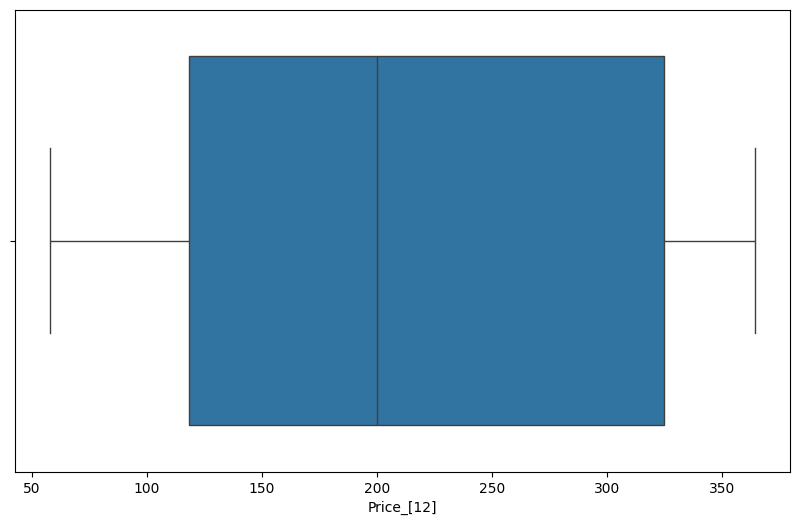

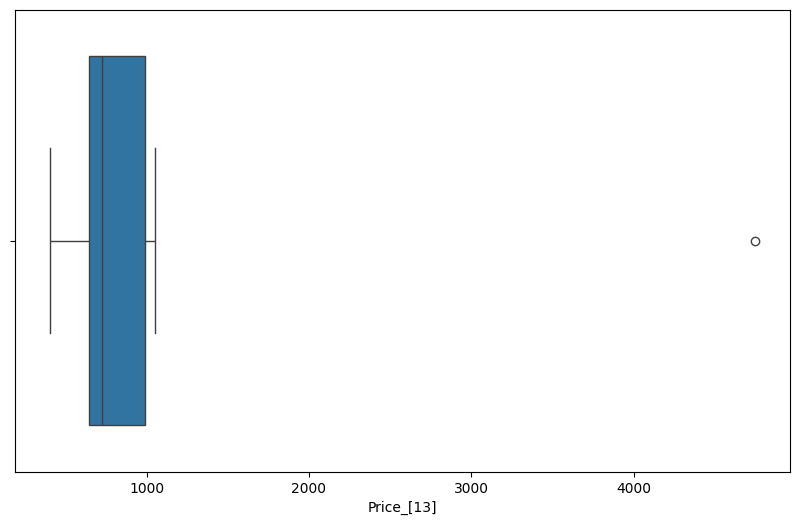

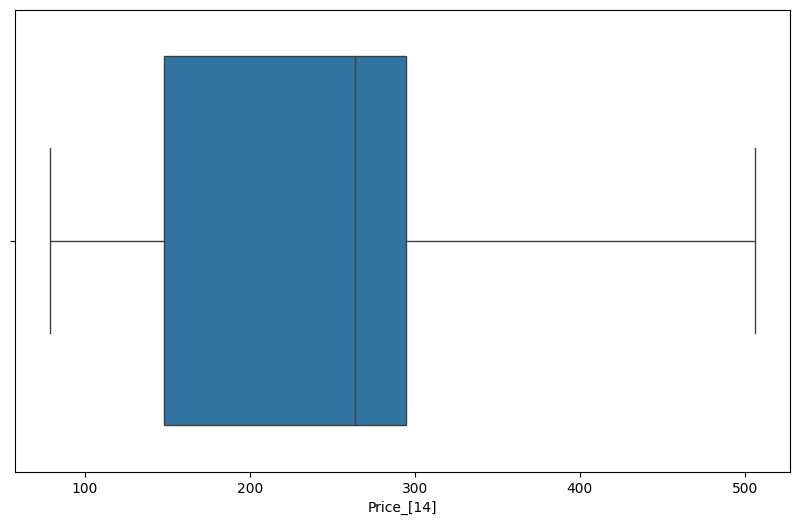

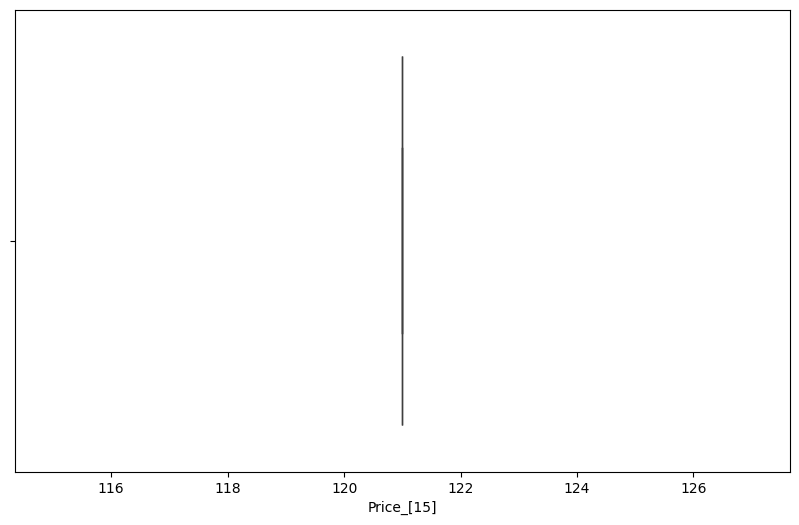

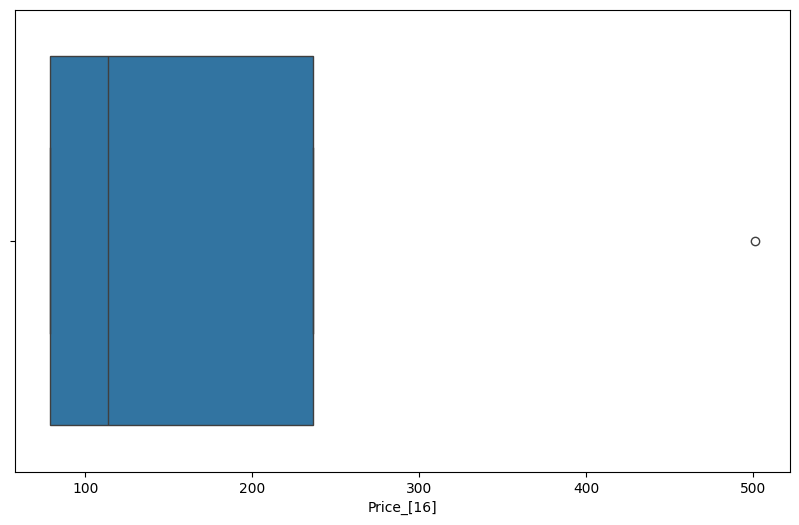

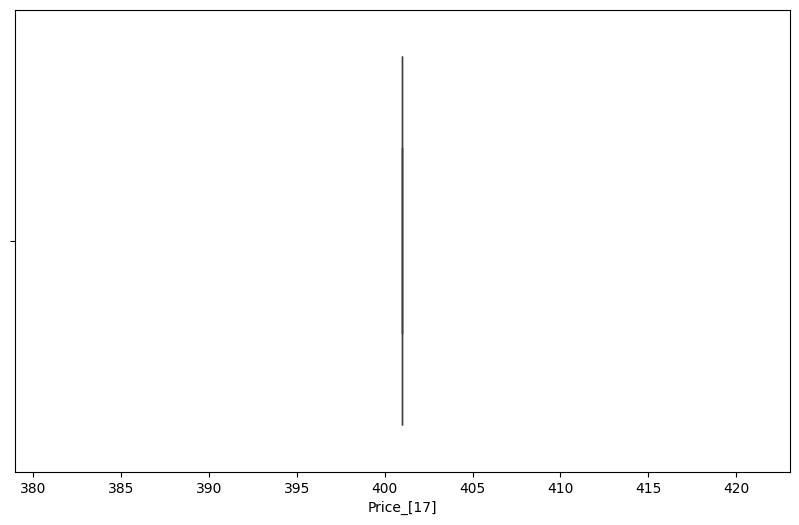

In [53]:
for i in range(len(df_TUR_out)):
    plt.figure(figsize=(10, 6))
    key = f'df_TUR_{i}'
    sns.boxplot(x=df_TUR_out[key]['price'])
    plt.xlabel(f'Price_{[i]}')
    plt.show()

In [54]:
df_TUR_Outlier = df_TUR_out['df_TUR_0'][(df_TUR_out['df_TUR_0']['price'] > 1200)]
print(df_TUR_Outlier.shape)


(3, 30)


In [55]:
dataframe.drop(df_TUR_Outlier.index, inplace=True)

In [56]:
df_TUR_Outlier_1 = df_TUR_out['df_TUR_1'][(df_TUR_out['df_TUR_1']['price'] > 600)]
print(df_TUR_Outlier_1.shape)
df_TUR_Outlier_2 = df_TUR_out['df_TUR_2'][(df_TUR_out['df_TUR_2']['price'] > 600)]
print(df_TUR_Outlier_2.shape)
df_TUR_Outlier_3 = df_TUR_out['df_TUR_3'][(df_TUR_out['df_TUR_3']['price'] > 1200)]
print(df_TUR_Outlier_3.shape)
df_TUR_Outlier_5 = df_TUR_out['df_TUR_5'][(df_TUR_out['df_TUR_5']['price'] > 800)]
print(df_TUR_Outlier_5.shape)
df_TUR_Outlier_7 = df_TUR_out['df_TUR_7'][(df_TUR_out['df_TUR_7']['price'] > 500)]
print(df_TUR_Outlier_7.shape)
df_TUR_Outlier_8 = df_TUR_out['df_TUR_8'][(df_TUR_out['df_TUR_8']['price'] > 300)]
print(df_TUR_Outlier_8.shape)
df_TUR_Outlier_11 = df_TUR_out['df_TUR_11'][(df_TUR_out['df_TUR_11']['price'] > 1200)]
print(df_TUR_Outlier_11.shape)
df_TUR_Outlier_13 = df_TUR_out['df_TUR_13'][(df_TUR_out['df_TUR_13']['price'] > 1200)]
print(df_TUR_Outlier_13.shape)
df_TUR_Outlier_16 = df_TUR_out['df_TUR_16'][(df_TUR_out['df_TUR_16']['price'] > 300)]
print(df_TUR_Outlier_16.shape)

(10, 30)
(1, 30)
(4, 30)
(2, 30)
(1, 30)
(1, 30)
(1, 30)
(1, 30)
(1, 30)


In [57]:
dataframe.drop(df_TUR_Outlier_1.index, inplace=True)
dataframe.drop(df_TUR_Outlier_2.index, inplace=True)
dataframe.drop(df_TUR_Outlier_3.index, inplace=True)
dataframe.drop(df_TUR_Outlier_5.index, inplace=True)
dataframe.drop(df_TUR_Outlier_7.index, inplace=True)
dataframe.drop(df_TUR_Outlier_8.index, inplace=True)
dataframe.drop(df_TUR_Outlier_11.index, inplace=True)
dataframe.drop(df_TUR_Outlier_13.index, inplace=True)
dataframe.drop(df_TUR_Outlier_16.index, inplace=True)

In [58]:
df_HK =dataframe[(dataframe['address.country']== 'Hong Kong')]
df_HK_Prop=df_HK['property_type'].unique()
df_HK_Prop

array(['Apartment', 'Guesthouse', 'Condominium', 'Hostel',
       'Bed and breakfast', 'Guest suite', 'Boutique hotel', 'Townhouse',
       'Loft', 'Serviced apartment', 'Hotel', 'Other',
       'Heritage hotel (India)', 'House', 'Tiny house', 'Houseboat',
       'Farm stay'], dtype=object)

In [59]:
df_HK_out = {}

for i in range(len(df_HK_Prop)):
    key = f'df_HK_{i}'
    df_HK_out[key] = dataframe[(dataframe['address.country'] == 'Hong Kong') & 
                                (dataframe['property_type'] == df_HK_Prop[i]) & 
                                (dataframe['price'])]


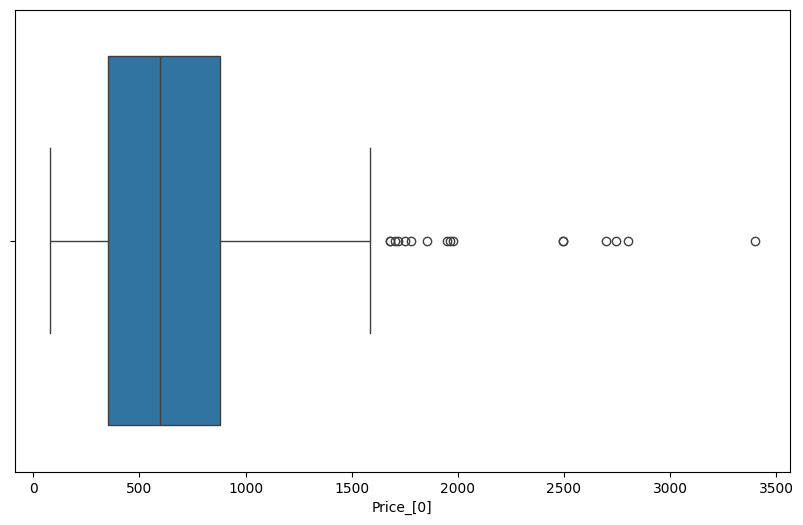

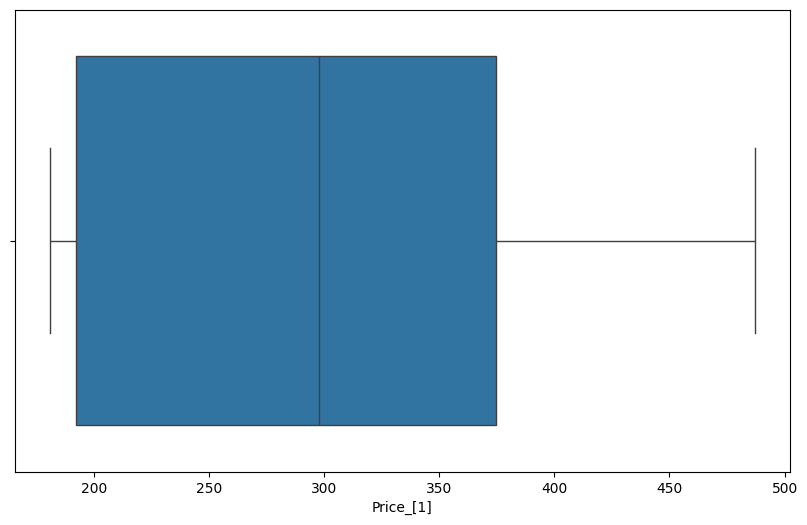

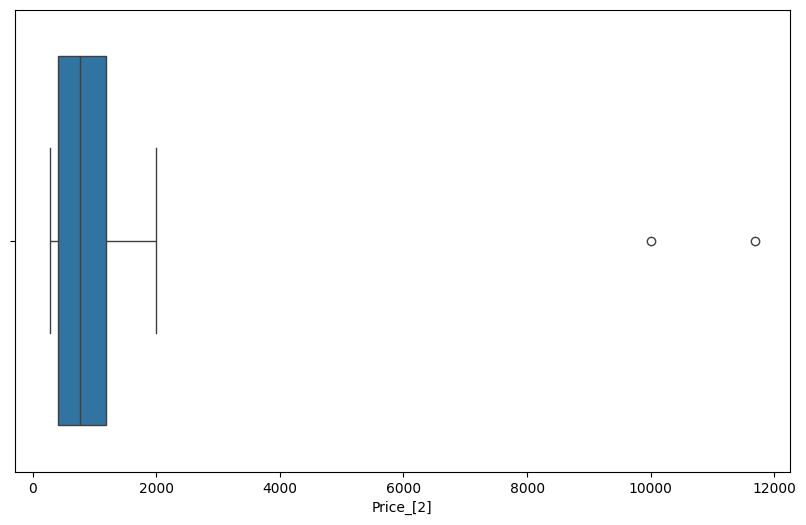

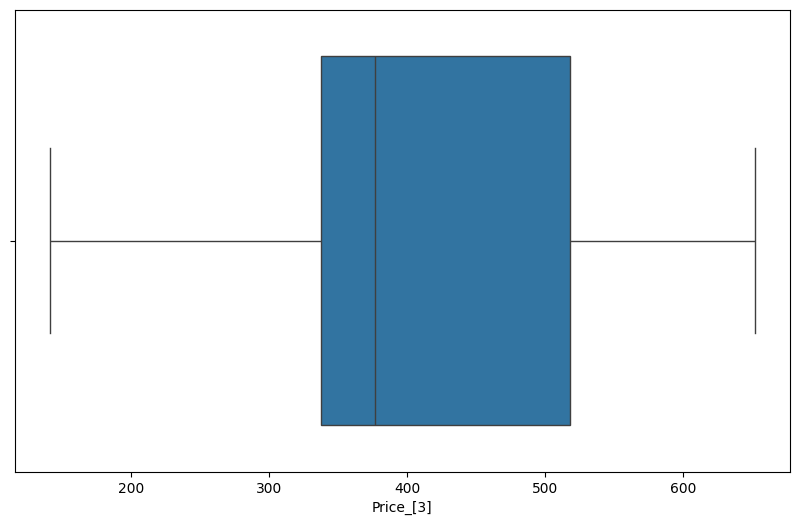

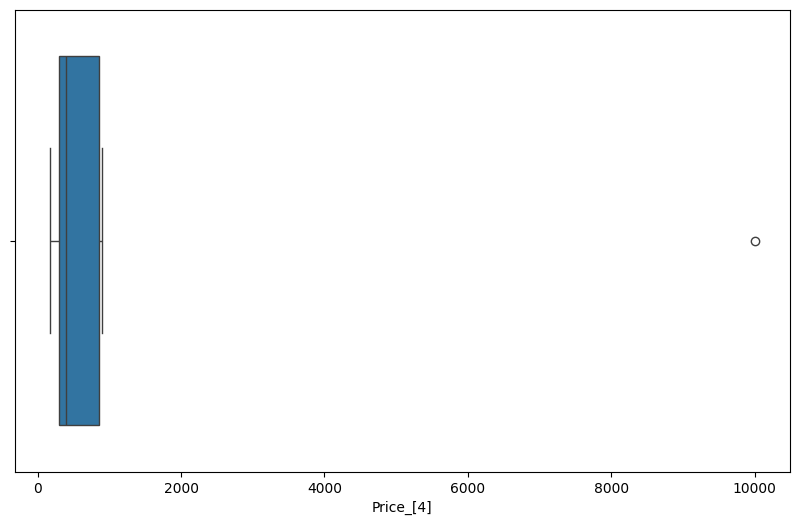

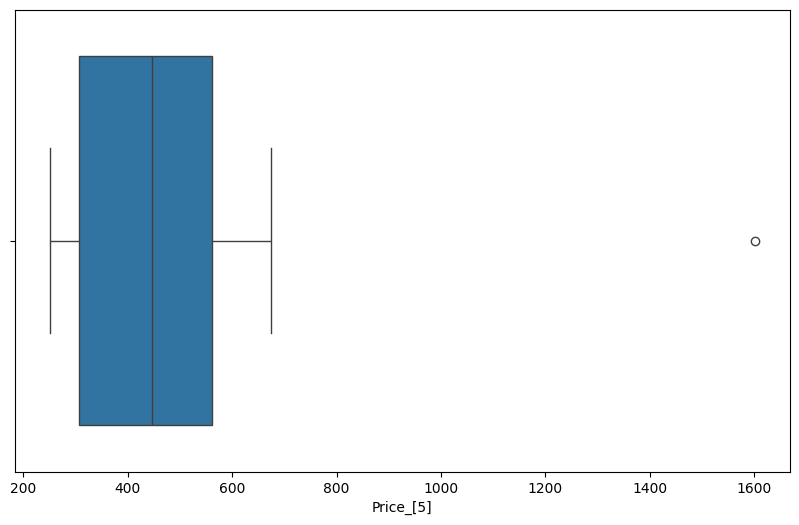

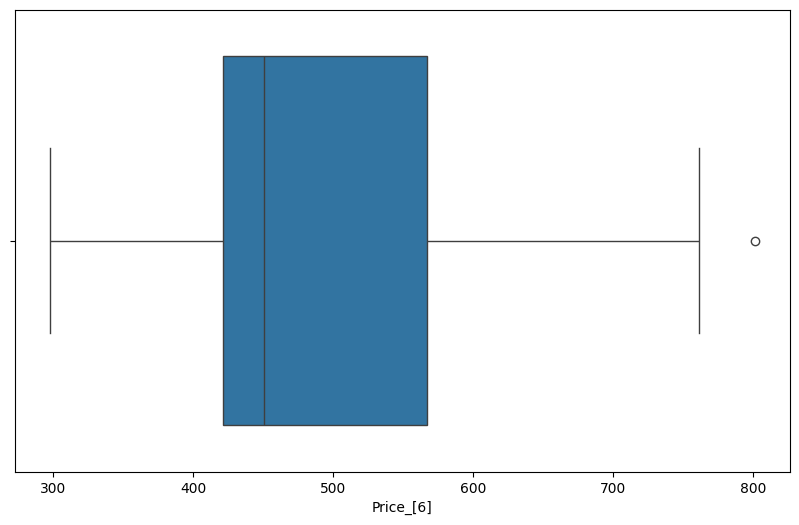

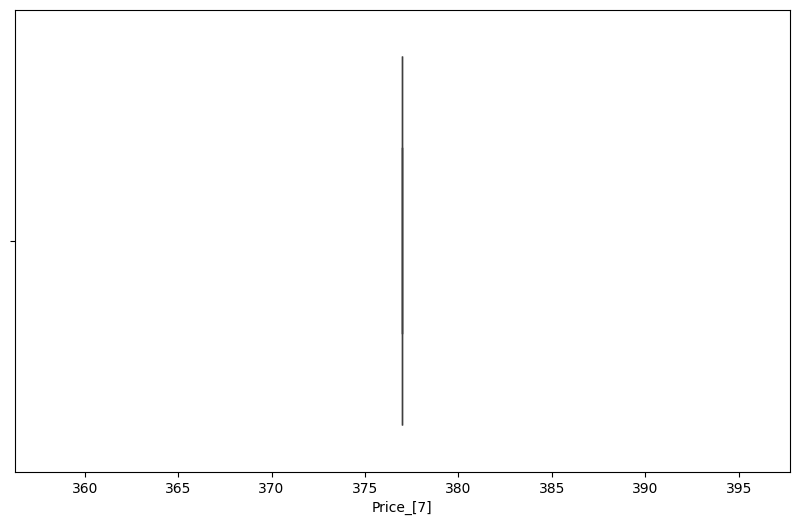

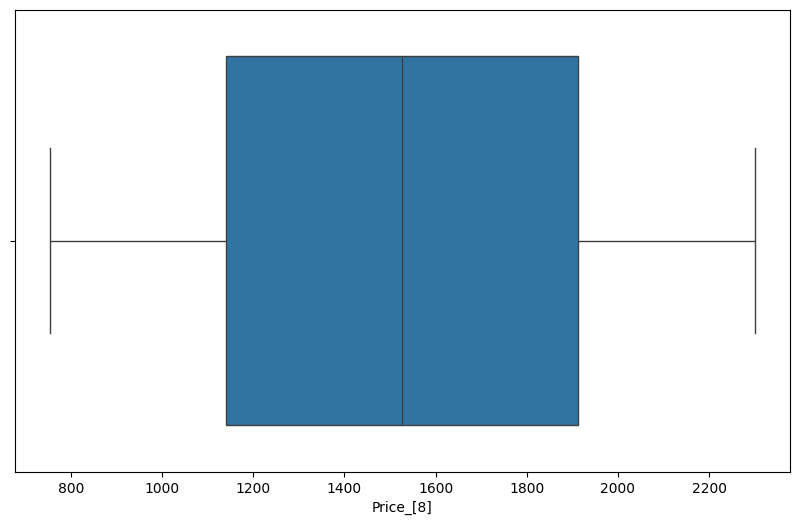

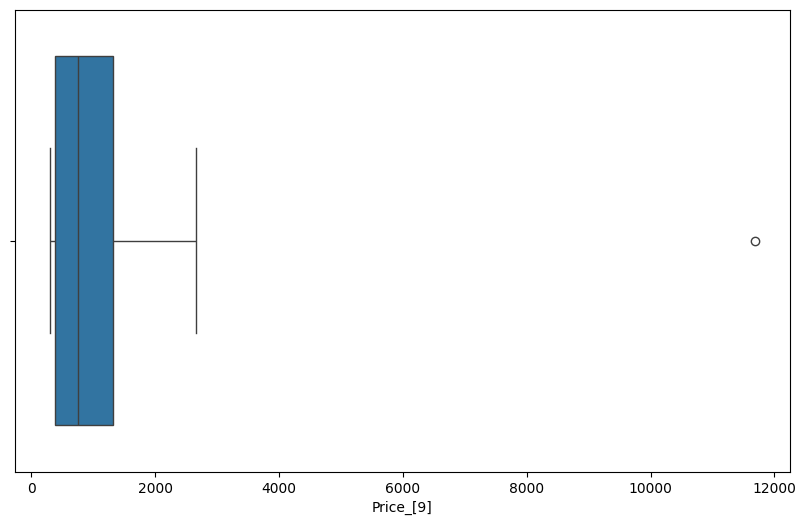

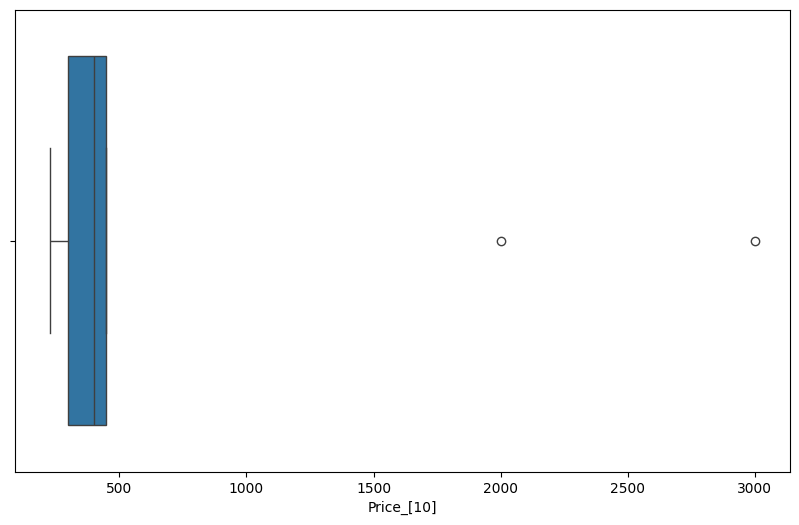

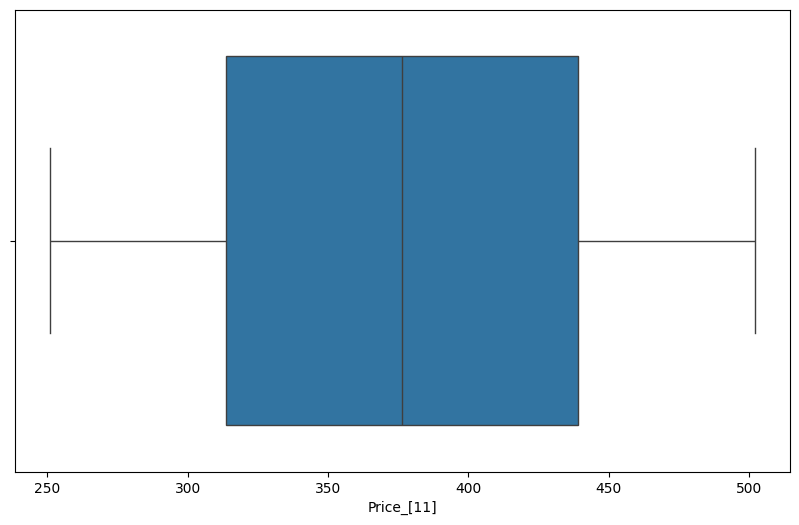

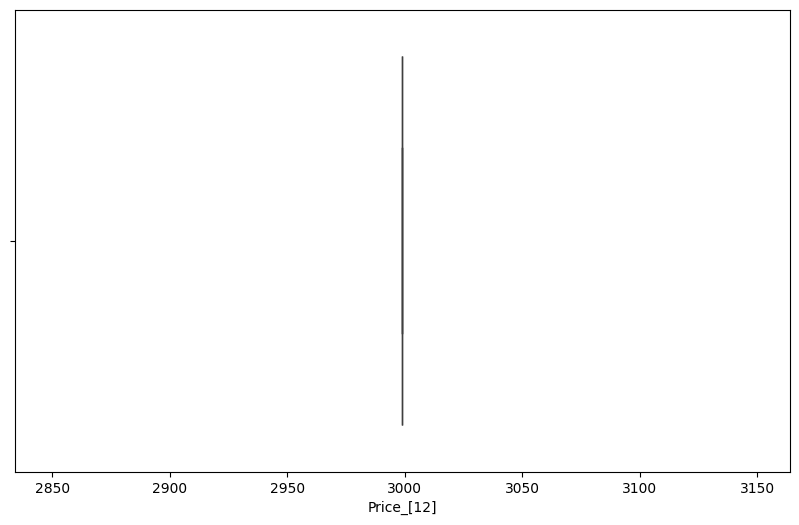

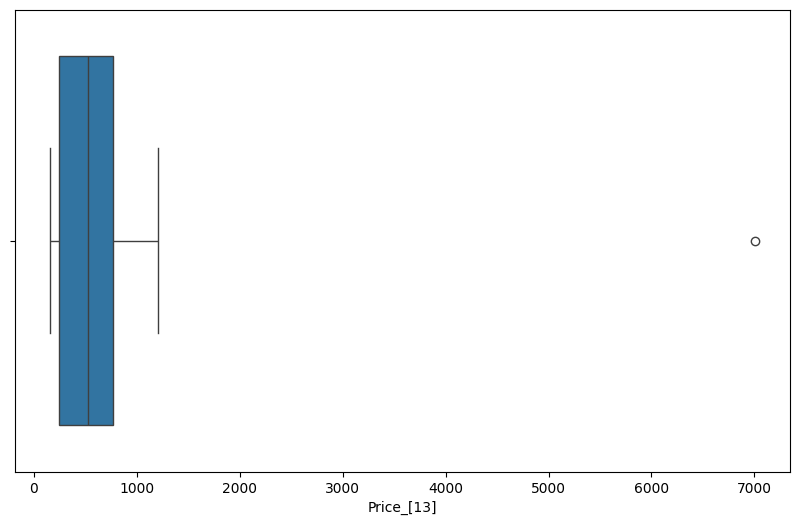

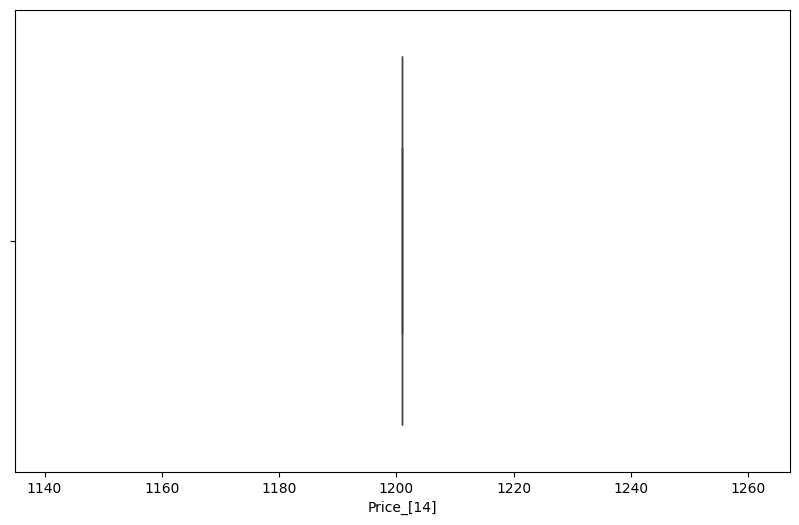

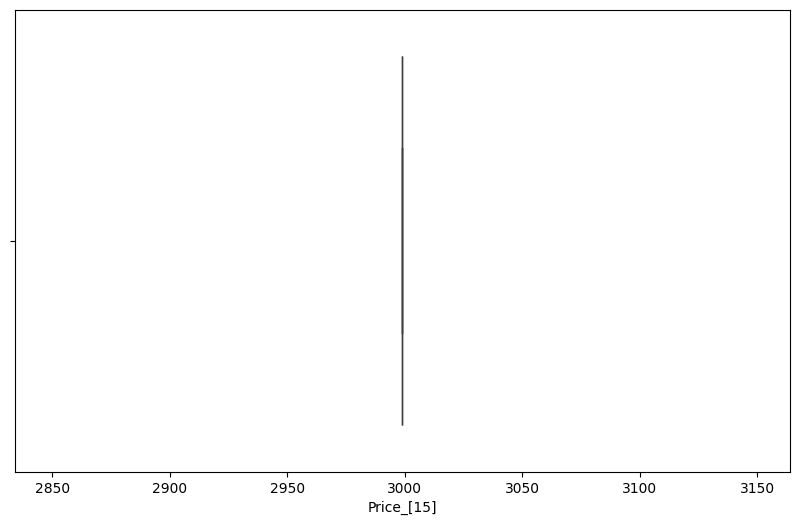

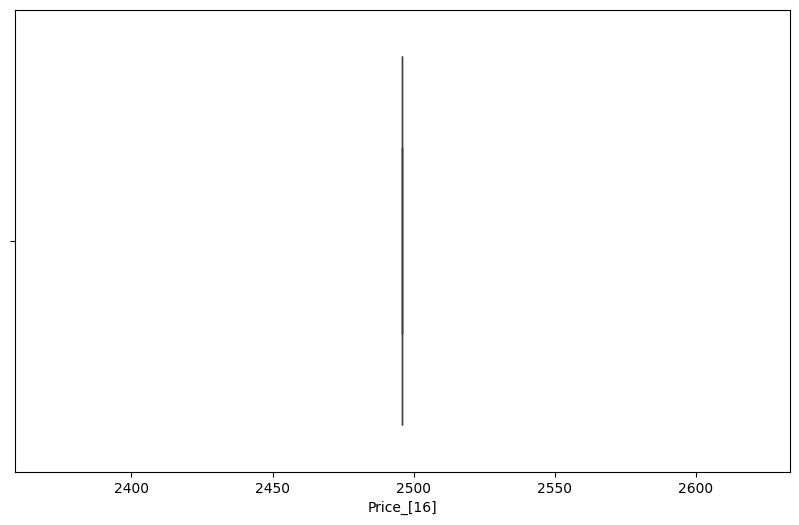

In [60]:
for i in range(len(df_HK_out)):
    plt.figure(figsize=(10, 6))
    key = f'df_HK_{i}'
    sns.boxplot(x=df_HK_out[key]['price'])
    plt.xlabel(f'Price_{[i]}')
    plt.show()

In [61]:
df_HK_Outlier_0 = df_HK_out['df_HK_0'][(df_HK_out['df_HK_0']['price'] > 2000)]
print(df_HK_Outlier_0.shape)
df_HK_Outlier_2 = df_HK_out['df_HK_2'][(df_HK_out['df_HK_2']['price'] > 2500)]
print(df_HK_Outlier_2.shape)
df_HK_Outlier_4 = df_HK_out['df_HK_4'][(df_HK_out['df_HK_4']['price'] > 2000)]
print(df_HK_Outlier_4.shape)
df_HK_Outlier_5 = df_HK_out['df_HK_5'][(df_HK_out['df_HK_5']['price'] > 800)]
print(df_HK_Outlier_5.shape)
df_HK_Outlier_6 = df_HK_out['df_HK_6'][(df_HK_out['df_HK_6']['price'] > 750)]
print(df_HK_Outlier_6.shape)
df_HK_Outlier_9 = df_HK_out['df_HK_9'][(df_HK_out['df_HK_9']['price'] > 3000)]
print(df_HK_Outlier_9.shape)
df_HK_Outlier_10 = df_HK_out['df_HK_10'][(df_HK_out['df_HK_10']['price'] > 700)]
print(df_HK_Outlier_10.shape)
df_HK_Outlier_13 = df_HK_out['df_HK_13'][(df_HK_out['df_HK_13']['price'] > 1500)]
print(df_HK_Outlier_13.shape)

(6, 30)
(2, 30)
(1, 30)
(1, 30)
(2, 30)
(1, 30)
(2, 30)
(1, 30)


In [62]:
dataframe.drop(df_HK_Outlier_0.index, inplace=True)
dataframe.drop(df_HK_Outlier_2.index, inplace=True)
dataframe.drop(df_HK_Outlier_4.index, inplace=True)
dataframe.drop(df_HK_Outlier_5.index, inplace=True)
dataframe.drop(df_HK_Outlier_6.index, inplace=True)
dataframe.drop(df_HK_Outlier_9.index, inplace=True)
dataframe.drop(df_HK_Outlier_10.index, inplace=True)
dataframe.drop(df_HK_Outlier_13.index, inplace=True)

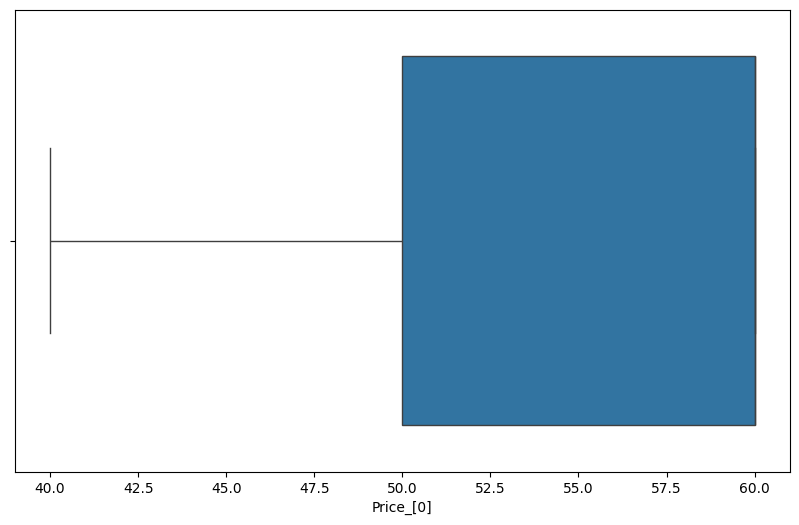

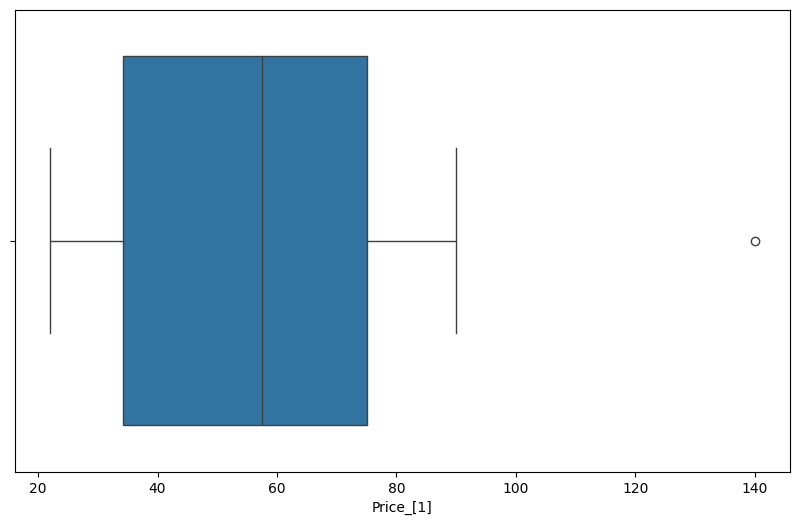

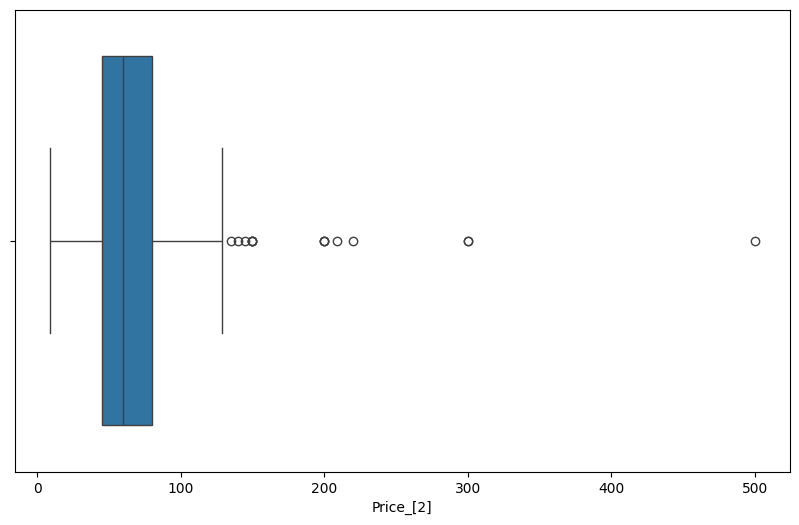

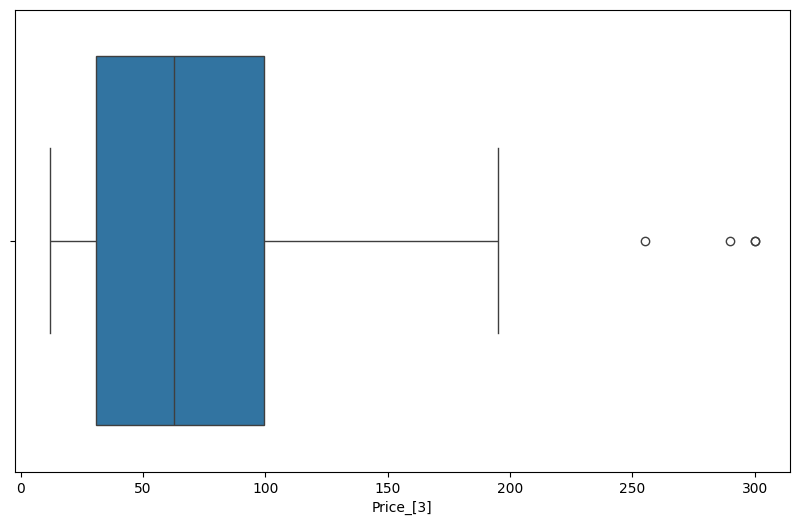

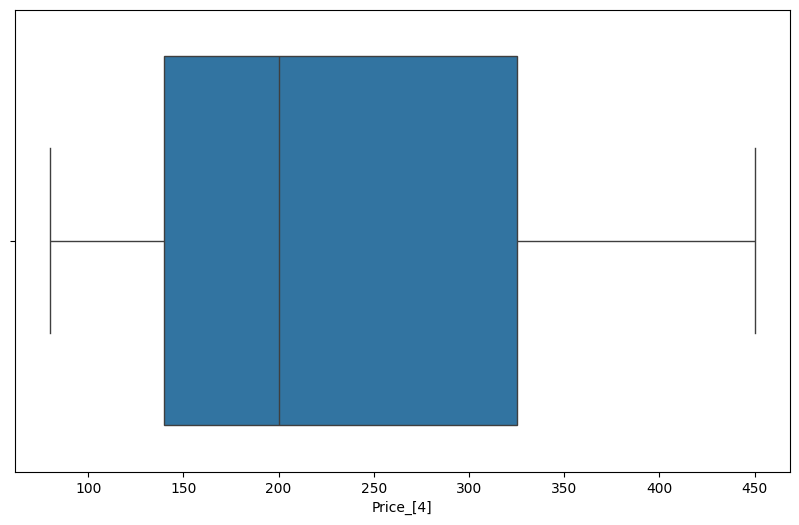

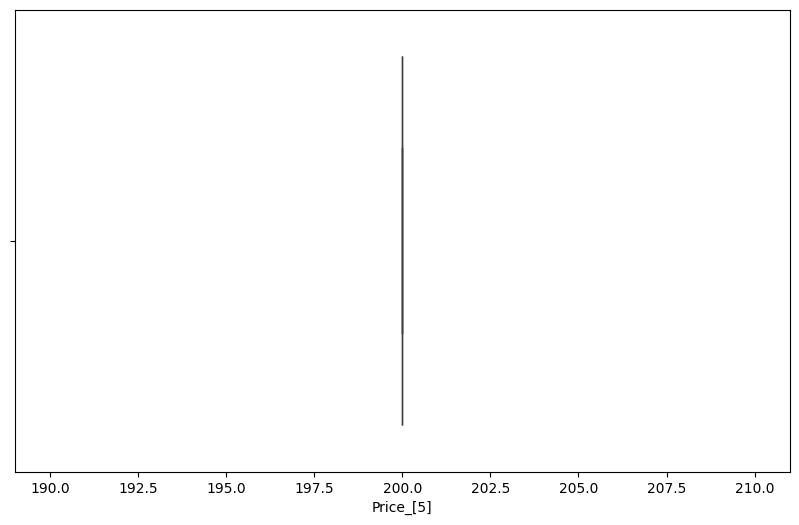

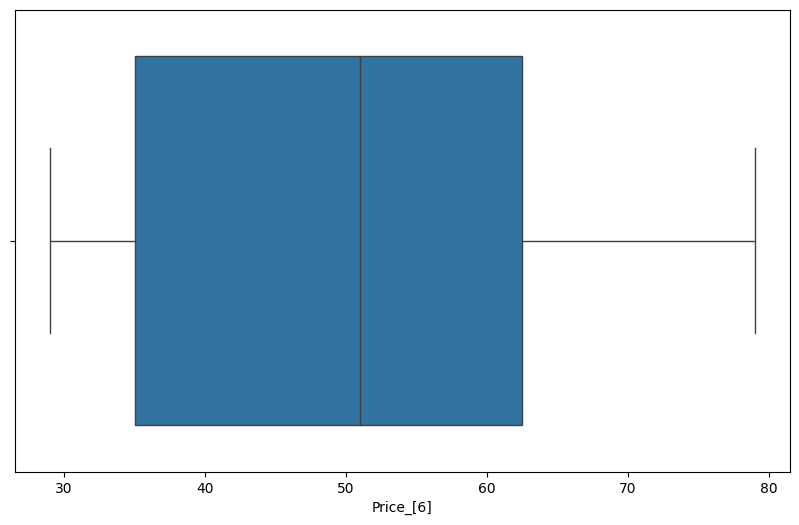

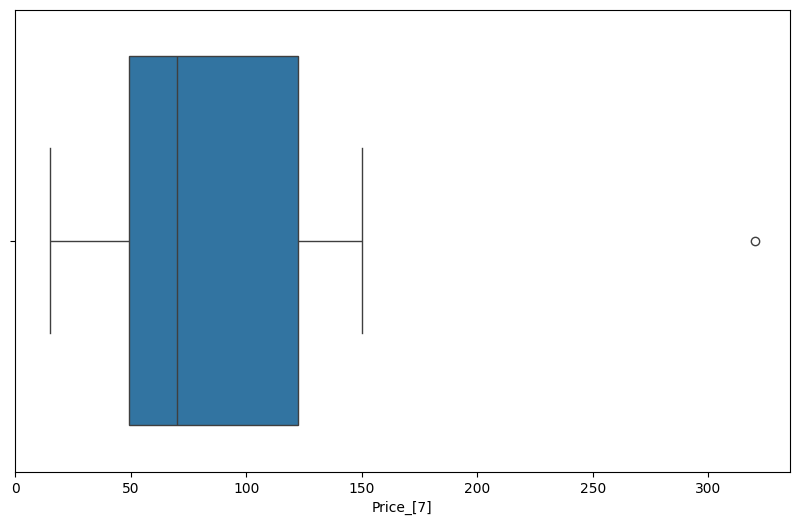

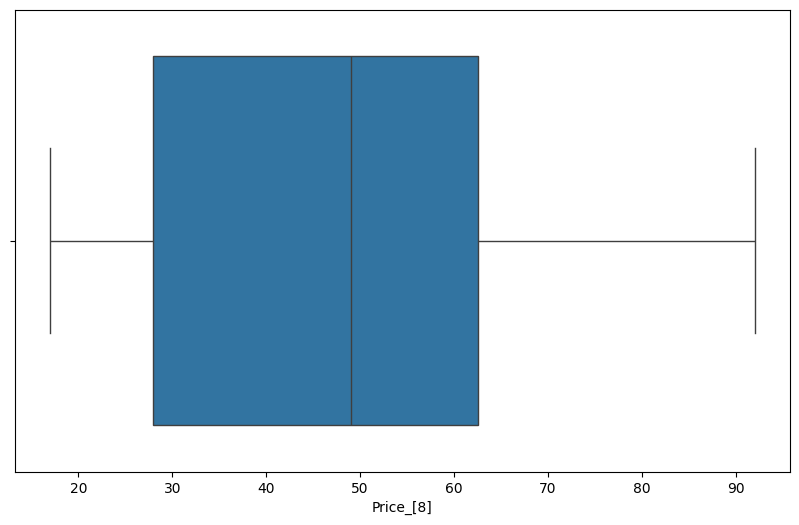

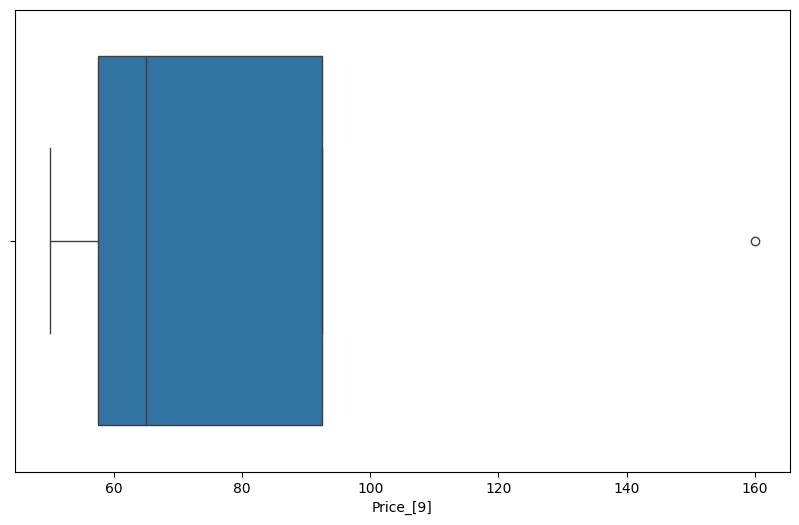

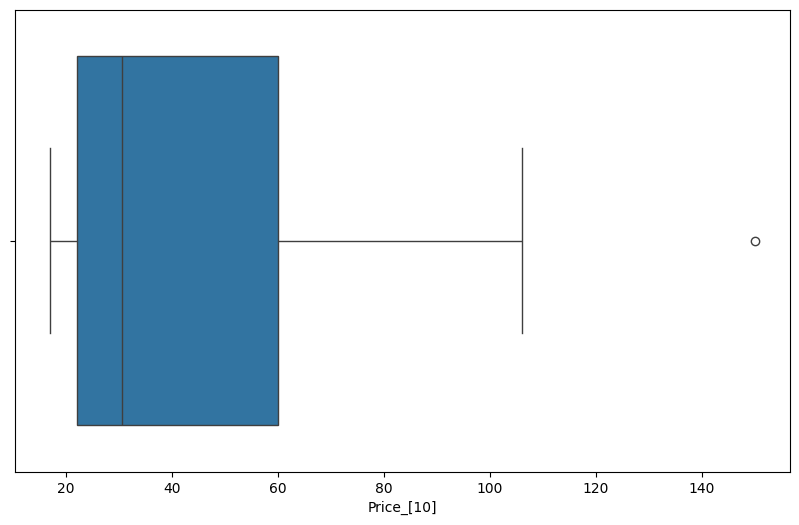

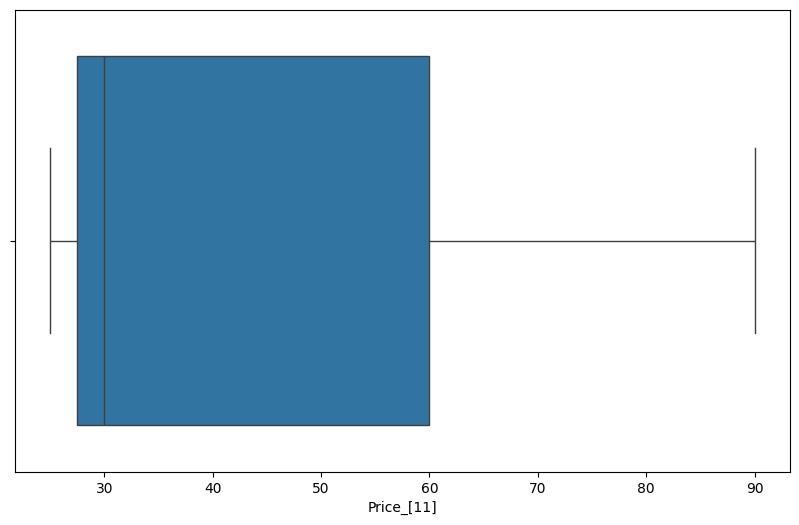

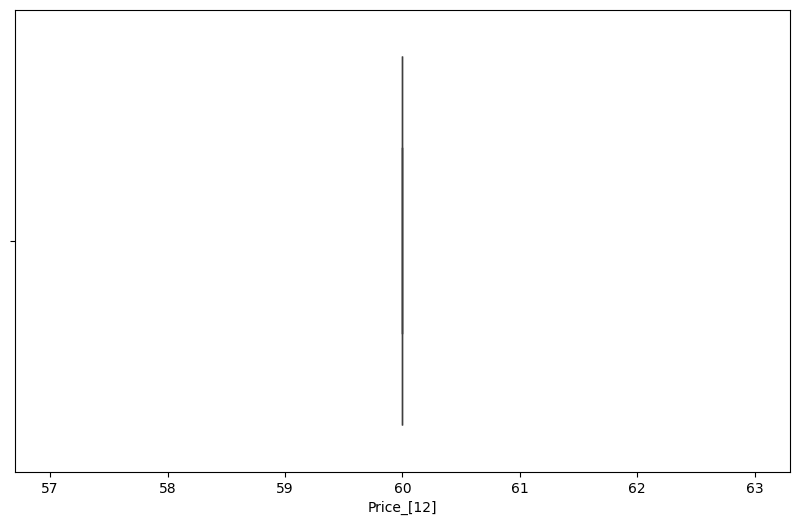

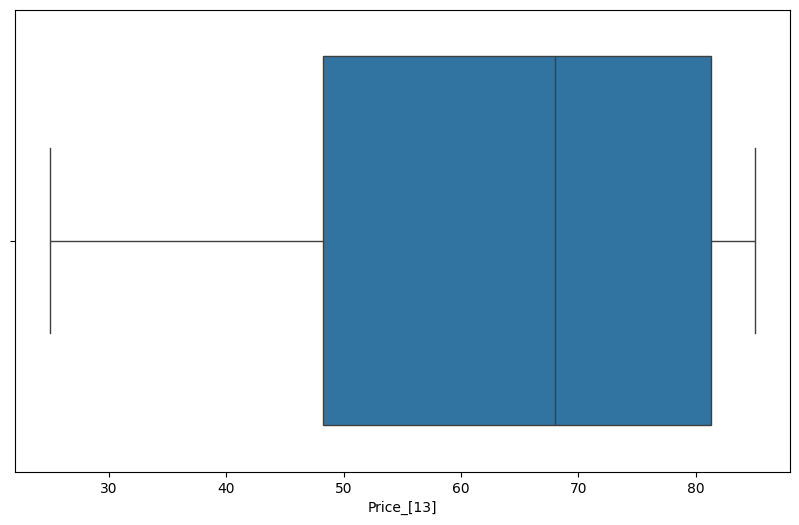

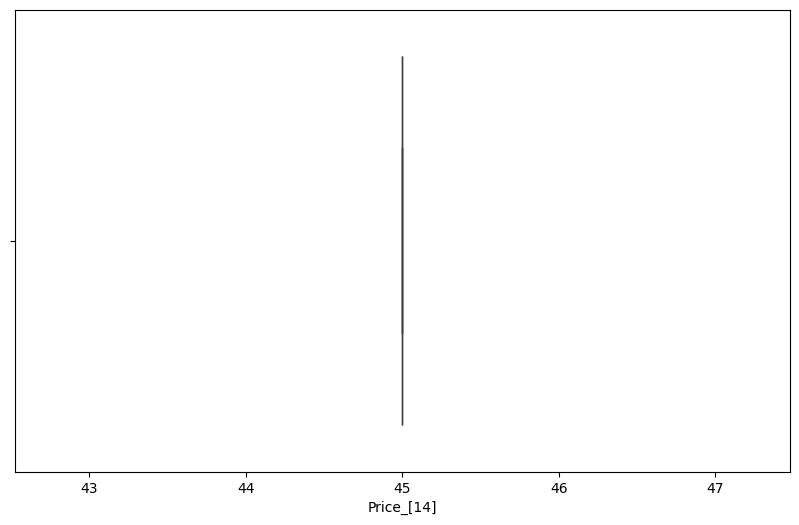

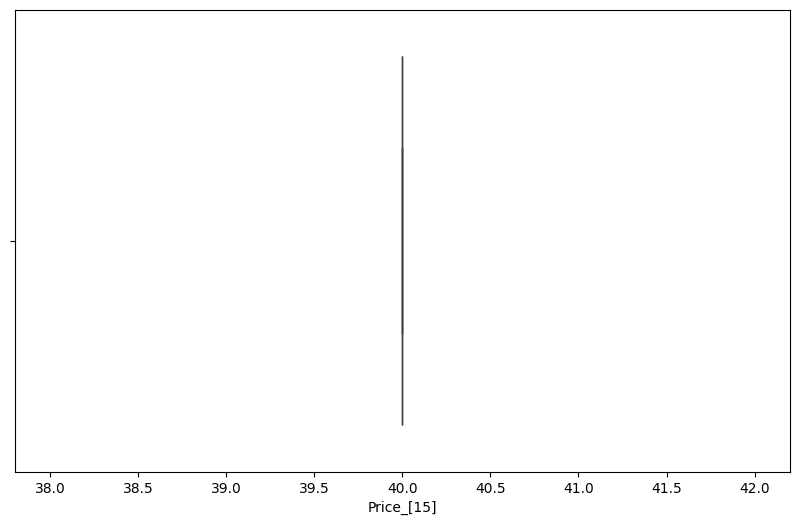

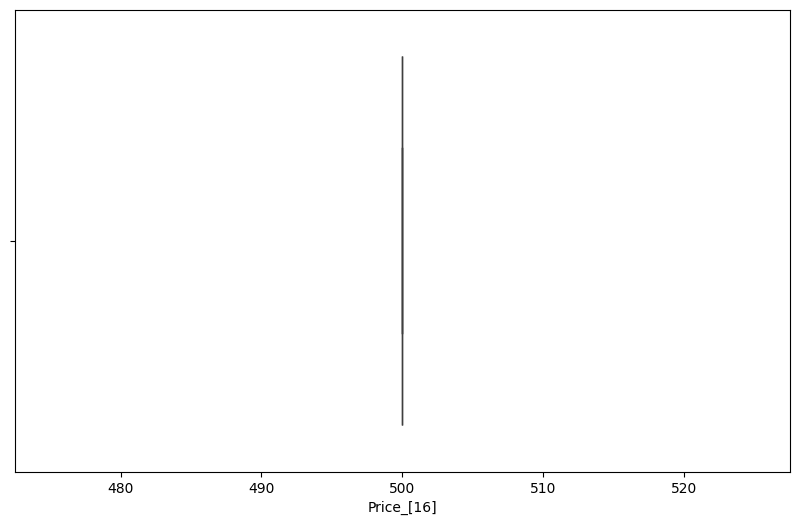

In [63]:
df_POR =dataframe[(dataframe['address.country']== 'Portugal')]
df_POR_Prop=df_POR['property_type'].unique()

df_POR_out = {}
for i in range(len(df_POR_Prop)):
    key = f'df_POR_{i}'
    df_POR_out[key] = dataframe[(dataframe['address.country'] == 'Portugal') & 
                                (dataframe['property_type'] == df_POR_Prop[i]) & 
                                (dataframe['price'])]

for j in range(len(df_POR_out)):
    plt.figure(figsize=(10, 6))
    key = f'df_POR_{j}'
    sns.boxplot(x=df_POR_out[key]['price'])
    plt.xlabel(f'Price_{[j]}')
    plt.show()


In [64]:
df_POR_Outlier_1 = df_POR_out['df_POR_1'][(df_POR_out['df_POR_1']['price'] > 100)]
print(df_POR_Outlier_1.shape)
df_POR_Outlier_2 = df_POR_out['df_POR_2'][(df_POR_out['df_POR_2']['price'] > 150)]
print(df_POR_Outlier_2.shape)
df_POR_Outlier_3 = df_POR_out['df_POR_3'][(df_POR_out['df_POR_3']['price'] > 200)]
print(df_POR_Outlier_3.shape)
df_POR_Outlier_7 = df_POR_out['df_POR_7'][(df_POR_out['df_POR_7']['price'] > 150)]
print(df_POR_Outlier_7.shape)
df_POR_Outlier_9 = df_POR_out['df_POR_9'][(df_POR_out['df_POR_9']['price'] > 100)]
print(df_POR_Outlier_9.shape)
df_POR_Outlier_10 = df_POR_out['df_POR_10'][(df_POR_out['df_POR_10']['price'] > 110)]
print(df_POR_Outlier_10.shape)

(1, 30)
(8, 30)
(4, 30)
(1, 30)
(1, 30)
(1, 30)


In [65]:
dataframe.drop(df_POR_Outlier_2.index, inplace=True)
dataframe.drop(df_POR_Outlier_3.index, inplace=True)
dataframe.drop(df_POR_Outlier_7.index, inplace=True)
dataframe.drop(df_POR_Outlier_9.index, inplace=True)
dataframe.drop(df_POR_Outlier_10.index, inplace=True)

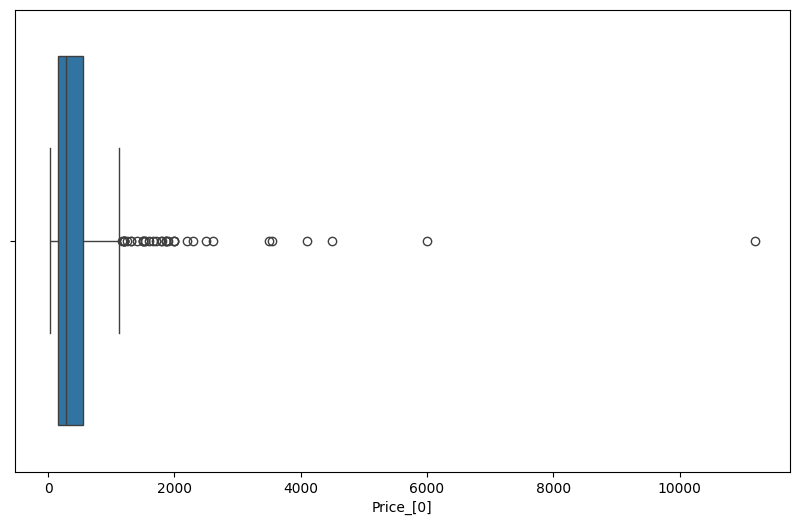

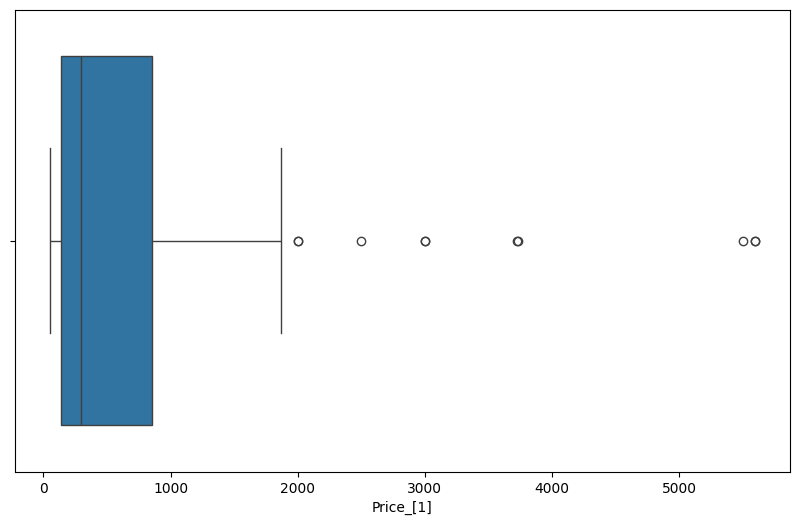

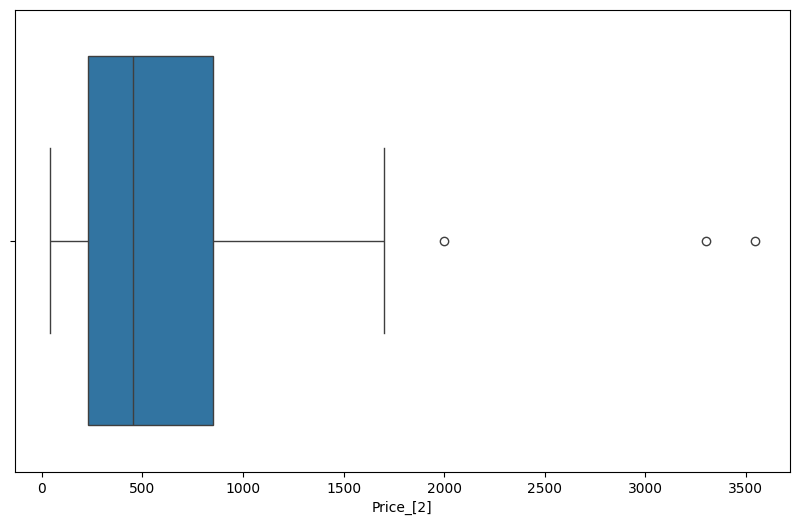

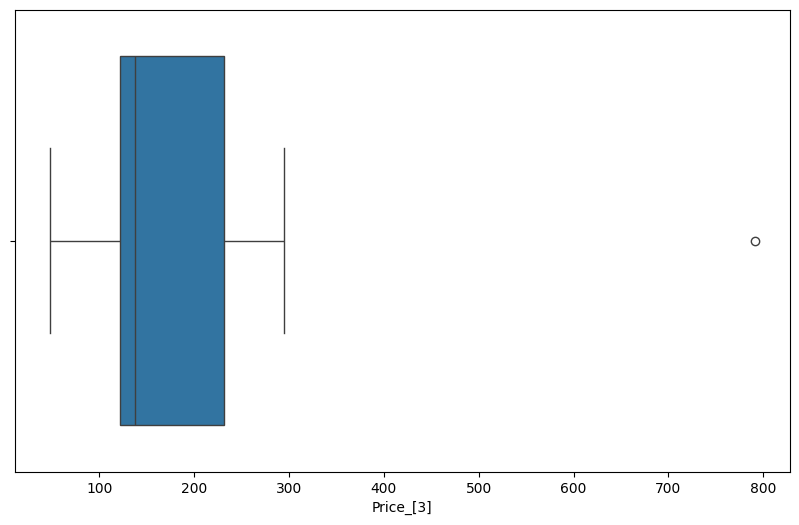

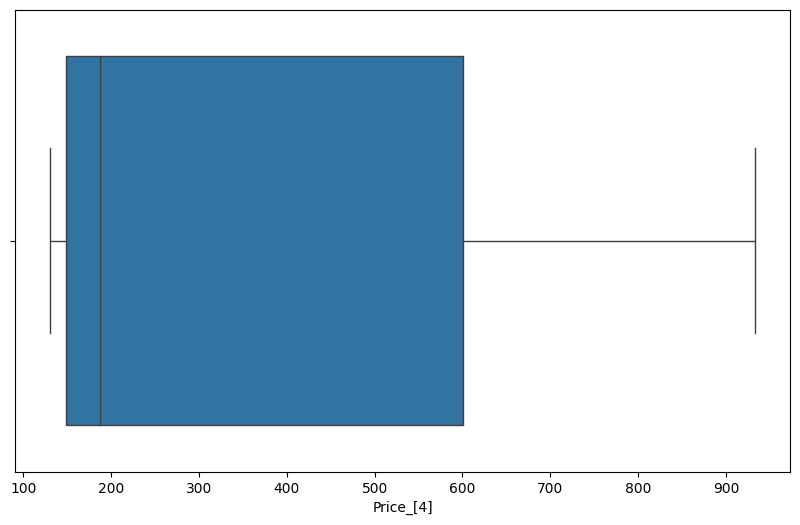

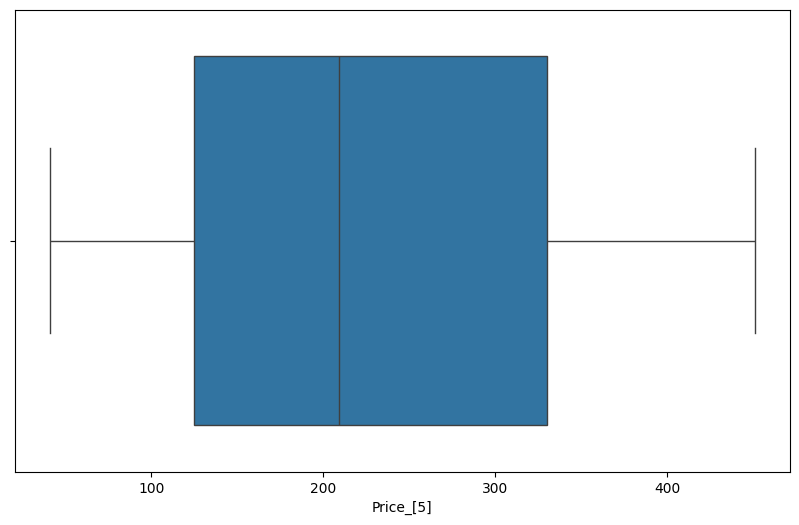

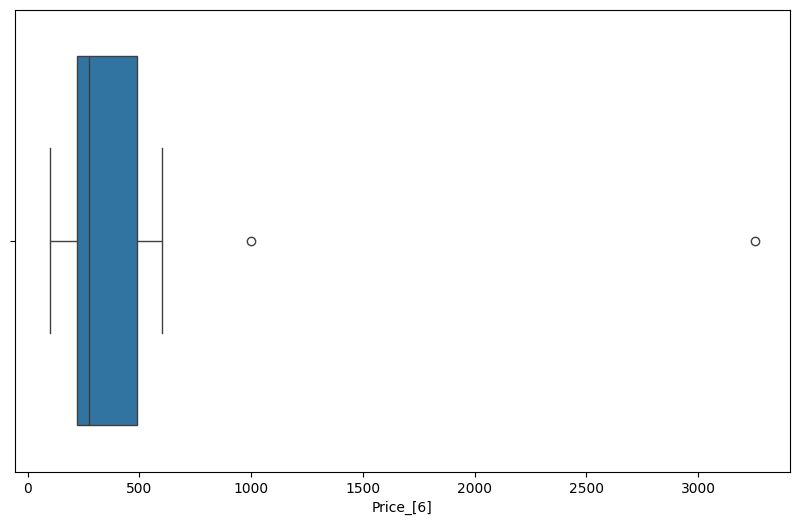

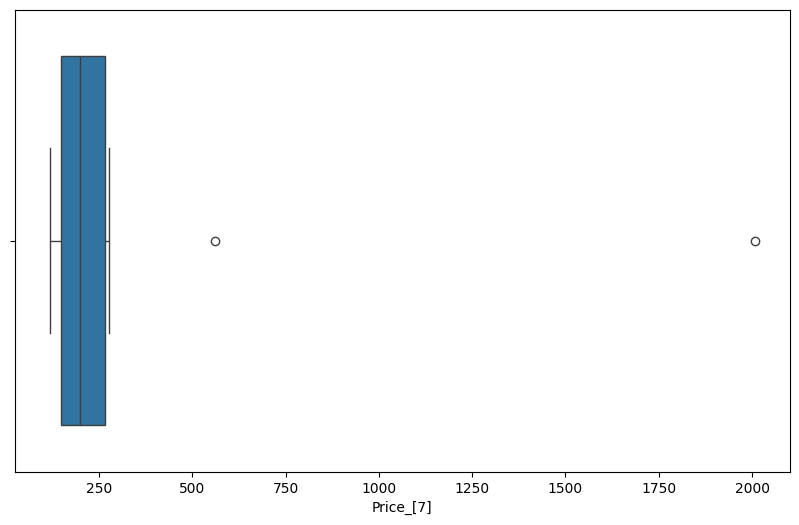

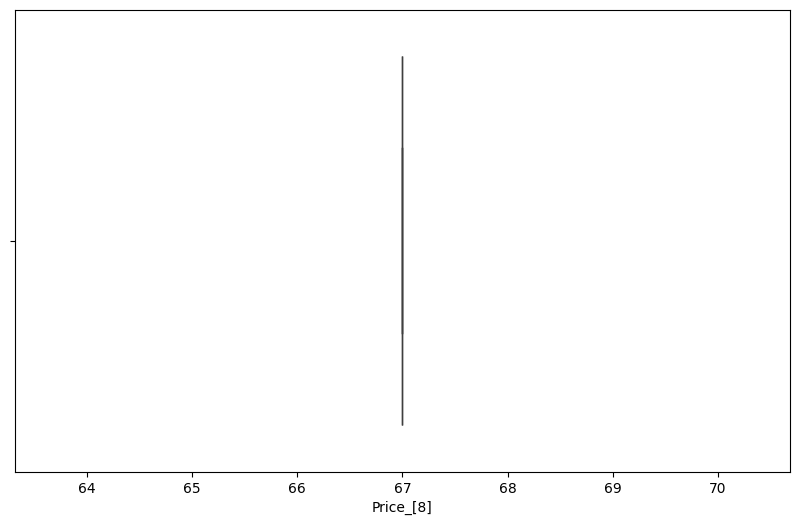

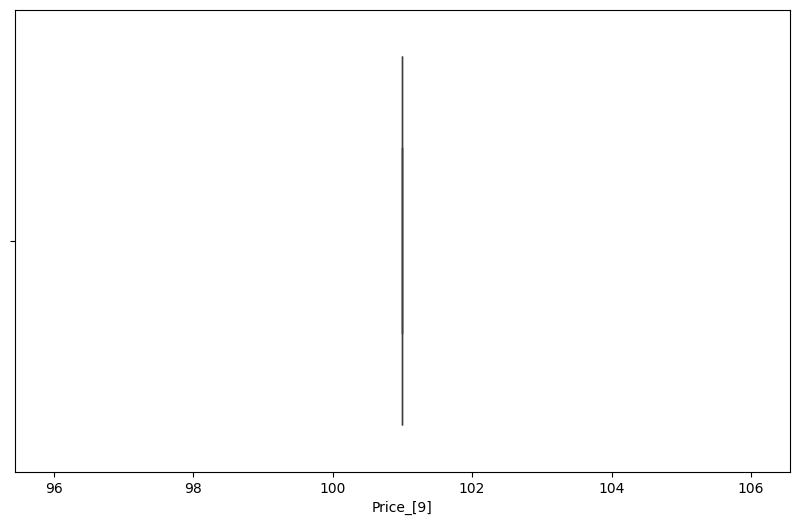

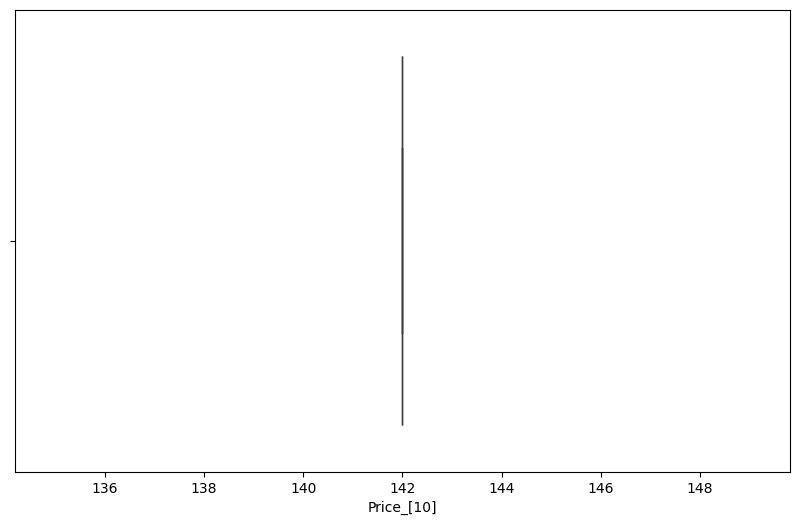

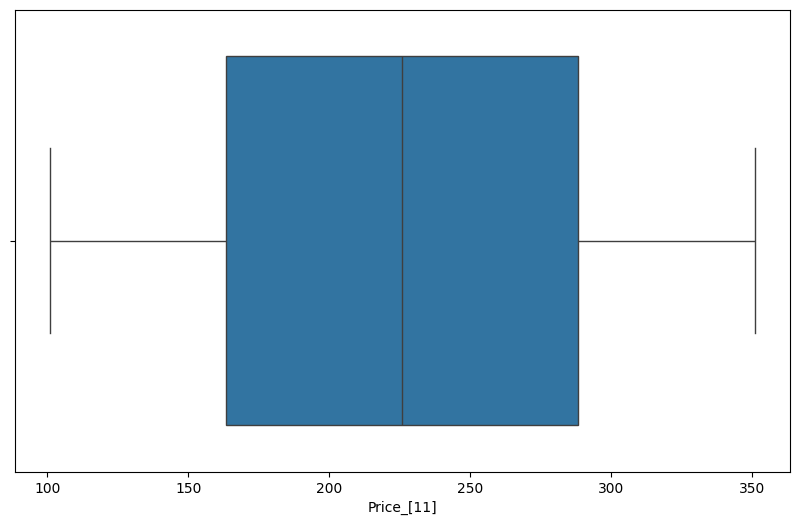

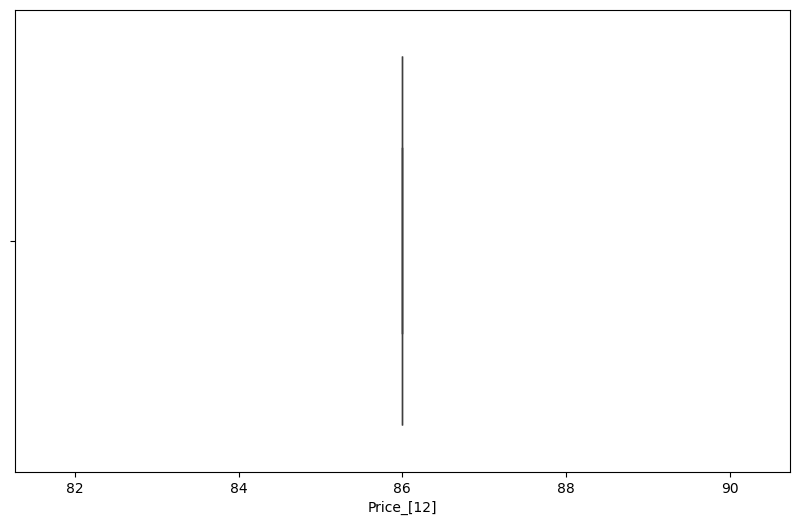

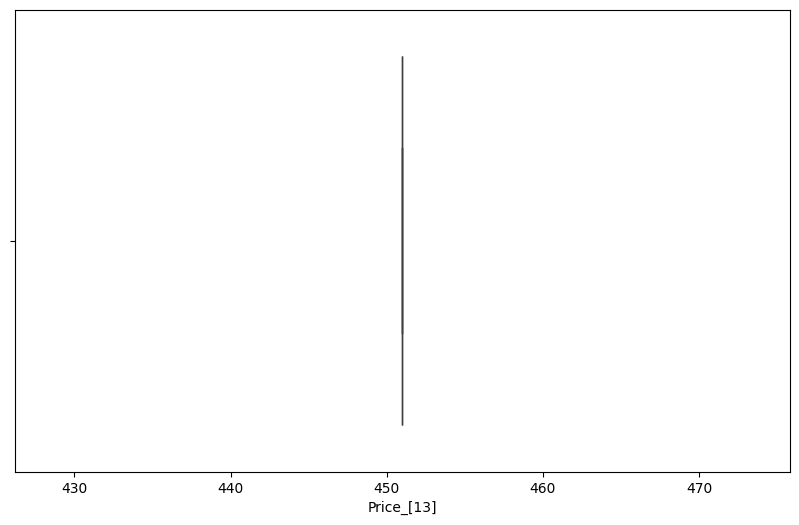

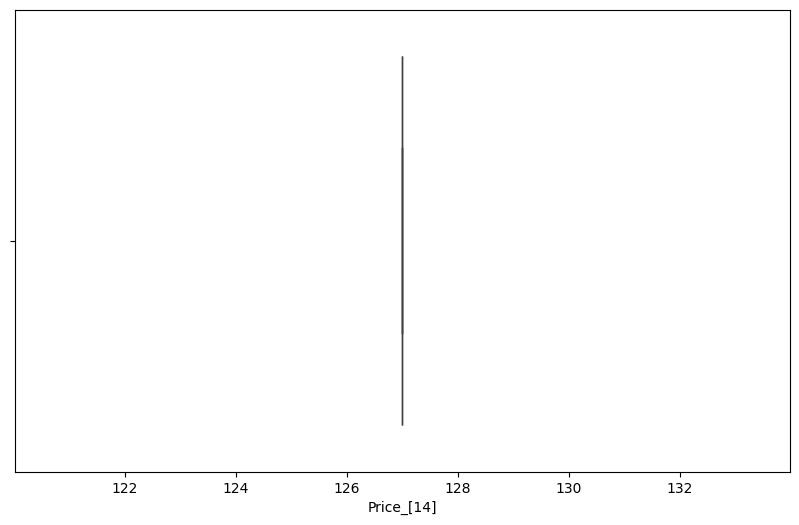

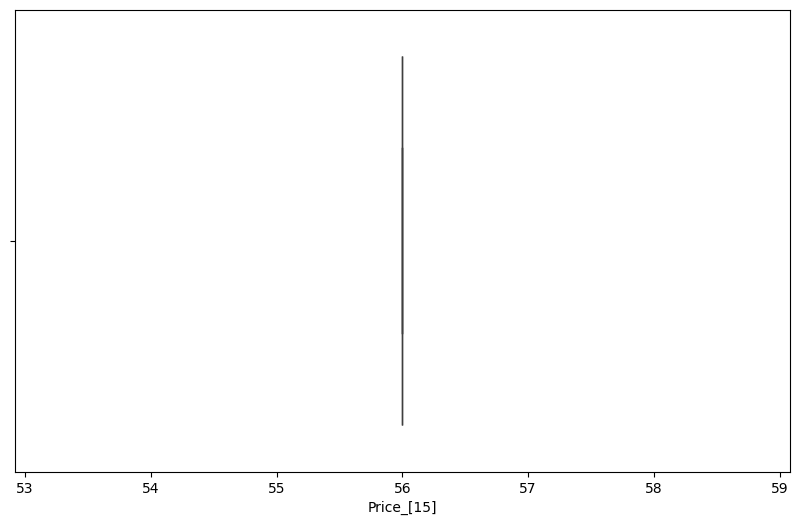

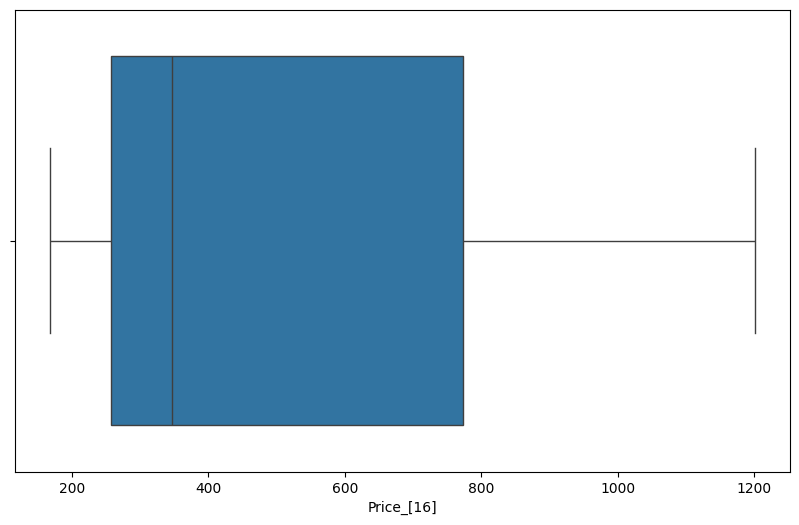

In [66]:
df_B =dataframe[(dataframe['address.country']== 'Brazil')]
df_B_Prop=df_B['property_type'].unique()

df_B_out = {}
for i in range(len(df_B_Prop)):
    key = f'df_B_{i}'
    df_B_out[key] = dataframe[(dataframe['address.country'] == 'Brazil') & 
                                (dataframe['property_type'] == df_B_Prop[i]) & 
                                (dataframe['price'])]

for j in range(len(df_B_out)):
    plt.figure(figsize=(10, 6))
    key = f'df_B_{j}'
    sns.boxplot(x=df_B_out[key]['price'])
    plt.xlabel(f'Price_{[j]}')
    plt.show()


In [67]:
df_B_Outlier_0 = df_B_out['df_B_0'][(df_B_out['df_B_0']['price'] > 1900)]
print(df_B_Outlier_0.shape)
df_B_Outlier_1 = df_B_out['df_B_1'][(df_B_out['df_B_1']['price'] > 3000)]
print(df_B_Outlier_1.shape)
df_B_Outlier_2 = df_B_out['df_B_2'][(df_B_out['df_B_2']['price'] > 2000)]
print(df_B_Outlier_2.shape)
df_B_Outlier_3 = df_B_out['df_B_3'][(df_B_out['df_B_3']['price'] > 350)]
print(df_B_Outlier_3.shape)
df_B_Outlier_6 = df_B_out['df_B_6'][(df_B_out['df_B_6']['price'] > 1000)]
print(df_B_Outlier_6.shape)
df_B_Outlier_7 = df_B_out['df_B_7'][(df_B_out['df_B_7']['price'] > 600)]
print(df_B_Outlier_7.shape)

(13, 30)
(5, 30)
(2, 30)
(1, 30)
(1, 30)
(1, 30)


In [68]:
dataframe.drop(df_B_Outlier_0.index, inplace=True)
dataframe.drop(df_B_Outlier_1.index, inplace=True)
dataframe.drop(df_B_Outlier_2.index, inplace=True)
dataframe.drop(df_B_Outlier_3.index, inplace=True)
dataframe.drop(df_B_Outlier_6.index, inplace=True)
dataframe.drop(df_B_Outlier_7.index, inplace=True)

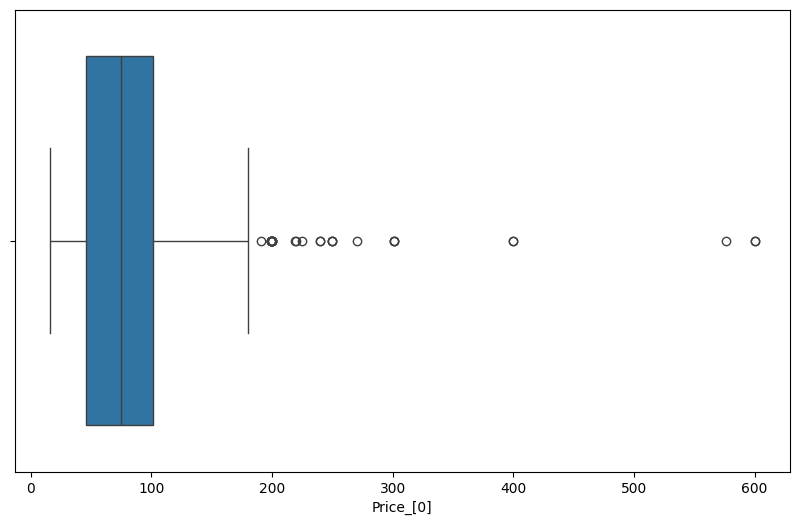

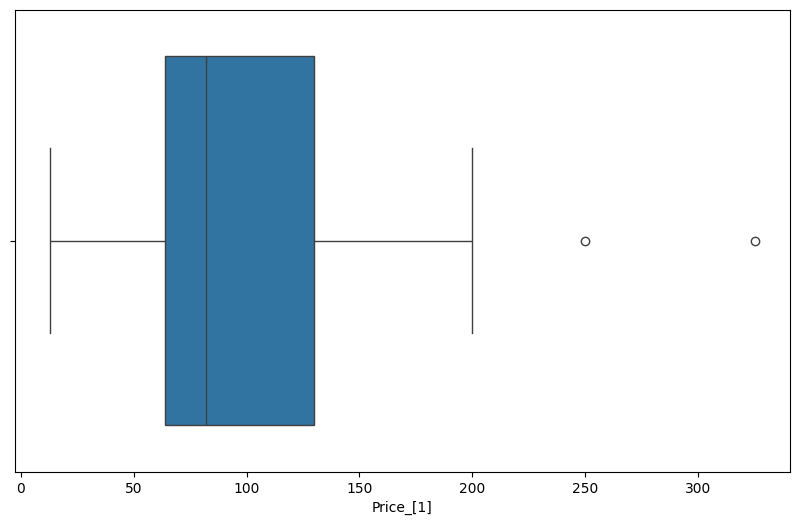

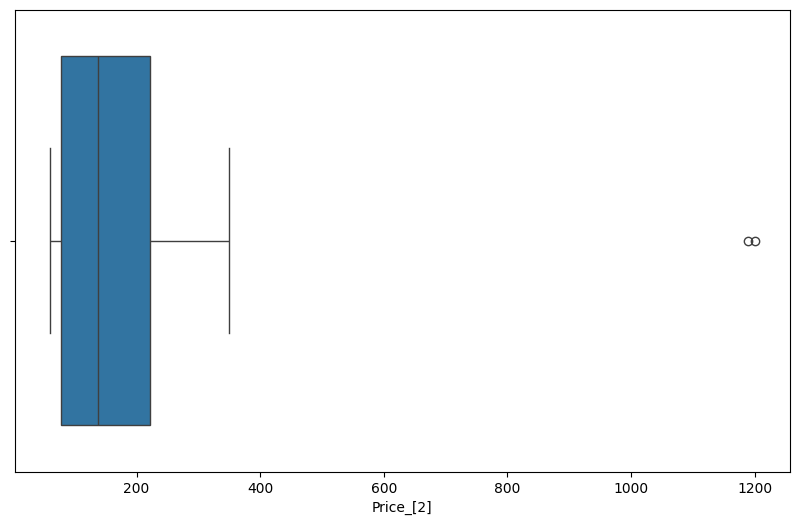

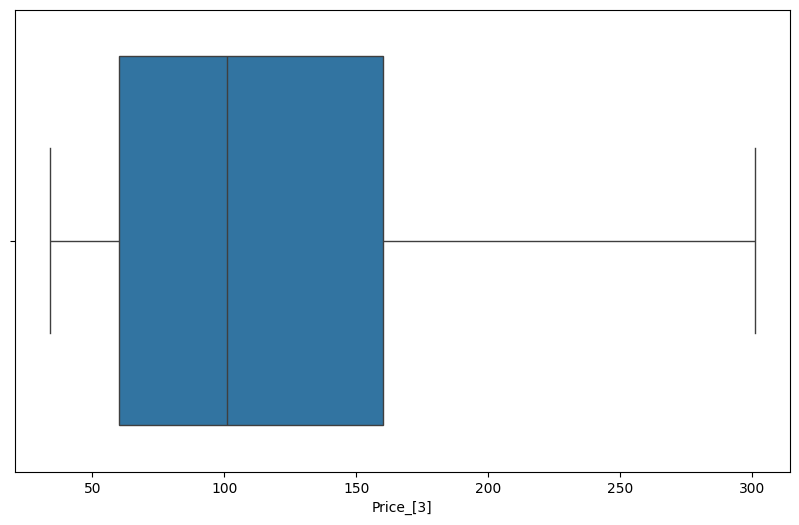

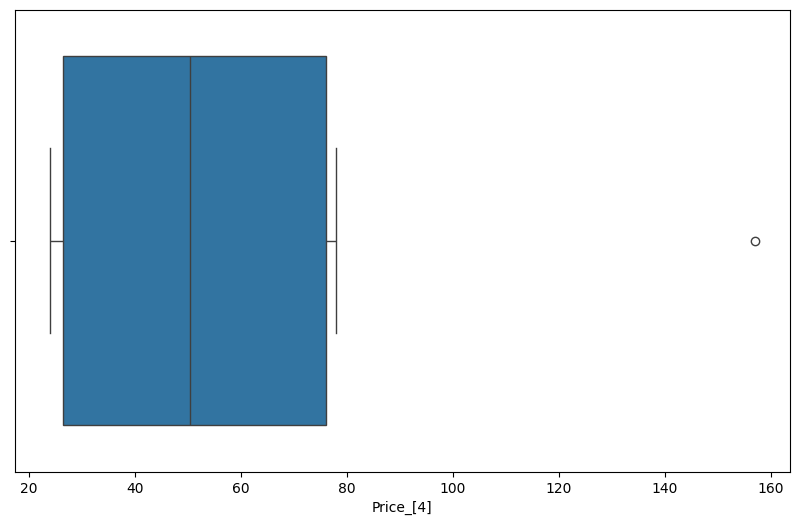

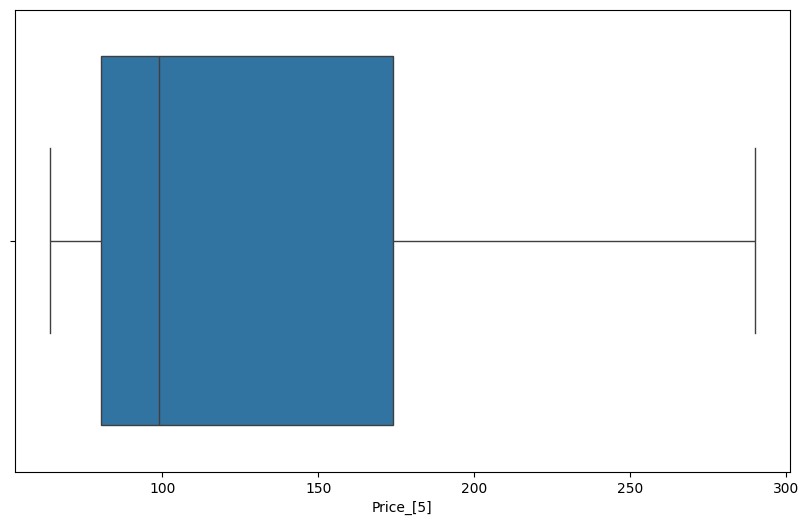

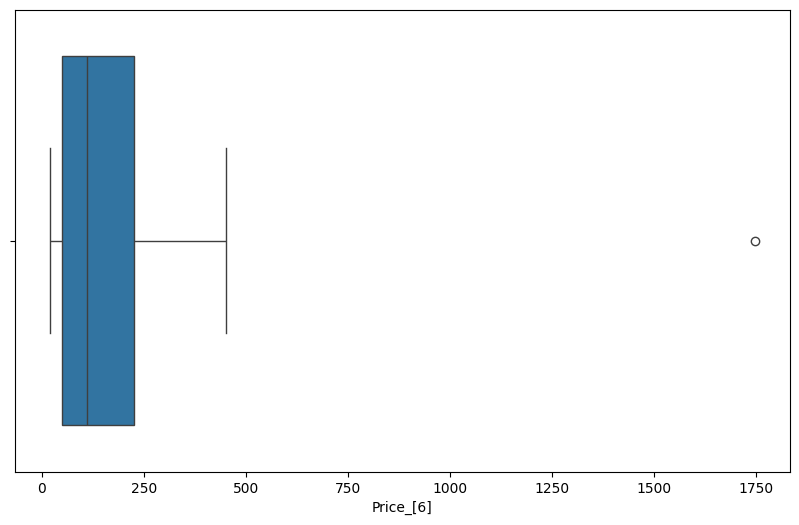

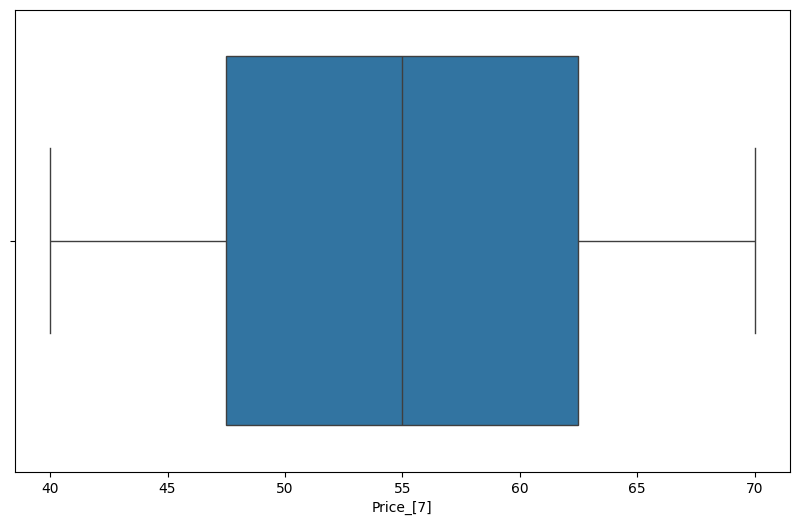

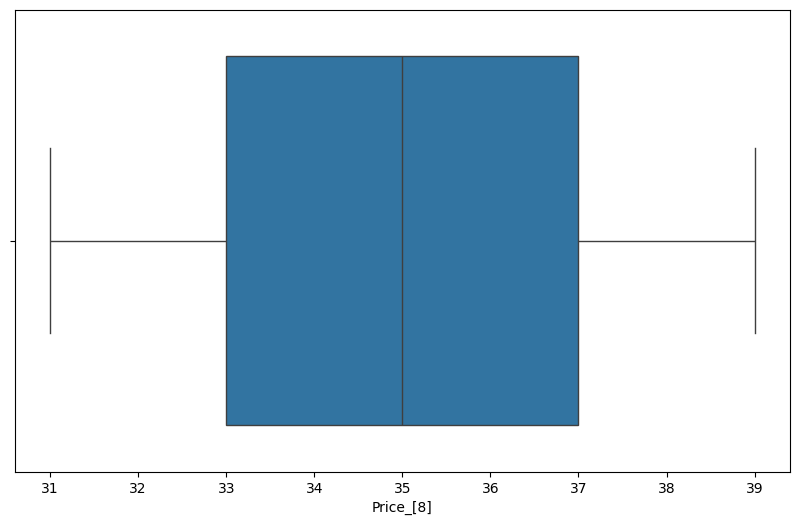

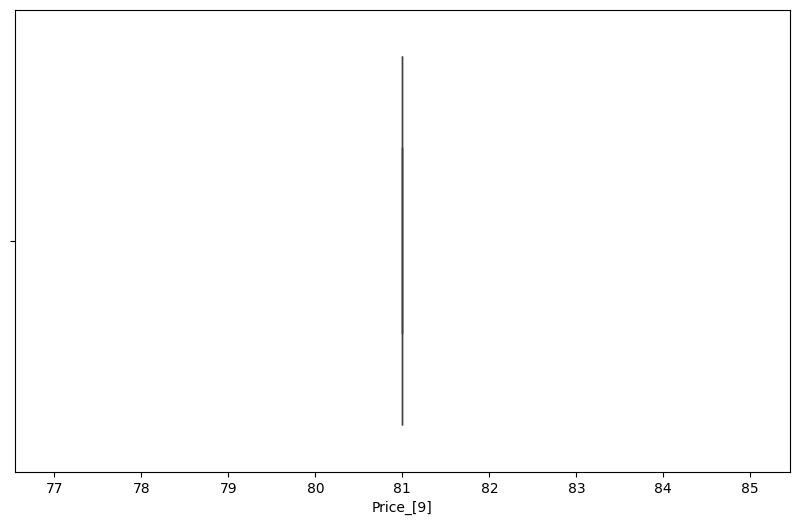

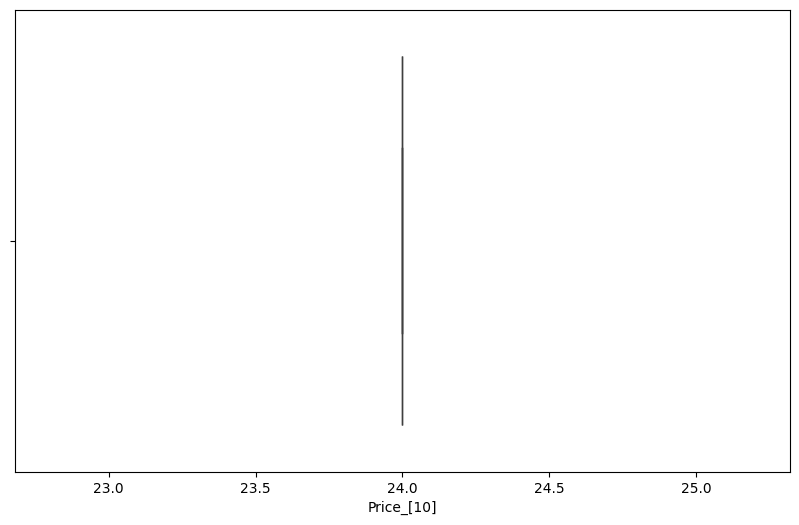

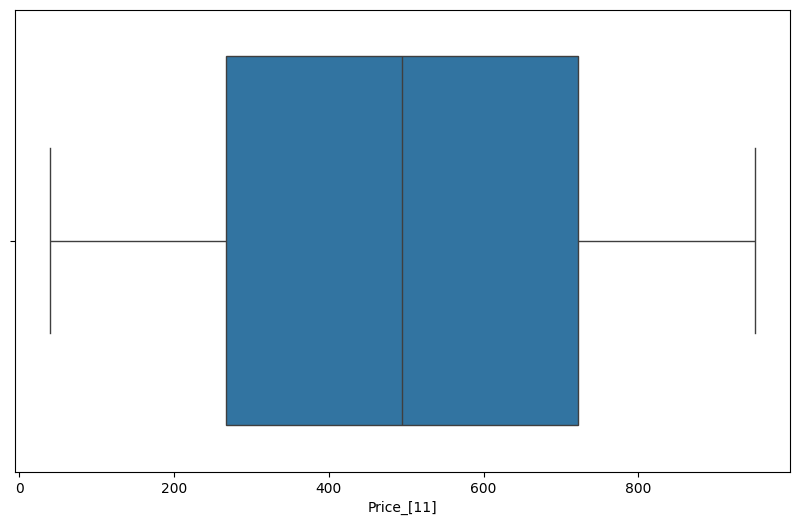

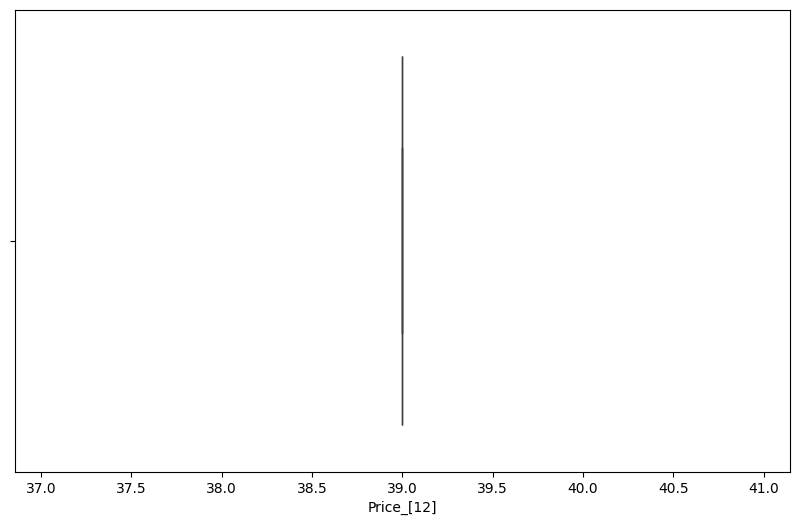

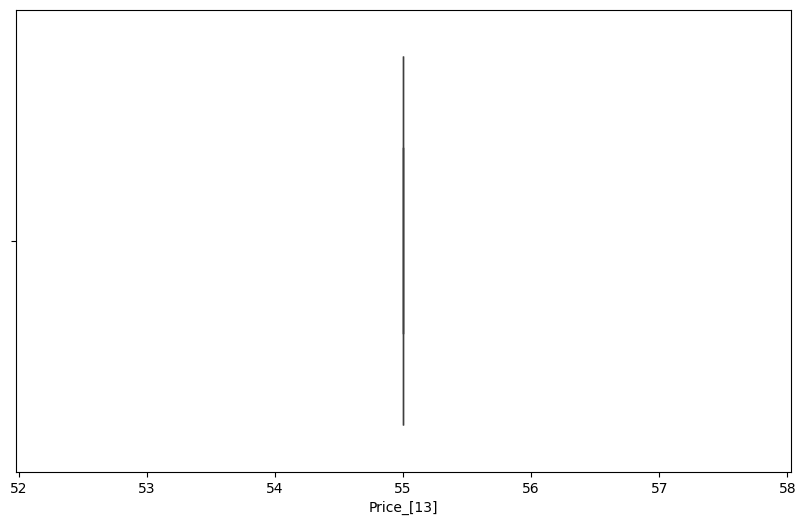

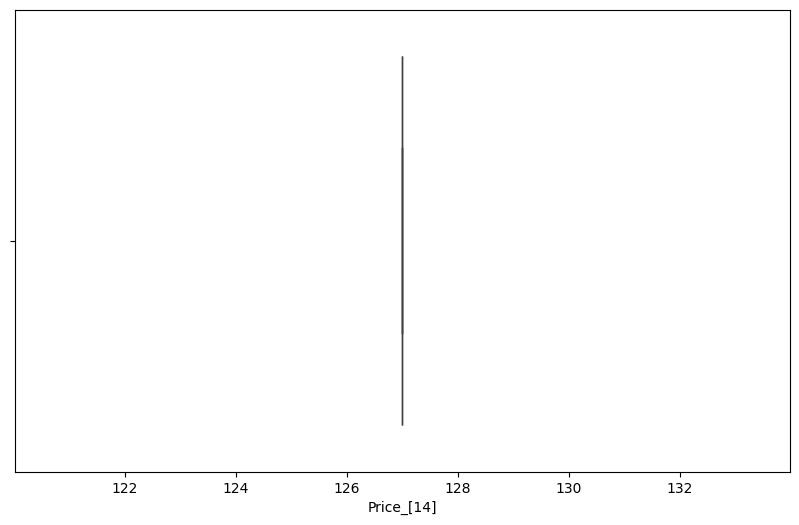

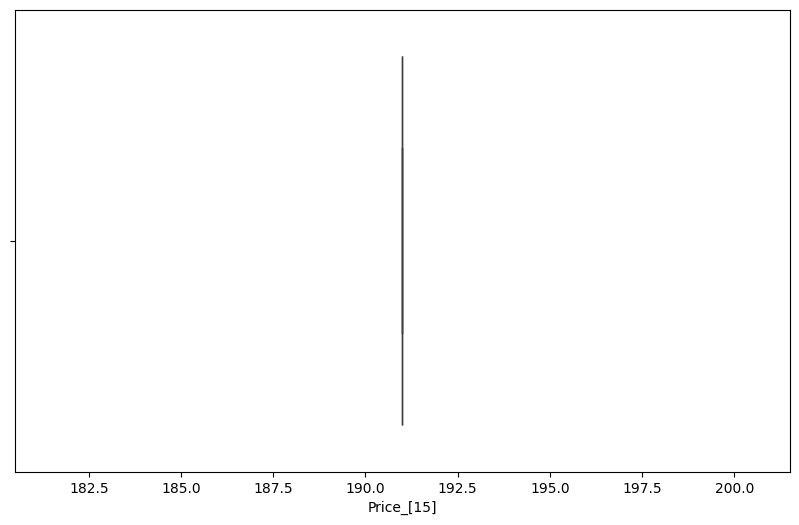

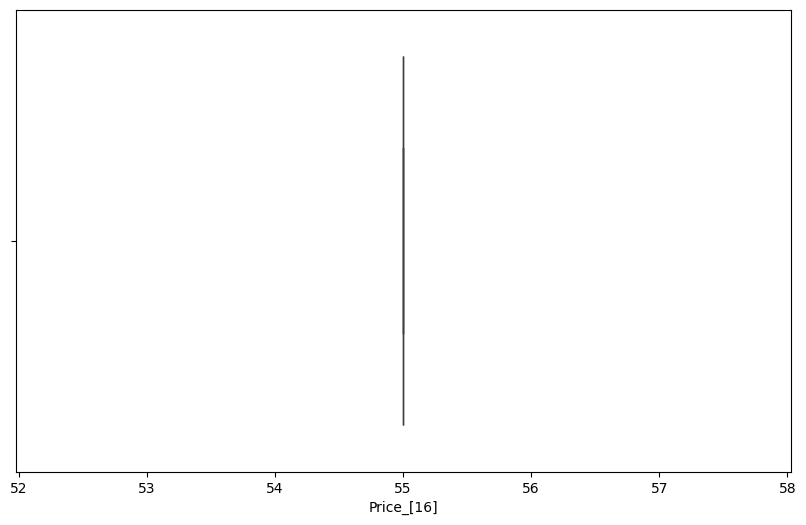

In [69]:
df_C =dataframe[(dataframe['address.country']== 'Canada')]
df_C_Prop=df_C['property_type'].unique()

df_C_out = {}
for i in range(len(df_C_Prop)):
    key = f'df_C_{i}'
    df_C_out[key] = dataframe[(dataframe['address.country'] == 'Canada') & 
                                (dataframe['property_type'] == df_C_Prop[i]) & 
                                (dataframe['price'])]

for j in range(len(df_C_out)):
    plt.figure(figsize=(10, 6))
    key = f'df_C_{j}'
    sns.boxplot(x=df_C_out[key]['price'])
    plt.xlabel(f'Price_{[j]}')
    plt.show()

In [70]:
df_C_Outlier_0 = df_C_out['df_C_0'][(df_C_out['df_C_0']['price'] > 400)]
print(df_C_Outlier_0.shape)
df_C_Outlier_2 = df_C_out['df_C_2'][(df_C_out['df_C_2']['price'] > 400)]
print(df_C_Outlier_2.shape)
df_C_Outlier_4 = df_C_out['df_C_4'][(df_C_out['df_C_4']['price'] > 100)]
print(df_C_Outlier_4.shape)
df_C_Outlier_6 = df_C_out['df_C_6'][(df_C_out['df_C_6']['price'] > 600)]
print(df_C_Outlier_6.shape)

(3, 30)
(2, 30)
(1, 30)
(1, 30)


In [71]:
dataframe.drop(df_C_Outlier_0.index, inplace=True)
dataframe.drop(df_C_Outlier_2.index, inplace=True)
dataframe.drop(df_C_Outlier_4.index, inplace=True)
dataframe.drop(df_C_Outlier_6.index, inplace=True)

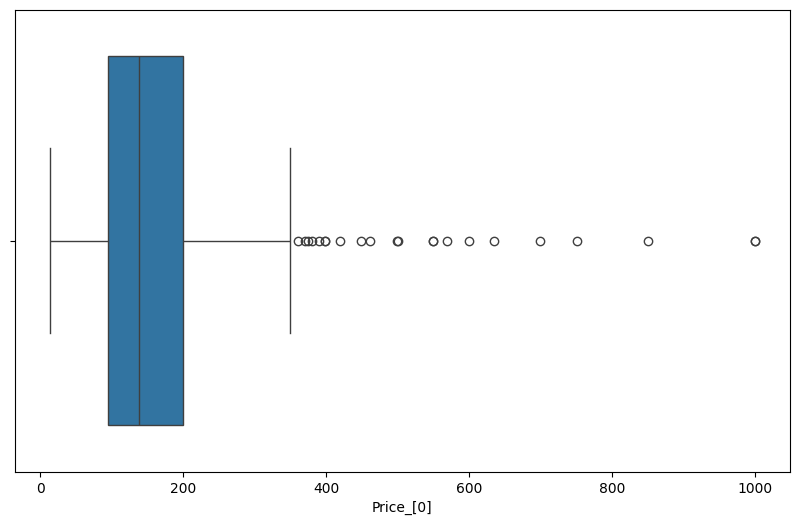

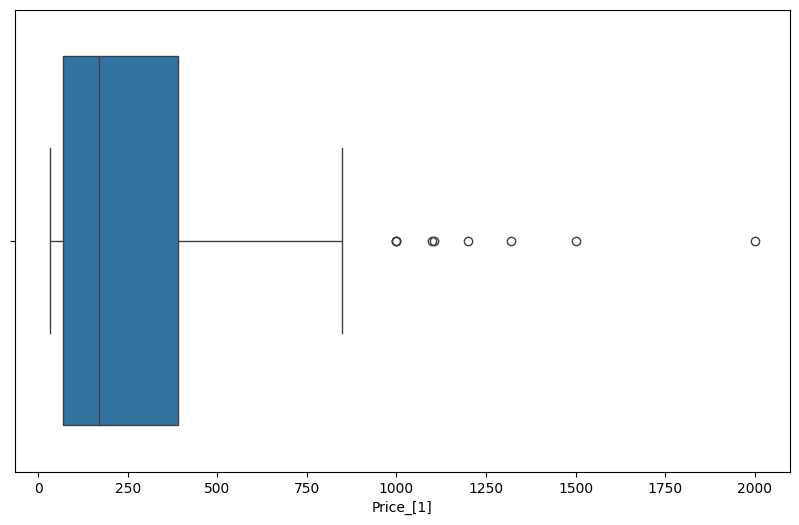

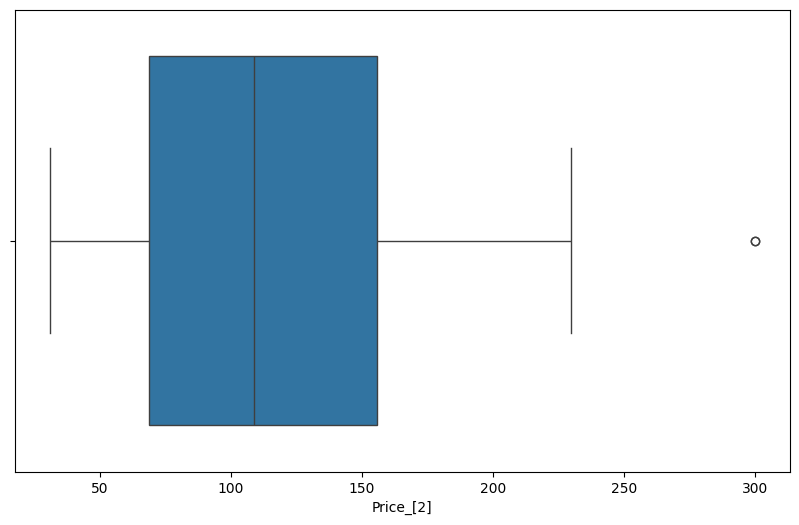

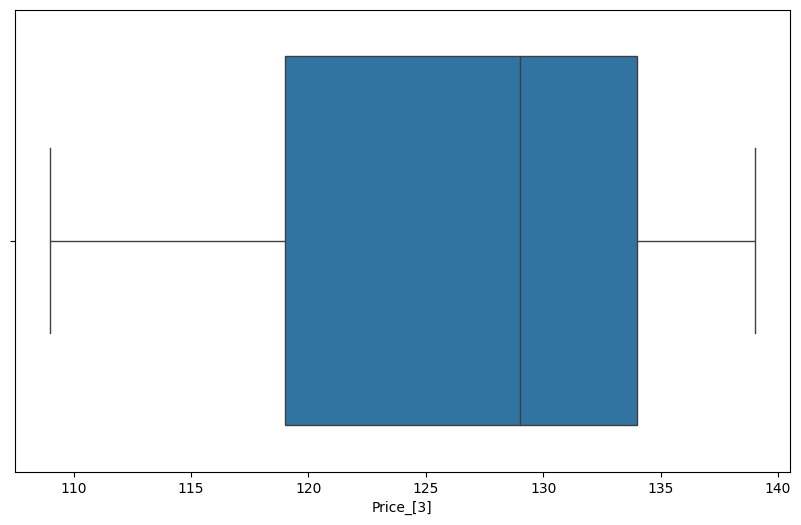

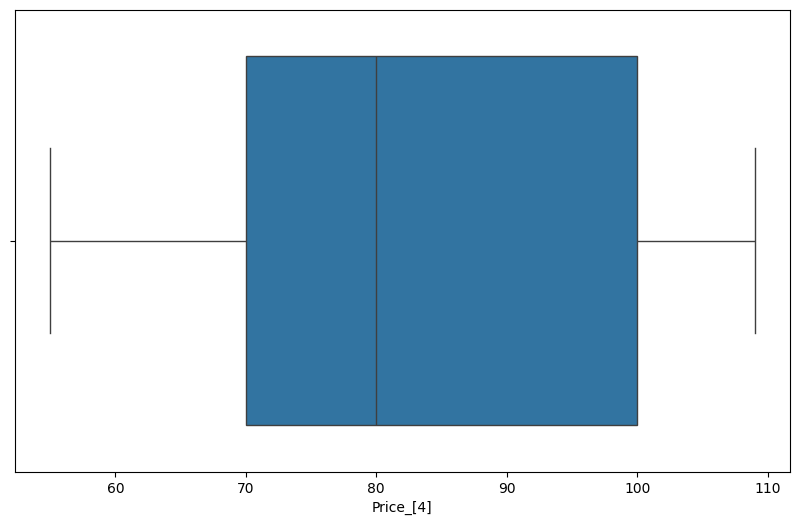

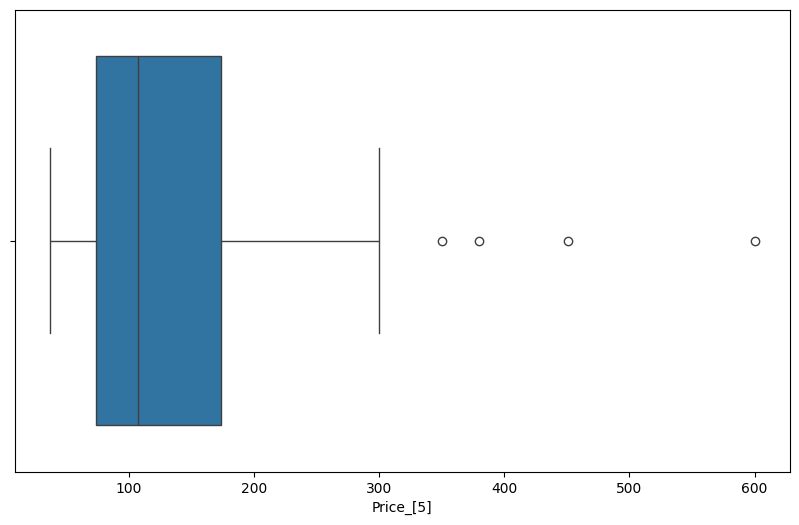

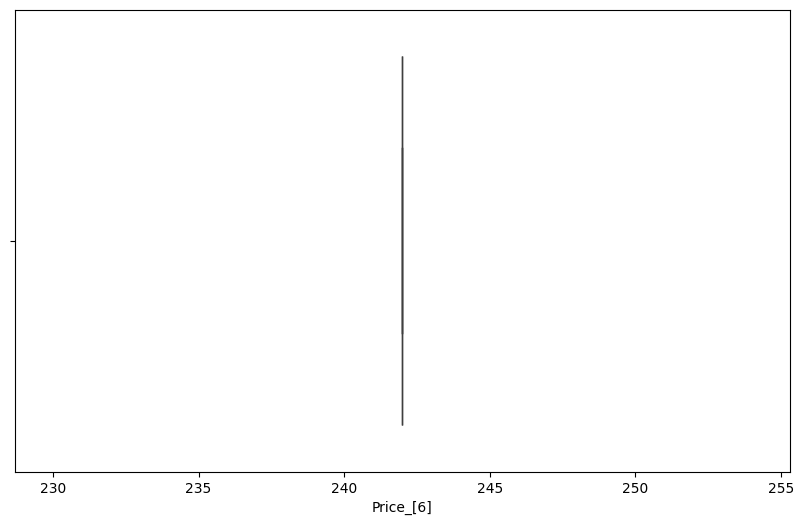

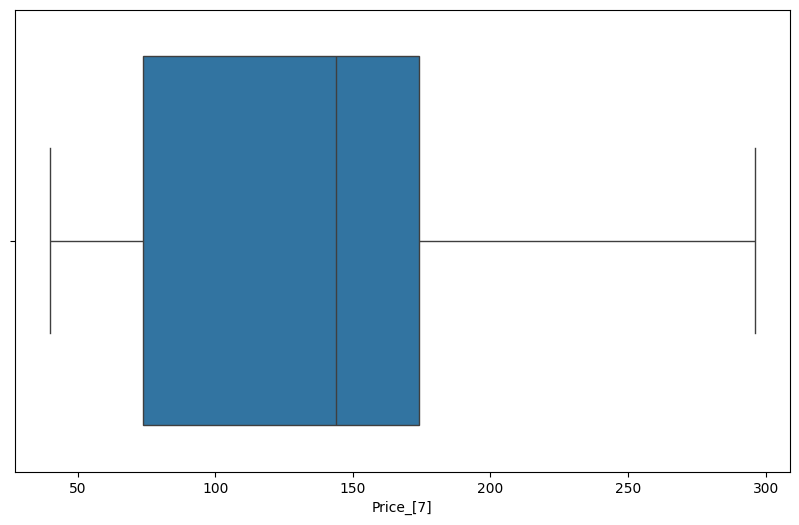

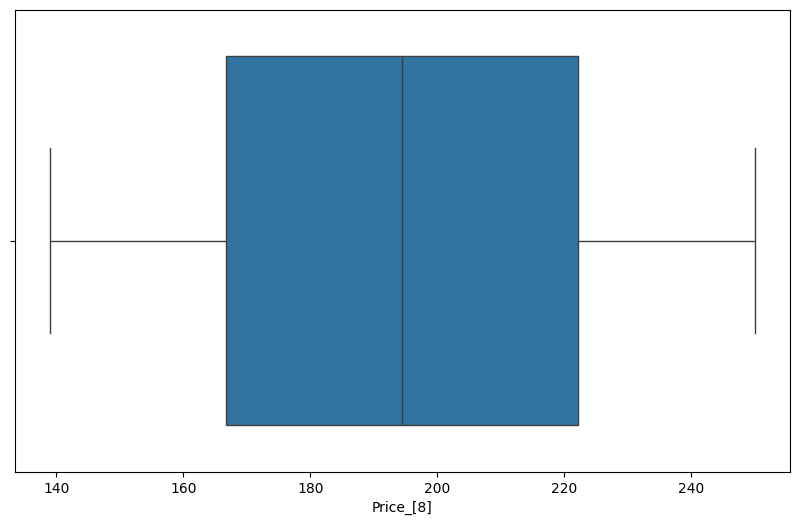

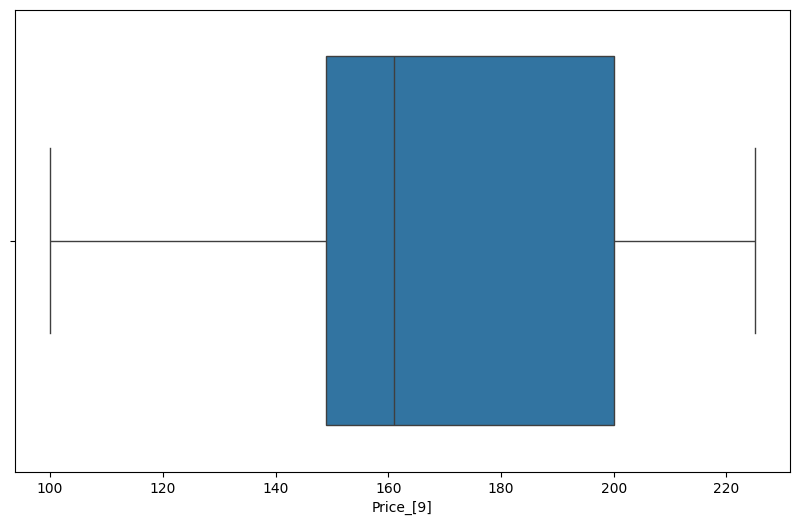

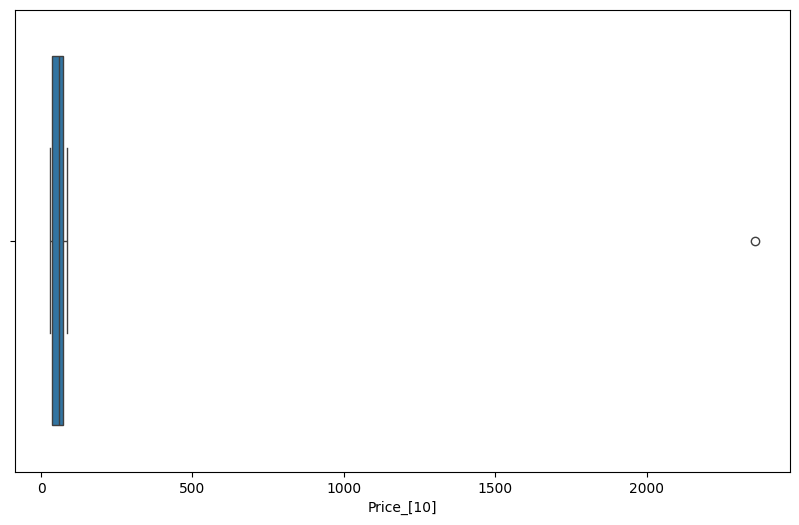

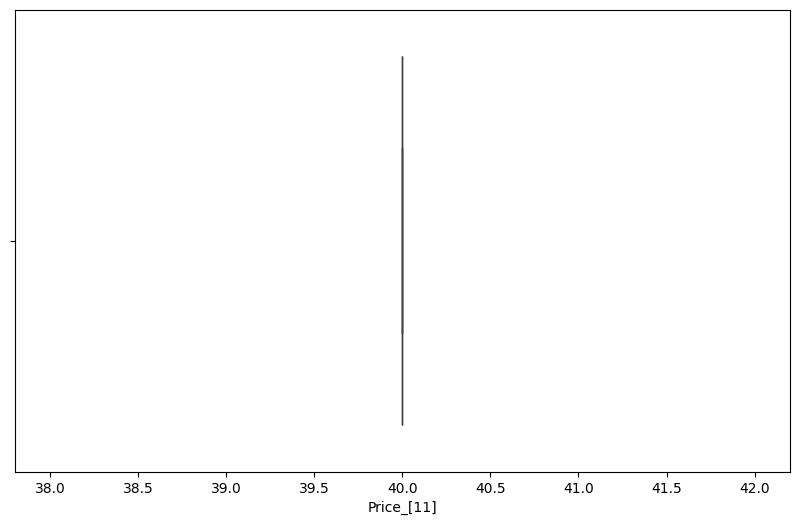

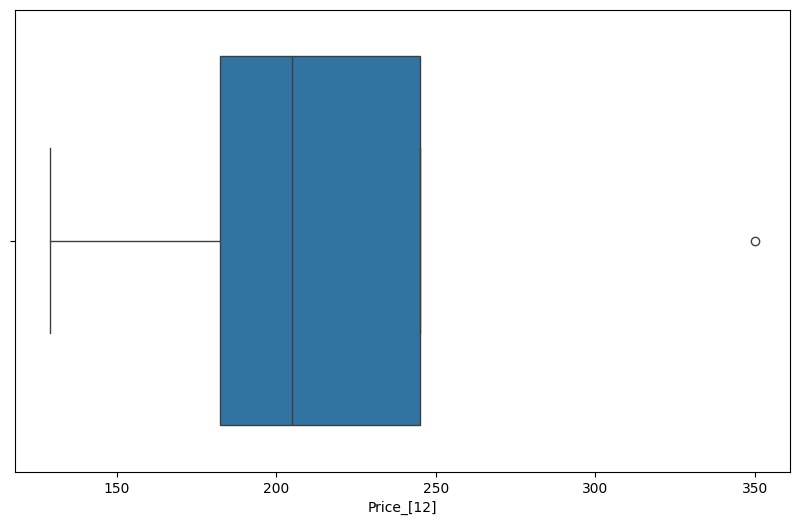

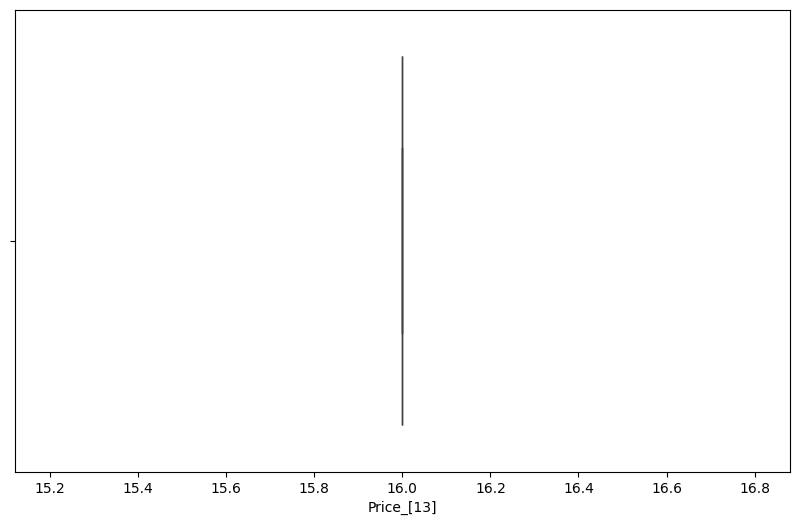

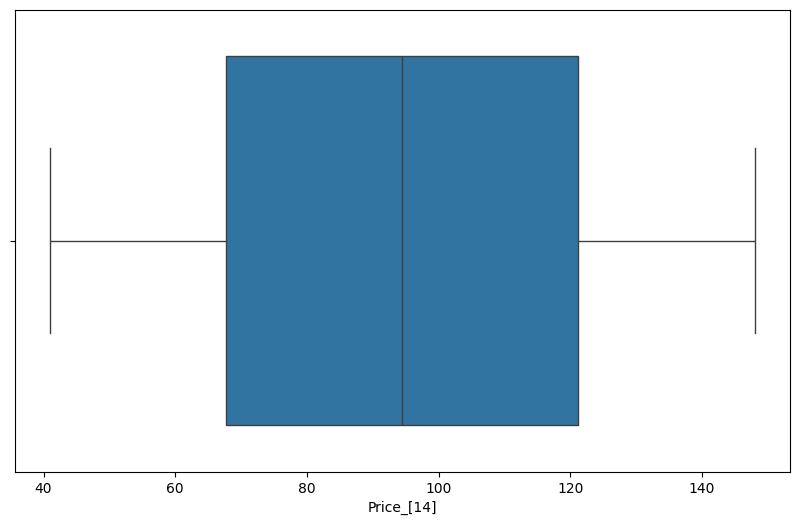

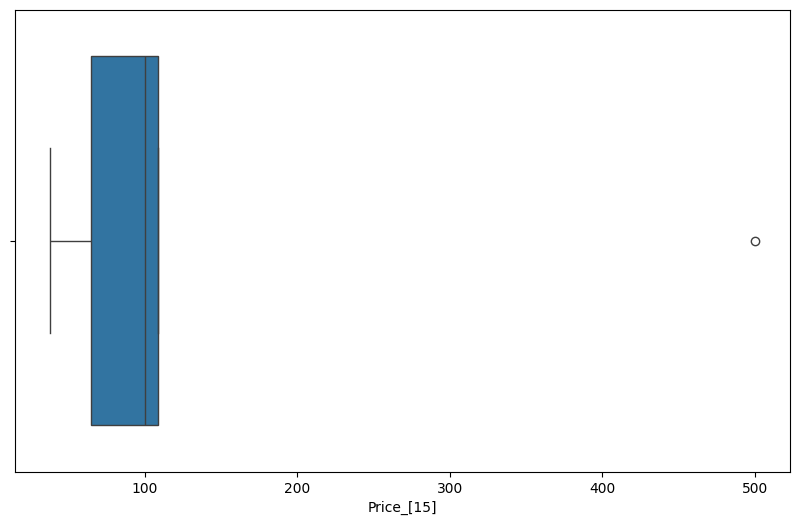

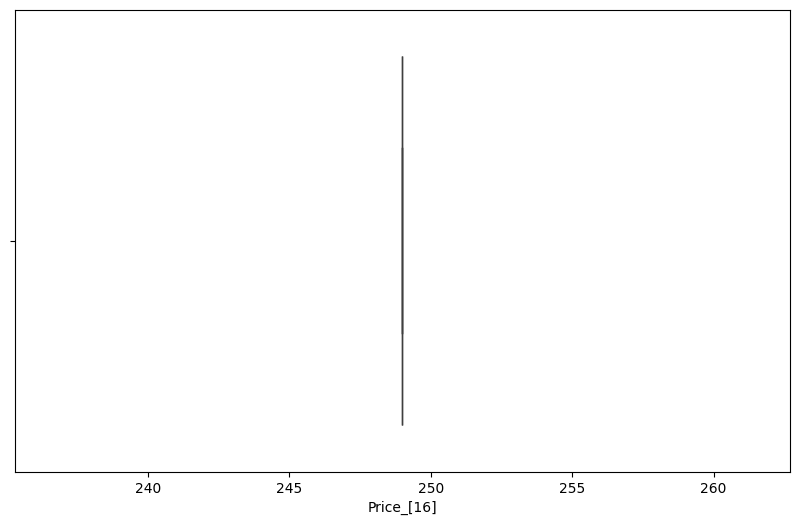

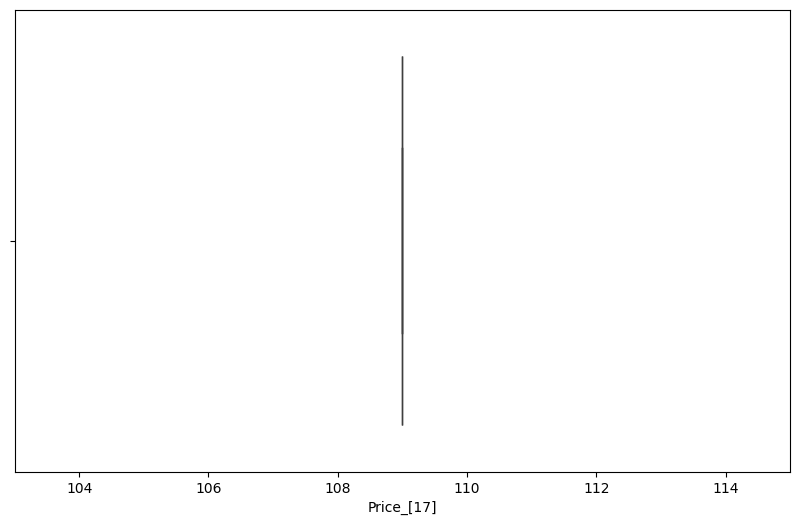

In [72]:
df_A =dataframe[(dataframe['address.country']== 'Australia')]
df_A_Prop=df_A['property_type'].unique()

df_A_out = {}
for i in range(len(df_A_Prop)):
    key = f'df_A_{i}'
    df_A_out[key] = dataframe[(dataframe['address.country'] == 'Australia') & 
                                (dataframe['property_type'] == df_A_Prop[i]) & 
                                (dataframe['price'])]

for j in range(len(df_A_out)):
    plt.figure(figsize=(10, 6))
    key = f'df_A_{j}'
    sns.boxplot(x=df_A_out[key]['price'])
    plt.xlabel(f'Price_{[j]}')
    plt.show()

In [73]:
df_A_Outlier_0 = df_A_out['df_A_0'][(df_A_out['df_A_0']['price'] > 600)]
print(df_A_Outlier_0.shape)
df_A_Outlier_1 = df_A_out['df_A_1'][(df_A_out['df_A_1']['price'] > 1250)]
print(df_A_Outlier_1.shape)
df_A_Outlier_5 = df_A_out['df_A_5'][(df_A_out['df_A_5']['price'] > 450)]
print(df_A_Outlier_5.shape)
df_A_Outlier_10 = df_A_out['df_A_10'][(df_A_out['df_A_10']['price'] > 1000)]
print(df_A_Outlier_10.shape)
df_A_Outlier_15 = df_A_out['df_A_15'][(df_A_out['df_A_15']['price'] > 300)]
print(df_A_Outlier_15.shape)

(6, 30)
(3, 30)
(2, 30)
(1, 30)
(1, 30)


In [74]:
dataframe.drop(df_A_Outlier_0.index, inplace=True)
dataframe.drop(df_A_Outlier_1.index, inplace=True)
dataframe.drop(df_A_Outlier_5.index, inplace=True)
dataframe.drop(df_A_Outlier_10.index, inplace=True)
dataframe.drop(df_A_Outlier_15.index, inplace=True)

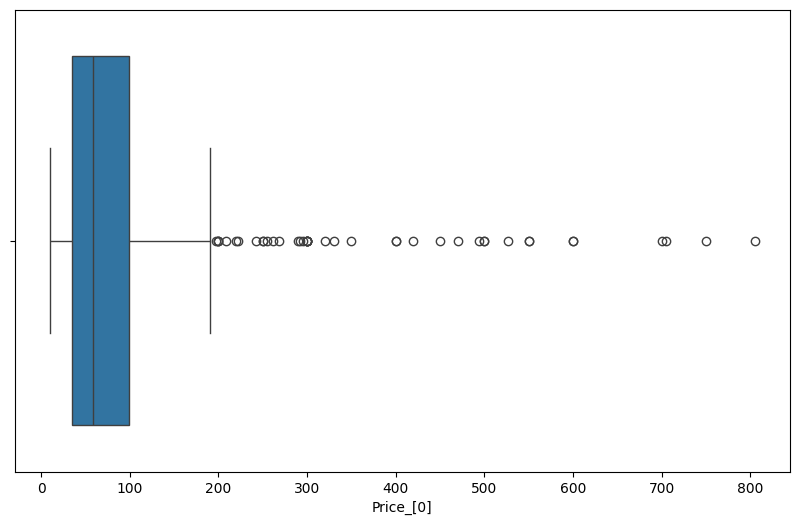

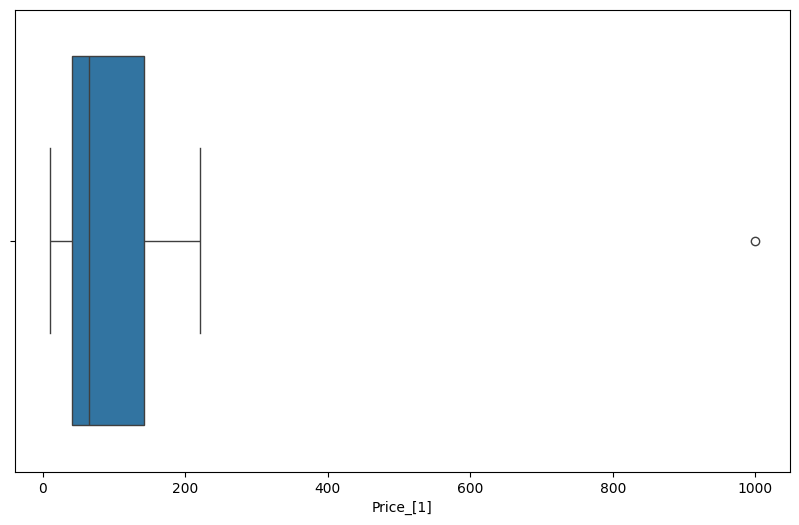

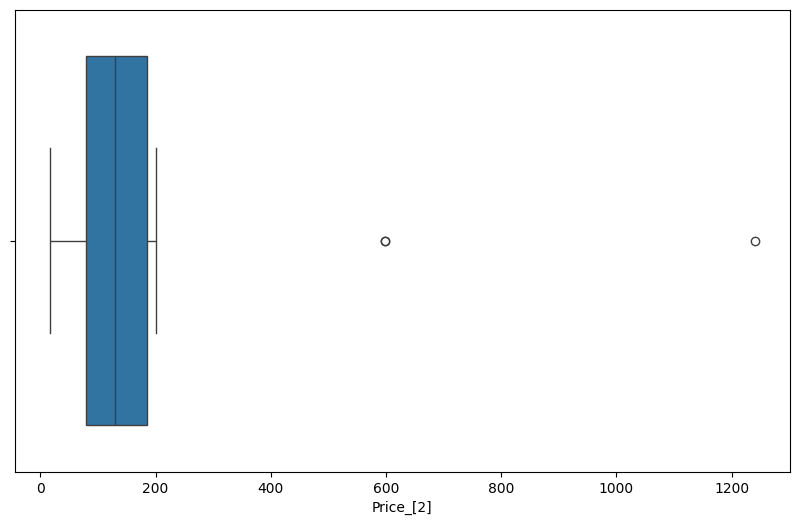

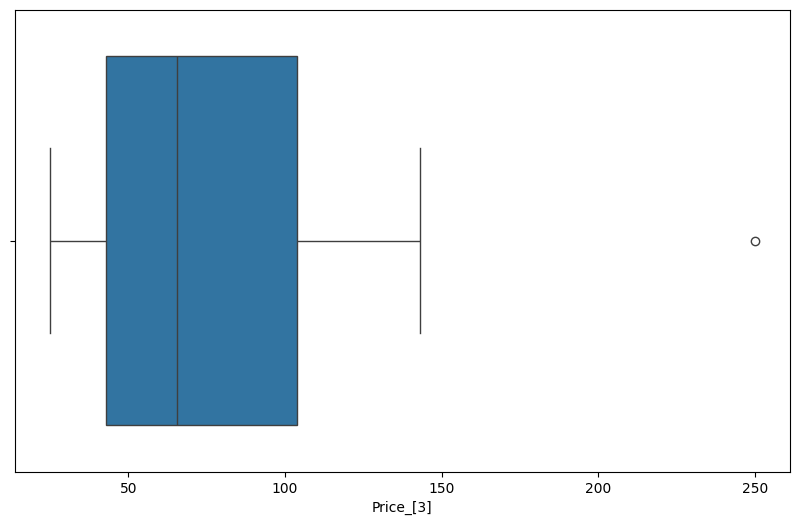

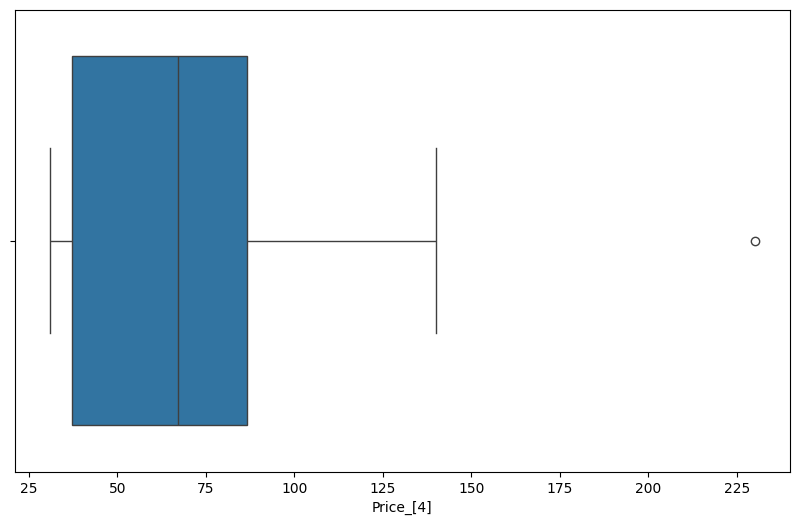

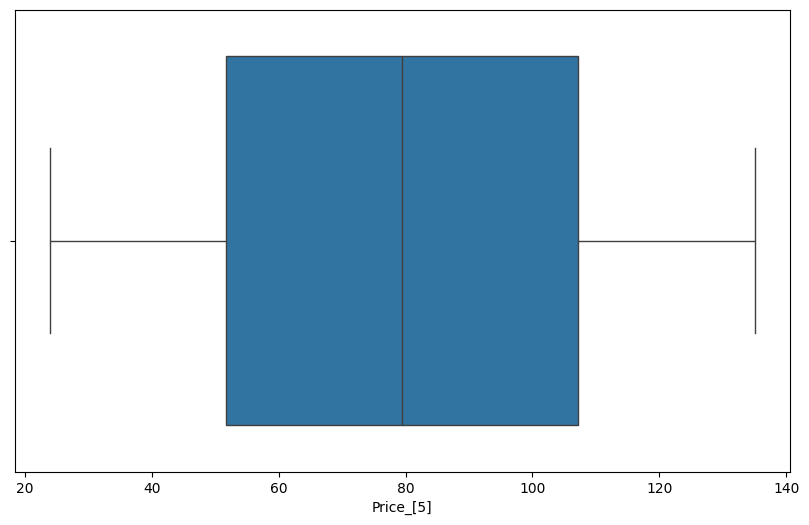

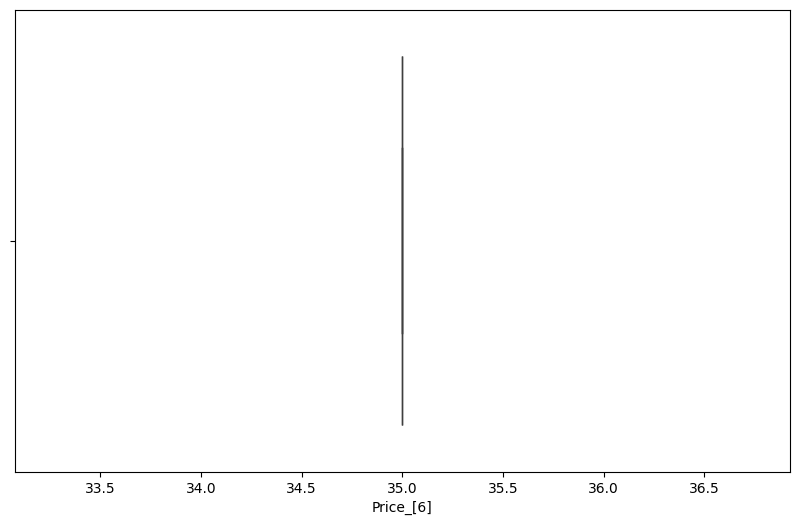

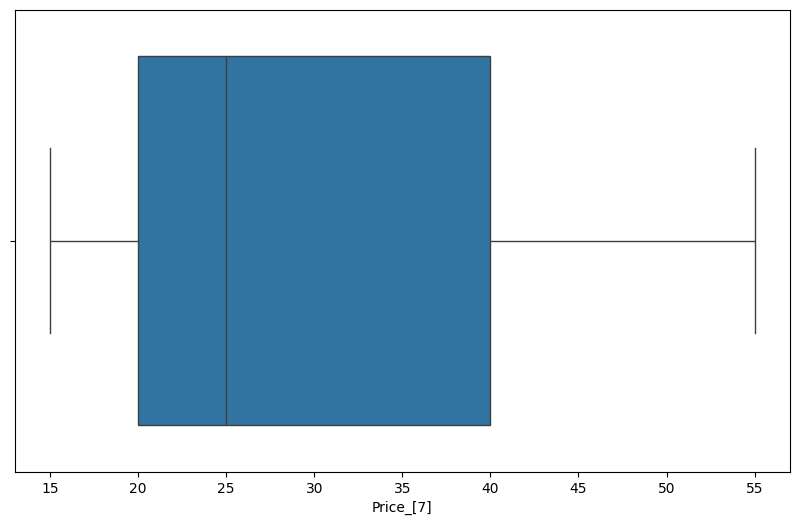

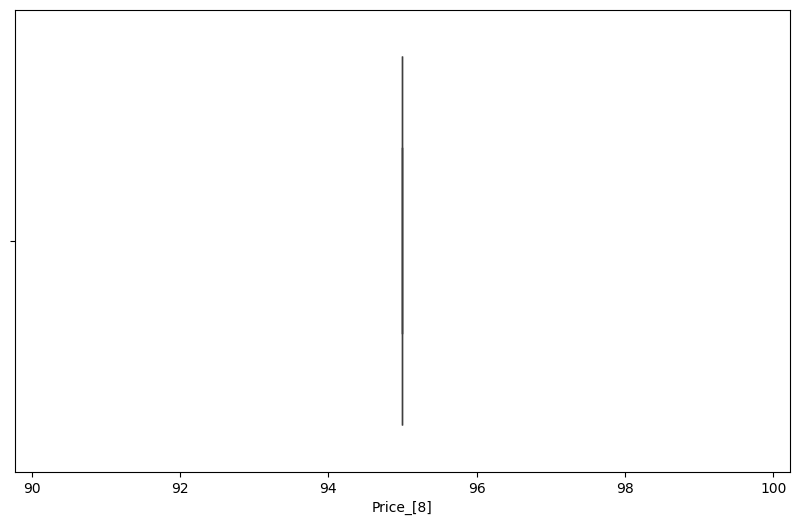

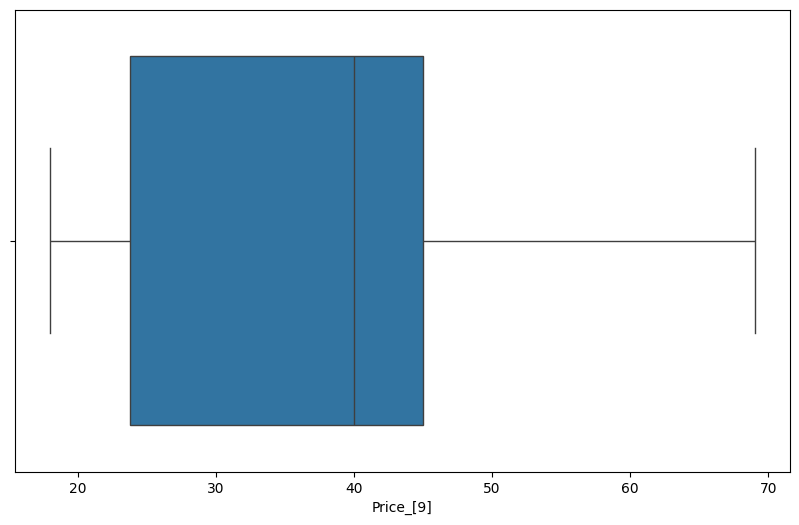

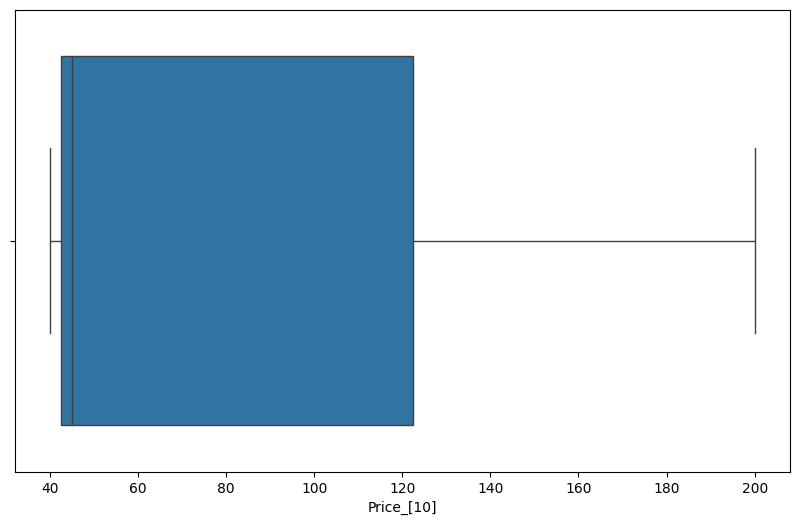

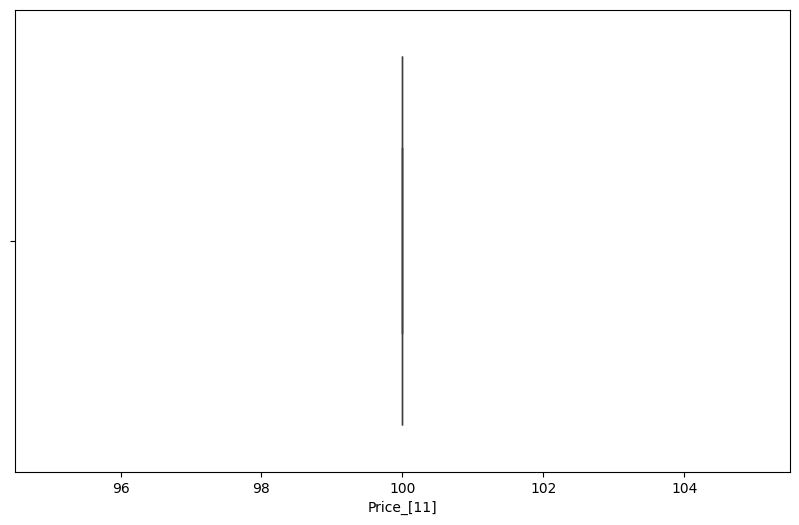

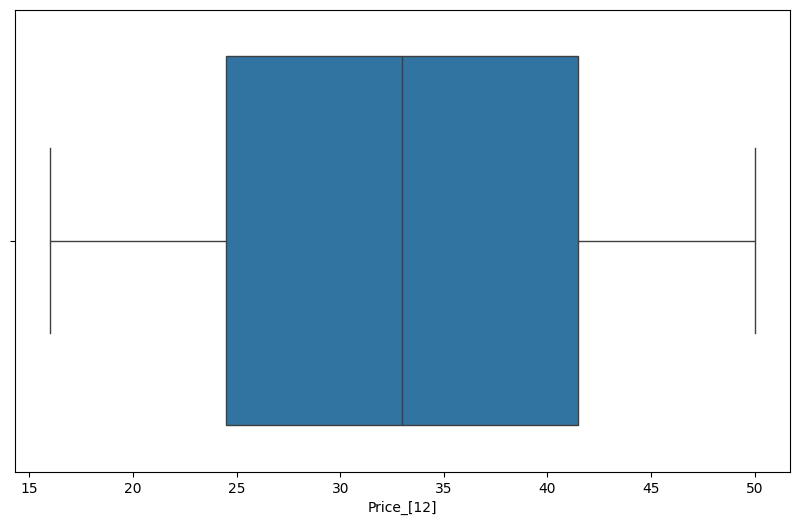

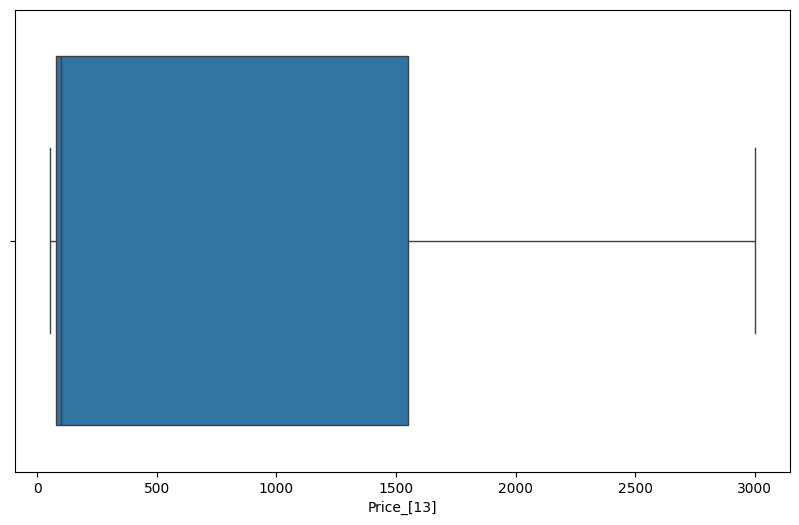

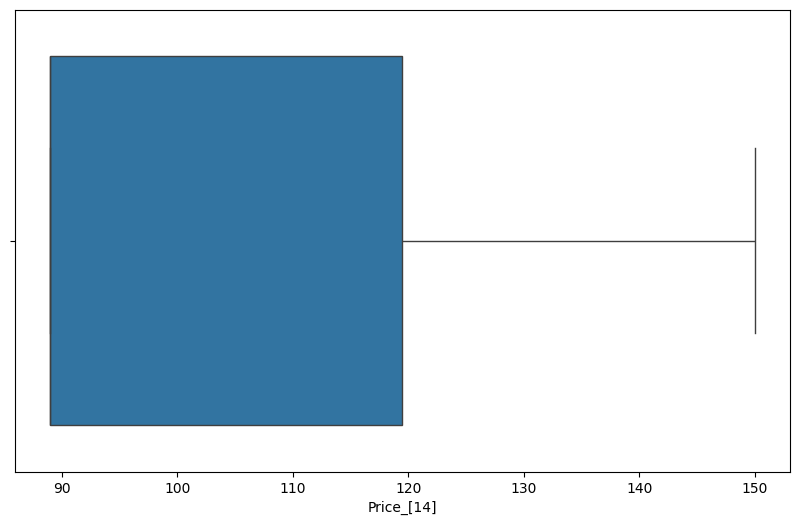

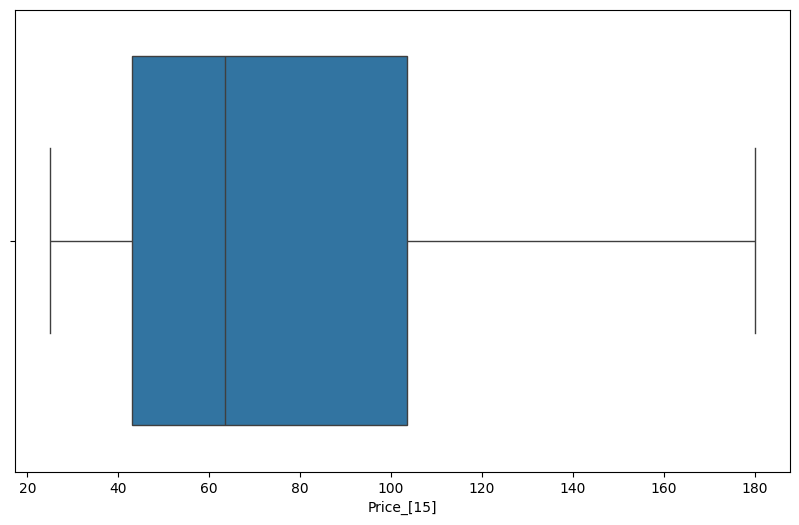

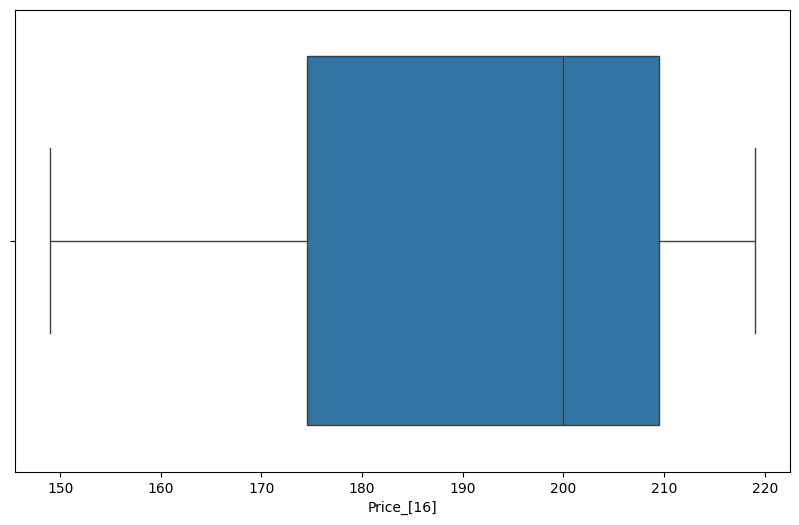

In [75]:
df_S =dataframe[(dataframe['address.country']== 'Spain')]
df_S_Prop=df_S['property_type'].unique()

df_S_out = {}
for i in range(len(df_S_Prop)):
    key = f'df_S_{i}'
    df_S_out[key] = dataframe[(dataframe['address.country'] == 'Spain') & 
                                (dataframe['property_type'] == df_S_Prop[i]) & 
                                (dataframe['price'])]

for j in range(len(df_S_out)):
    plt.figure(figsize=(10, 6))
    key = f'df_S_{j}'
    sns.boxplot(x=df_S_out[key]['price'])
    plt.xlabel(f'Price_{[j]}')
    plt.show()

In [76]:
df_S_Outlier_0 = df_S_out['df_S_0'][(df_S_out['df_S_0']['price'] > 500)]
print(df_S_Outlier_0.shape)
df_S_Outlier_1 = df_S_out['df_S_1'][(df_S_out['df_S_1']['price'] > 600)]
print(df_S_Outlier_1.shape)
df_S_Outlier_2 = df_S_out['df_S_2'][(df_S_out['df_S_2']['price'] > 500)]
print(df_S_Outlier_2.shape)


(9, 30)
(1, 30)
(3, 30)


In [77]:
dataframe.drop(df_S_Outlier_0.index, inplace=True)
dataframe.drop(df_S_Outlier_1.index, inplace=True)
dataframe.drop(df_S_Outlier_2.index, inplace=True)

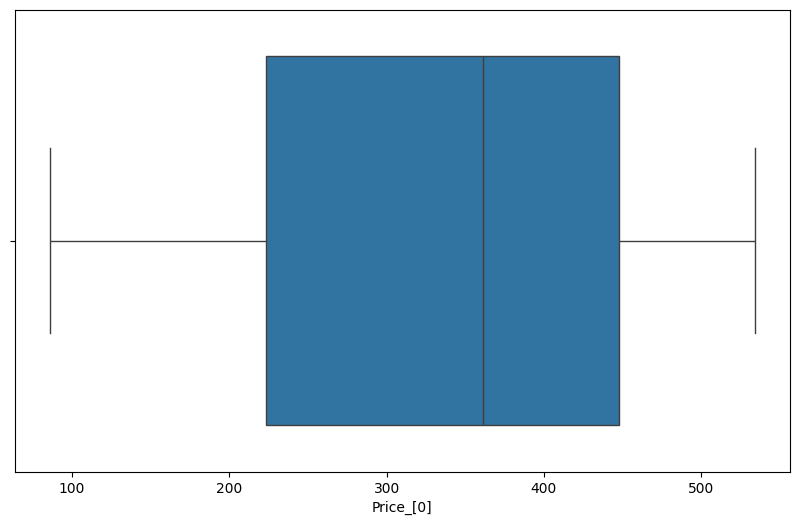

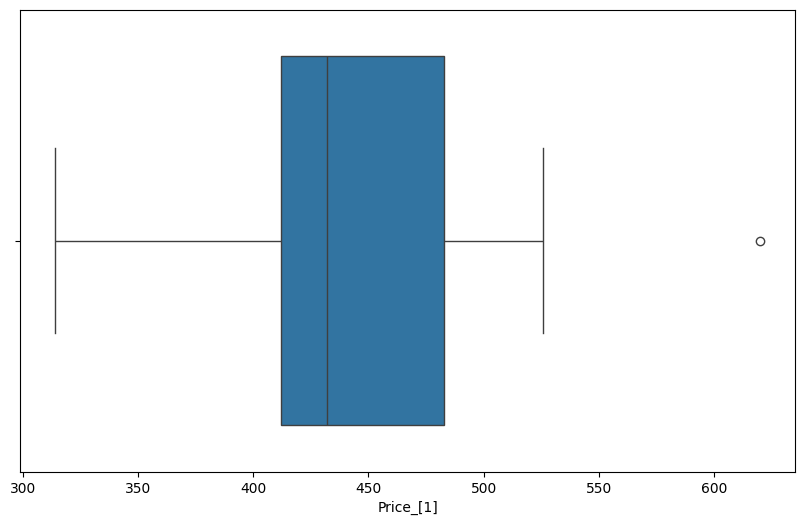

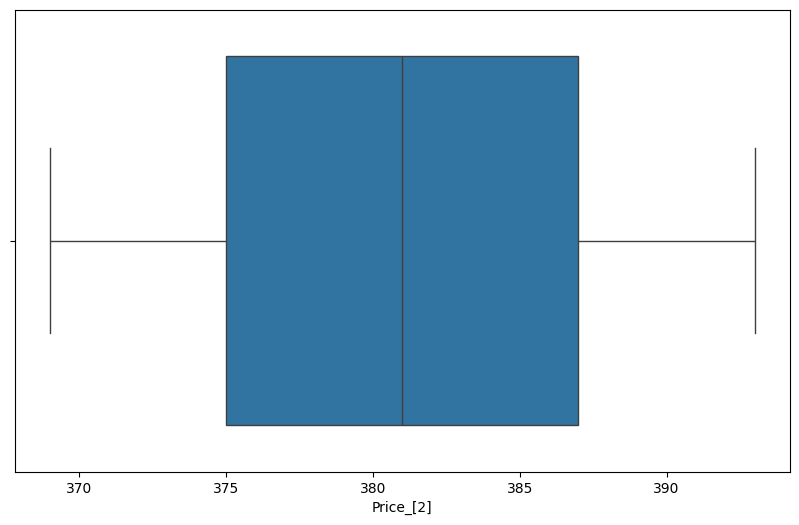

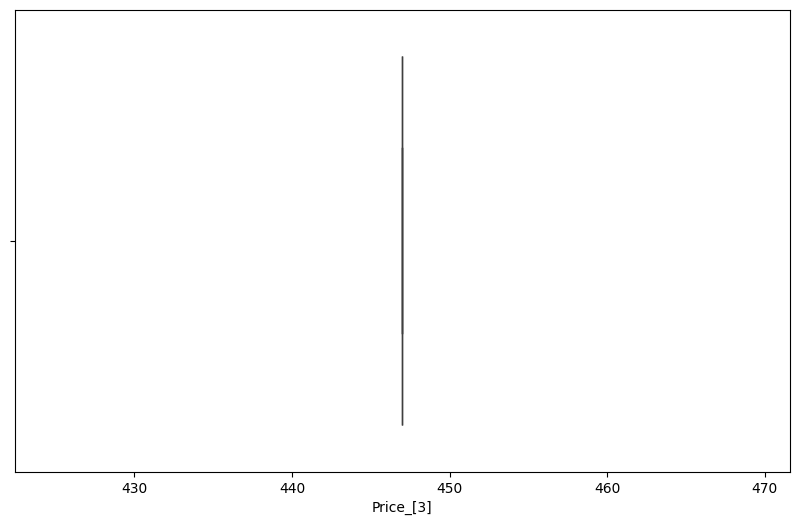

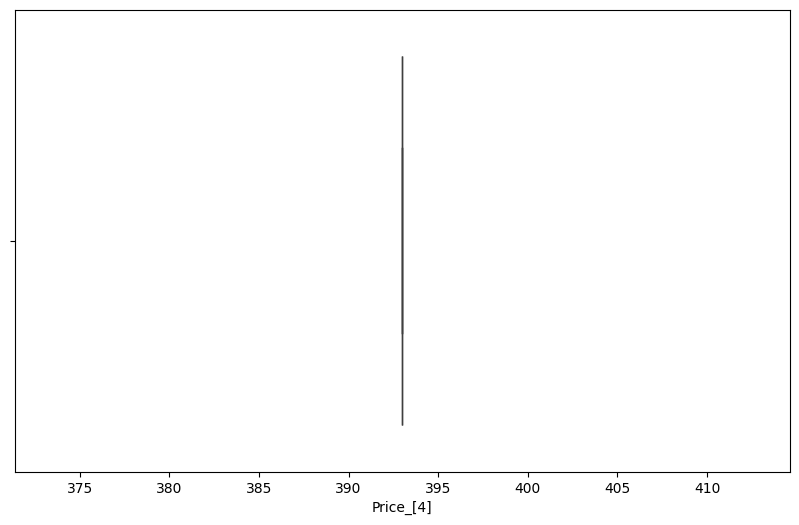

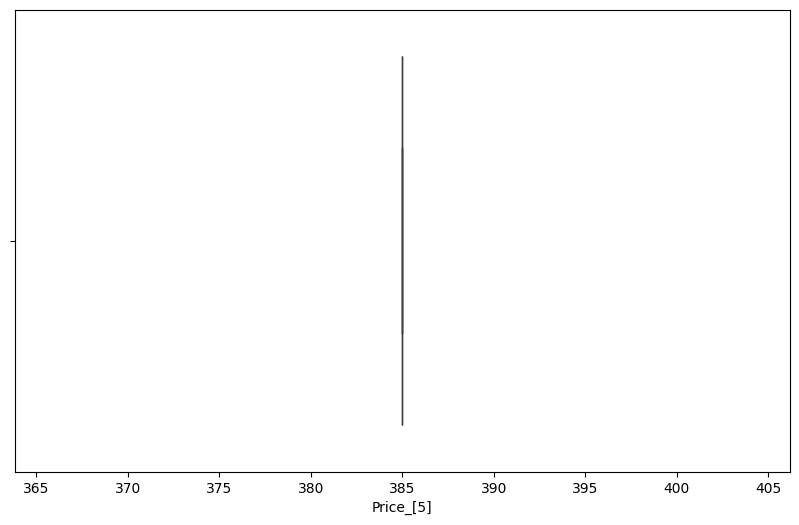

In [78]:
df_CH =dataframe[(dataframe['address.country']== 'China')]
df_CH_Prop=df_CH['property_type'].unique()

df_CH_out = {}
for i in range(len(df_CH_Prop)):
    key = f'df_CH_{i}'
    df_CH_out[key] = dataframe[(dataframe['address.country'] == 'China') & 
                                (dataframe['property_type'] == df_CH_Prop[i]) & 
                                (dataframe['price'])]

for j in range(len(df_CH_out)):
    plt.figure(figsize=(10, 6))
    key = f'df_CH_{j}'
    sns.boxplot(x=df_CH_out[key]['price'])
    plt.xlabel(f'Price_{[j]}')
    plt.show()

In [79]:
df_CH_Outlier_1 = df_CH_out['df_CH_1'][(df_CH_out['df_CH_1']['price'] > 550)]
print(df_CH_Outlier_1.shape)

(1, 30)


In [80]:
dataframe.drop(df_CH_Outlier_1.index, inplace=True)


In [81]:
dataframe.shape

(4861, 30)

In [82]:
dataframe['latitude'] = dataframe['address.location.coordinates'].apply( lambda x: x[1])
dataframe['longitude'] = dataframe['address.location.coordinates'].apply( lambda x: x[0])

In [83]:
dataframe.drop(columns=['address.location.coordinates'],axis=1, inplace= True)

In [84]:
dataframe['latitude']

0       40.799620
1       41.006200
2       22.281580
3       22.331400
5       41.154300
          ...    
5550    40.985630
5551    20.858940
5552    22.291570
5553   -33.892980
5554   -22.908336
Name: latitude, Length: 4861, dtype: float64

In [85]:
dataframe['longitude']

0       -73.965230
1        28.980090
2       114.150270
3       114.166900
5        -8.608670
           ...    
5550     29.030790
5551   -156.667520
5552    114.207220
5553    151.265420
5554    -43.173761
Name: longitude, Length: 4861, dtype: float64

In [86]:
dataframe.describe()


,accommodates,bedrooms,beds,number_of_reviews,bathrooms,price,cleaning_fee,guests_included,availability.availability_30,availability.availability_60,availability.availability_90,availability.availability_365,review_scores.review_scores_rating,latitude,longitude
count,4861.000000,4861.000000,4861.000000,4861.000000,4861.000000,4861.000000,4861.000000,4861.000000,4861.000000,4861.000000,4861.000000,4861.000000,4861.000000,4861.000000,4861.000000
mean,3.522321,1.511417,2.097511,27.178153,1.287184,225.140506,67.342111,1.767538,11.799424,26.367414,42.606254,172.421518,68.834602,22.045436,-6.868475
std,2.239692,0.918782,1.570679,48.805615,0.644874,292.181880,100.619761,1.459700,11.714131,23.519460,35.267987,139.965148,41.614281,28.392450,89.444899
min,1.000000,1.000000,1.000000,0.000000,0.500000,9.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-34.088290,-159.678690
25%,2.000000,1.000000,1.000000,1.000000,1.000000,67.000000,0.000000,1.000000,0.000000,0.000000,0.000000,15.000000,0.000000,20.690550,-73.596050
50%,3.000000,1.000000,2.000000,5.000000,1.000000,124.000000,30.000000,1.000000,8.000000,23.000000,43.000000,171.000000,92.000000,40.737320,-8.611420
75%,4.000000,2.000000,3.000000,32.000000,1.000000,251.000000,100.000000,2.000000,24.000000,52.000000,80.000000,317.000000,98.000000,41.192500,29.003680
max,16.000000,20.000000,25.000000,469.000000,16.000000,3000.000000,2000.000000,16.000000,30.000000,60.000000,90.000000,365.000000,100.000000,45.665630,151.338980


In [94]:
dataframe[dataframe["price"] == 9]


,_id,name,description,property_type,room_type,accommodates,minimum_nights,maximum_nights,bedrooms,beds,number_of_reviews,bathrooms,amenities,price,cleaning_fee,guests_included,reviews,host.host_id,host.host_name,host.host_neighbourhood,address.market,address.country,address.country_code,address.location.type,availability.availability_30,availability.availability_60,availability.availability_90,availability.availability_365,review_scores.review_scores_rating,latitude,longitude
3943,30310595,Happy People Plaza España Suite 2/4 People,Happy People – Plaza España These apartments h...,Casa particular (Cuba),Entire home/apt,4,1,1125,2.0,3.0,0,1.0,"[Internet, Air conditioning, Pets allowed, Ele...",3000.0,50.0,4.0,[],214259838,Happy People,,Barcelona,Spain,ES,Point,15,15,15,81,0.0,41.37468,2.1397


In [96]:
dataframe.drop(dataframe[dataframe["price"] == 9].index, inplace= True)

In [97]:
dataframe[dataframe["price"] == 3000]

,_id,name,description,property_type,room_type,accommodates,minimum_nights,maximum_nights,bedrooms,beds,number_of_reviews,bathrooms,amenities,price,cleaning_fee,guests_included,reviews,host.host_id,host.host_name,host.host_neighbourhood,address.market,address.country,address.country_code,address.location.type,availability.availability_30,availability.availability_60,availability.availability_90,availability.availability_365,review_scores.review_scores_rating,latitude,longitude
3943,30310595,Happy People Plaza España Suite 2/4 People,Happy People – Plaza España These apartments h...,Casa particular (Cuba),Entire home/apt,4,1,1125,2.0,3.0,0,1.0,"[Internet, Air conditioning, Pets allowed, Ele...",3000.0,50.0,4.0,[],214259838,Happy People,,Barcelona,Spain,ES,Point,15,15,15,81,0.0,41.37468,2.1397


In [98]:
dataframe.describe()

,accommodates,bedrooms,beds,number_of_reviews,bathrooms,price,cleaning_fee,guests_included,availability.availability_30,availability.availability_60,availability.availability_90,availability.availability_365,review_scores.review_scores_rating,latitude,longitude
count,4860.00000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000
mean,3.52284,1.511523,2.097737,27.183333,1.287243,225.184979,67.355967,1.767695,11.801852,26.372840,42.609671,172.395062,68.828189,22.041506,-6.868128
std,2.23963,0.918847,1.570762,48.809300,0.644927,292.195489,100.625476,1.459809,11.714113,23.518837,35.270812,139.967394,41.616161,28.394049,89.454099
min,1.00000,1.000000,1.000000,0.000000,0.500000,10.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-34.088290,-159.678690
25%,2.00000,1.000000,1.000000,1.000000,1.000000,67.000000,0.000000,1.000000,0.000000,0.000000,0.000000,15.000000,0.000000,20.690283,-73.596130
50%,3.00000,1.000000,2.000000,5.000000,1.000000,124.000000,30.000000,1.000000,8.000000,23.000000,43.000000,171.000000,92.000000,40.737230,-8.611420
75%,4.00000,2.000000,3.000000,32.000000,1.000000,251.500000,100.000000,2.000000,24.000000,52.000000,80.000000,317.000000,98.000000,41.192858,29.003785
max,16.00000,20.000000,25.000000,469.000000,16.000000,3000.000000,2000.000000,16.000000,30.000000,60.000000,90.000000,365.000000,100.000000,45.665630,151.338980


In [99]:
dataframe.to_csv(r"C:\\Users\\HP USER\\Documents\\Guvi\\Project\\03_Airbnb\\airbnb_without_outlier_treatment.csv", index=False)

In [100]:
dataframe.isnull().sum()

_id                                   0
name                                  0
description                           0
property_type                         0
room_type                             0
accommodates                          0
minimum_nights                        0
maximum_nights                        0
bedrooms                              0
beds                                  0
number_of_reviews                     0
bathrooms                             0
amenities                             0
price                                 0
cleaning_fee                          0
guests_included                       0
reviews                               0
host.host_id                          0
host.host_name                        0
host.host_neighbourhood               0
address.market                        0
address.country                       0
address.country_code                  0
address.location.type                 0
availability.availability_30          0
